# Apartment Rental Offers in Germany

### Immoscout24

Where is the data from?
The data was scraped from Immoscout24, the biggest real estate platform in Germany. Immoscout24 has listings for both rental properties and homes for sale, however, the data only contains offers for rental properties.
The scraping process is described in this blog post and the corresponding code for scraping and minimal processing afterwards can be found in this Github repo.
At a given time, all available offers were scraped from the site and saved. This process was repeated three times, so the data set contains offers from the dates 2018-09-20, 2019-05-10 and 2019-10-08.

Content
The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. The date column was added to give the time of scraping.

#### Columns Descriptions :

- regio1 = Bundesland
- serviceCharge = aucilliary costs such as electricty or internet in €
- heatingType = Type of heating
- telekomTvOffer = Is payed TV included if so which offer
- telekomHybridUploadSpeed = how fast is the hybrid inter upload speed
- newlyConst = is the building newly constructed
- balcony = does the object have a balcony
- picturecount = how many pictures were uploaded to the listing
- pricetrend = price trend as calculated by Immoscout
- telekomUploadSpeed = how fast is the internet upload speed
- totalRent = total rent (usually a sum of base rent, service charge and heating cost)
- yearConstructed = construction year
- scoutId = immoscout Id
- noParkSpaces = number of parking spaces
- firingTypes = main energy sources, separated by colon
- hasKitchen = has a kitchen
- geo_bln = bundesland (state), same as regio1
- cellar = has a cellar
- yearConstructedRange = binned construction year, 1 to 9
- baseRent = base rent in €, doesn't include service and heating cost
- houseNumber = house number
- livingSpace = living space in sqm
- geo_krs = district, above ZIP code
- condition = condition of the flat
- interiorQual = interior quality
- petsAllowed = are pets allowed, can be yes, no or negotiable
- street = street name
- streetPlain = street name (plain, different formating)
- lift = is elevator available
- baseRentRange = binned base rent, 1 to 9
- typeOfFlat = type of flat
- geo_plz = ZIP code
- noRooms = number of rooms
- thermalChar = energy need in kWh/(m^2a) (per year), defines the energy efficiency class
- floor = which floor is the flat on
- numberOfFloors = number of floors in the building
- noRoomsRange = binned number of rooms, 1 to 5
- garden = has a garden
- livingSpaceRange = binned living space, 1 to 7
- regio2 = District or Kreis, same as geo krs
- regio3 = City/town
- description = free text description of the object
- facilities = free text description about available facilities
- heatingCosts = monthly heating costs in €
- energyEfficiencyClass = energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
- lastRefurbish = year of last renovation
- electricityBasePrice = monthly base price for electricity in € (deprecated since Feb 2020)
- electricityKwhPrice = electricity price per kwh (deprecated since Feb 2020)
- datetime of scraping

__Question to answer :__
- What features would increase or affect the rent price of a property ?
- Can the totalRent price be predicted using only non-price features so that people can estimate the living cost ?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from scipy.stats import shapiro, normaltest, anderson, mannwhitneyu, levene, kruskal

In [5]:
data = pd.read_csv('immo_data.csv')
pd.set_option('display.max_columns', None)

In [4]:
sns.set_style(style = 'whitegrid')

In [5]:
data.head()

regio1  serviceCharge                     heatingType  \
0      Sachsen_Anhalt          210.0                 central_heating   
1              Bayern          160.0                 central_heating   
2              Bayern           80.0                 central_heating   
3      Sachsen_Anhalt           75.0                 central_heating   
4  Schleswig_Holstein          190.0  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0            NaN                       NaN       False     True            20   
1  ONE_YEAR_FREE                       NaN       False     True            26   
2            NaN                       NaN       False     True            10   
3            NaN                       NaN       False     True            14   
4  ONE_YEAR_FREE                       NaN        True     True            16   

   pricetrend  telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0        0.83                 NaN      744.0           1970.0  111888745   
1        5.13                 5.0        NaN           2005.0   90392140   
2         NaN                 NaN      530.0           1967.0   66246933   
3        2.54                 NaN      568.0           1900.0  110222551   
4        3.79                40.0     1185.0           2020.0  114808175   

   noParkSpaces        firingTypes  hasKitchen             geo_bln  cellar  \
0           NaN                oil       False      Sachsen_Anhalt    True   
1           1.0                gas       False              Bayern    True   
2           NaN                oil        True              Bayern    True   
3           NaN  natural_gas_heavy       False      Sachsen_Anhalt   False   
4           1.0         geothermal        True  Schleswig_Holstein    True   

   yearConstructedRange  baseRent houseNumber  livingSpace  \
0                   2.0     534.0        8-10         97.0   
1                   6.0     890.0         NaN        100.0   
2                   2.0     450.0          14         43.0   
3                   1.0     396.0         180         72.0   
4                   9.0     995.0          62         91.0   

                         geo_krs                           condition  \
0        Anhalt_Bitterfeld_Kreis                           well_kept   
1  Pfaffenhofen_an_der_Ilm_Kreis                      mint_condition   
2                       Erlangen  first_time_use_after_refurbishment   
3                      Magdeburg                     fully_renovated   
4                 Segeberg_Kreis                      first_time_use   

    interiorQual petsAllowed                           street  \
0            NaN  negotiable    Stra&szlig;e der Freundschaft   
1  sophisticated  negotiable                   no_information   
2         normal  negotiable                    Karl-May-Str.   
3            NaN  negotiable  Halberst&auml;dter Stra&szlig;e   
4  sophisticated          no                   Hamburger Str.   

               streetPlain   lift  baseRentRange  typeOfFlat  geo_plz  \
0  Straße_der_Freundschaft   True              4   apartment     6792   
1                      NaN  False              6  maisonette    85126   
2            Karl-May-Str.   True              3   apartment    91056   
3     Halberstädter_Straße  False              2   apartment    39112   
4           Hamburger_Str.   True              6   penthouse    24576   

   noRooms  thermalChar  floor  numberOfFloors  noRoomsRange  garden  \
0      3.0        120.0    3.0             5.0             3   False   
1      4.0         88.0    1.0             2.0             4    True   
2      1.0         74.3    7.0             7.0             1   False   
3      2.0        203.0    2.0             4.0             2   False   
4      3.0         29.5    2.0             2.0             3   False   

   livingSpaceRange                         regio2         regio3  \
0                 4        Anha

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268849 entries, 0 to 268848
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268849 non-null  object 
 1   serviceCharge             261936 non-null  float64
 2   heatingType               224005 non-null  object 
 3   telekomTvOffer            236250 non-null  object 
 4   telekomHybridUploadSpeed  45041 non-null   float64
 5   newlyConst                268849 non-null  bool   
 6   balcony                   268849 non-null  bool   
 7   picturecount              268849 non-null  int64  
 8   pricetrend                267029 non-null  float64
 9   telekomUploadSpeed        235509 non-null  float64
 10  totalRent                 228347 non-null  float64
 11  yearConstructed           211813 non-null  float64
 12  scoutId                   268849 non-null  int64  
 13  noParkSpaces              93037 non-null   f

In [7]:
data.describe()

serviceCharge  telekomHybridUploadSpeed   picturecount     pricetrend  \
count  261936.000000                   45041.0  268849.000000  267029.000000   
mean      151.208704                      10.0       9.791876       3.387949   
std       308.308381                       0.0       6.406189       1.964906   
min         0.000000                      10.0       0.000000     -12.330000   
25%        95.000000                      10.0       6.000000       2.000000   
50%       135.000000                      10.0       9.000000       3.390000   
75%       190.000000                      10.0      13.000000       4.570000   
max    146118.000000                      10.0     121.000000      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed       scoutId  \
count       235509.000000  2.283470e+05    211813.000000  2.688490e+05   
mean            28.804855  9.012967e+02      1966.395797  1.069697e+08   
std             16.336629  3.323732e+04        47.052530  1.250095e+07   
min              1.000000  0.000000e+00      1000.000000  2.887174e+07   
25%             10.000000  4.699950e+02      1950.000000  1.066910e+08   
50%             40.000000  6.500000e+02      1973.000000  1.111584e+08   
75%             40.000000  9.850000e+02      1996.000000  1.137688e+08   
max            100.000000  1.575154e+07      2090.000000  1.157117e+08   

       noParkSpaces  yearConstructedRange      baseRent    livingSpace  \
count  93037.000000         211813.000000  2.688490e+05  268849.000000   
mean       1.327128              3.714597  6.941529e+02      74.353083   
std        8.360360              2.738214  1.953607e+04     254.759273   
min        0.000000              1.000000  0.000000e+00       0.000000   
25%        1.000000              1.000000  3.380000e+02      54.000000   
50%        1.000000              3.000000  4.900000e+02      67.320000   
75%        1.000000              5.000000  7.990000e+02      87.000000   
max     2241.000000              9.000000  9.999999e+06  111111.000000   

       baseRentRange        geo_plz        noRooms    thermalChar  \
count  268849.000000  268849.000000  268849.000000  162328.000000   
mean        3.765314   37282.305990       2.641872     114.734794   
std         2.214067   27798.002418       2.665693      61.636095   
min         1.000000     852.000000       1.000000       0.100000   
25%         2.000000    9128.000000       2.000000      79.000000   
50%         3.000000   38667.000000       3.000000     107.000000   
75%         5.000000   57072.000000       3.000000     140.300000   
max         9.000000   99998.000000     999.990000    1996.000000   

               floor  numberOfFloors   noRoomsRange  livingSpaceRange  \
count  217528.000000   171091.000000  268849.000000     268849.000000   
mean        2.122357        3.572421       2.571477          3.070664   
std         3.634880        6.376146       0.937624          1.407012   
min        -1.000000        0.000000       1.000000          1.000000   
25%         1.000000        2.000000       2.000000          2.000000   
50%         2.000000        3.000000       3.000000          3.000000   
75%         3.000000        4.000000       3.000000          4.000000   
max       999.000000      999.000000       5.000000          7.000000   

       heatingCosts  lastRefurbish  electricityBasePrice  electricityKwhPrice  
count  85518.000000   80696.000000          46787.000000         46787.000000  
mean      77.009232    2013.908942             89.112362             0.199762  
std      147.726834      10.960901              5.397662             0.009662  
min        0.000000    1015.000000             71.430000             0.170500  
25%       54.000000    2012.000000             90.760000             0.191500  
50%       70.000000    2017.000000             90.760000             0.198500  
75%       90.000000    2019.000000             90.760000             0.205500  
max    12613.000000    2919.0000

In [8]:
data.describe(exclude='number').T

count  unique  \
regio1                 268849      16   
heatingType            224005      13   
telekomTvOffer         236250       3   
newlyConst             268849       2   
balcony                268849       2   
firingTypes            211882     132   
hasKitchen             268849       2   
geo_bln                268849      16   
cellar                 268849       2   
houseNumber            197827    5517   
geo_krs                268849     419   
condition              200352      10   
interiorQual           156158       4   
petsAllowed            154249       3   
street                 268849   52374   
streetPlain            197832   54486   
lift                   268849       2   
typeOfFlat             232215      10   
garden                 268849       2   
regio2                 268849     419   
regio3                 268849    8685   
description            249102  212612   
facilities             215924  189526   
energyEfficiencyClass   77792      10   
date                   268849       4   

                                                                     top  \
regio1                                               Nordrhein_Westfalen   
heatingType                                              central_heating   
telekomTvOffer                                             ONE_YEAR_FREE   
newlyConst                                                         False   
balcony                                                             True   
firingTypes                                                          gas   
hasKitchen                                                         False   
geo_bln                                              Nordrhein_Westfalen   
cellar                                                              True   
houseNumber                                                            1   
geo_krs                                                          Leipzig   
condition                                                      well_kept   
interiorQual                                                      normal   
petsAllowed                                                   negotiable   
street                                                    no_information   
streetPlain                                                  Hauptstraße   
lift                                                               False   
typeOfFlat                                                     apartment   
garden                                                             False   
regio2                                                           Leipzig   
regio3                                                        Innenstadt   
description            + MEIN GUENTZ - Quartier der Generationen\r\n+...   
facilities                                                       Laminat   
energyEfficiencyClass                                                  C   
date                                                               Feb20   

                         freq  
regio1                  62864  
heatingType            128972  
telekomTvOffer         227657  
newlyConst             247678  
balcony                165733  
firingTypes            110918  
hasKitchen             176822  
geo_bln                 62864  
cellar                 172226  
houseNumber              7152  
geo_krs                 13720  
condition               66594  
interiorQual            81834  
petsAllowed             91938  
street                  71017  
streetPlain               915  
lift                   205517  
typeOfFlat             131512  
garden                 216074  
regio2                  13720  
regio3                   4749  
description               217  
facilities                207  
energyEfficiencyClass   14609  
date                    79328

In [9]:
desc = []
for i in data.columns:
    desc.append([i,
                     data[i].dtypes,
                     data[i].isna().sum(),
                     round((data[i].isna().sum())/len(data)*100,2),
                     data[i].nunique(),
                     data[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

dataFeatures dataType    null  nullPct  unique  \
0                     regio1   object       0     0.00      16   
1              serviceCharge  float64    6913     2.57   12292   
2                heatingType   object   44844    16.68      13   
3             telekomTvOffer   object   32599    12.13       3   
4   telekomHybridUploadSpeed  float64  223808    83.25       1   
5                 newlyConst     bool       0     0.00       2   
6                    balcony     bool       0     0.00       2   
7               picturecount    int64       0     0.00      95   
8                 pricetrend  float64    1820     0.68    1237   
9         telekomUploadSpeed  float64   33340    12.40       7   
10                 totalRent  float64   40502    15.06   28537   
11           yearConstructed  float64   57036    21.21     464   
12                   scoutId    int64       0     0.00  268849   
13              noParkSpaces  float64  175812    65.39      71   
14               firingTypes   object   56967    21.19     132   
15                hasKitchen     bool       0     0.00       2   
16                   geo_bln   object       0     0.00      16   
17                    cellar     bool       0     0.00       2   
18      yearConstructedRange  float64   57036    21.21       9   
19                  baseRent  float64       0     0.00   26692   
20               houseNumber   object   71022    26.42    5517   
21               livingSpace  float64       0     0.00   13012   
22                   geo_krs   object       0     0.00     419   
23                 condition   object   68497    25.48      10   
24              interiorQual   object  112691    41.92       4   
25               petsAllowed   object  114600    42.63       3   
26                    street   object       0     0.00   52374   
27               streetPlain   object   71017    26.42   54486   
28                      lift     bool       0     0.00       2   
29             baseRentRange    int64       0     0.00       9   
30                typeOfFlat   object   36634    13.63      10   
31                   geo_plz    int64       0     0.00    7633   
32                   noRooms  float64       0     0.00      65   
33               thermalChar  float64  106521    39.62    7849   
34                     floor  float64   51321    19.09      53   
35            numberOfFloors  float64   97758    36.36      57   
36              noRoomsRange    int64       0     0.00       5   
37                    garden     bool       0     0.00       2   
38          livingSpaceRange    int64       0     0.00       7   
39                    regio2   object       0     0.00     419   
40                    regio3   object       0     0.00    8685   
41               description   object   19747     7.35  212612   
42                facilities   object   52925    19.69  189526   
43              heatingCosts  float64  183331    68.19    5675   
44     energyEfficiencyClass   object  191057    71.06      10   
45             lastRefurbish  float64  188153    69.98      88   
46      electricityBasePrice  float64  222062    82.60       2   
47       electricityKwhPrice  float64  222062    82.60      15   
48                      date   object       0     0.00       4   

                                         uniqueSample  
0                           [Saarland, Niedersachsen]  
1                                    [249.08, 162.54]  
2                          [nan, wood_pellet_heating]  
3                                    [nan, ON_DEMAND]  
4                                         [10.0, nan]  
5                                       [False, True]  
6                                       [True, False]  
7                                            [99, 70]  
8                                        [4.54, 9.35]  
9                                         [4.0, 10.0]  
10                                    [686.5, 844.63]  
11                                   [2015.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

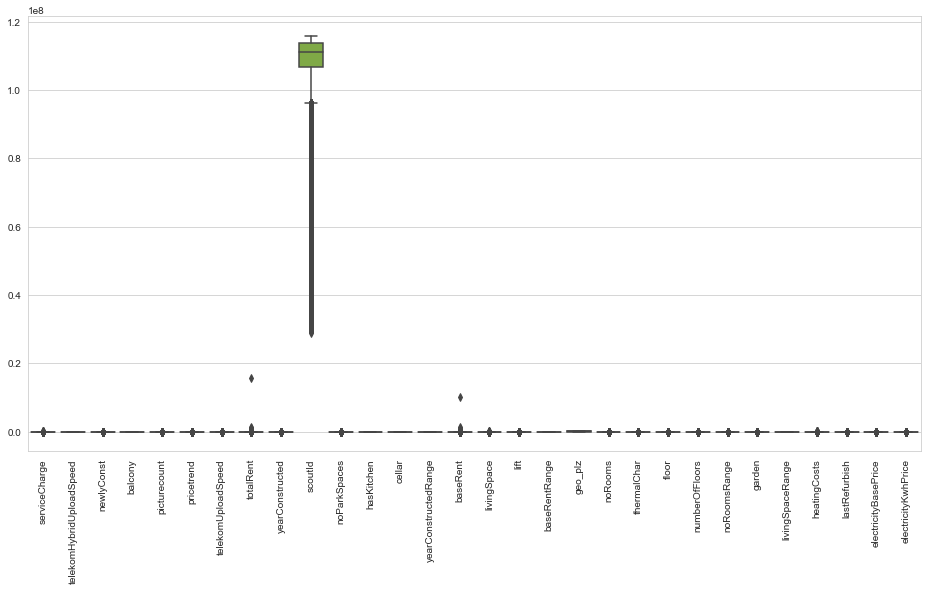

In [10]:
plt.figure(figsize = (16,8))
sns.boxplot(data = data)
plt.xticks(rotation = 90)

# Exploratory Data Analysis

In [11]:
df = data.copy()

In [12]:
df.describe().columns

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'yearConstructedRange', 'baseRent',
       'livingSpace', 'baseRentRange', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'livingSpaceRange',
       'heatingCosts', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

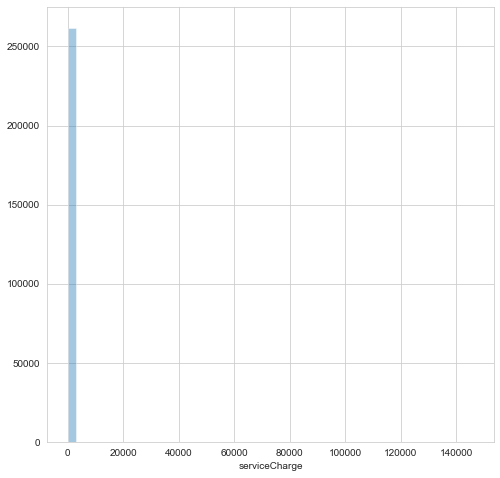

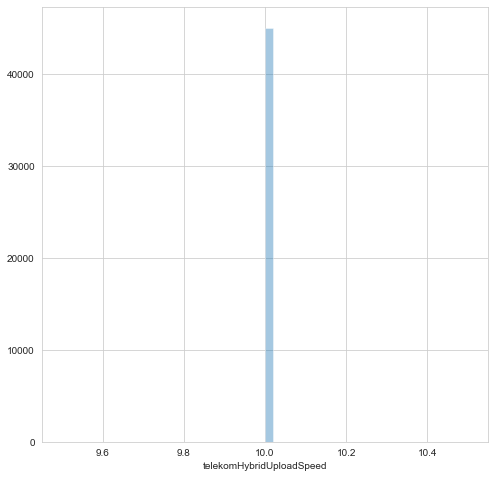

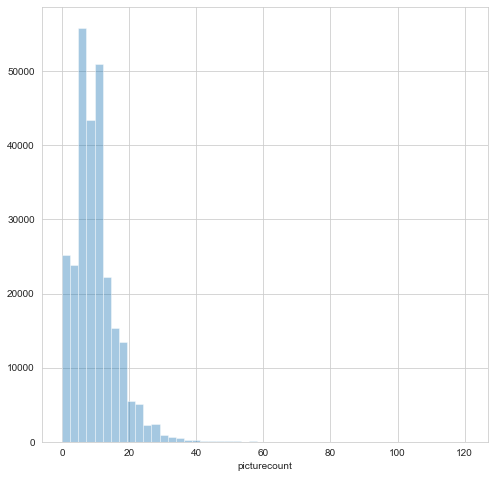

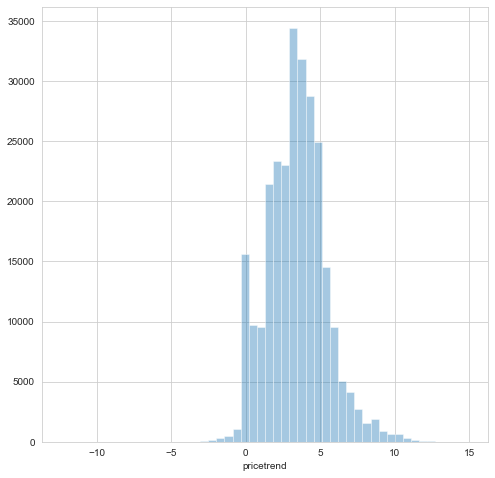

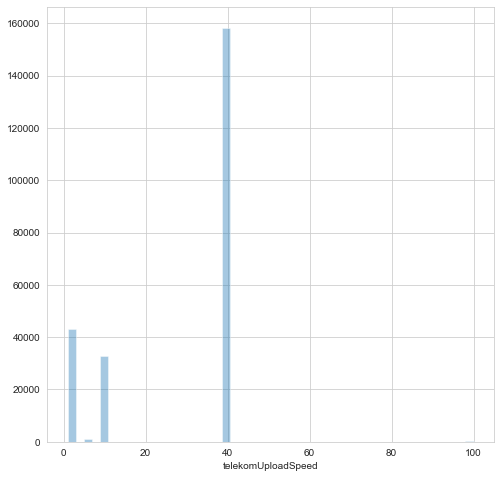

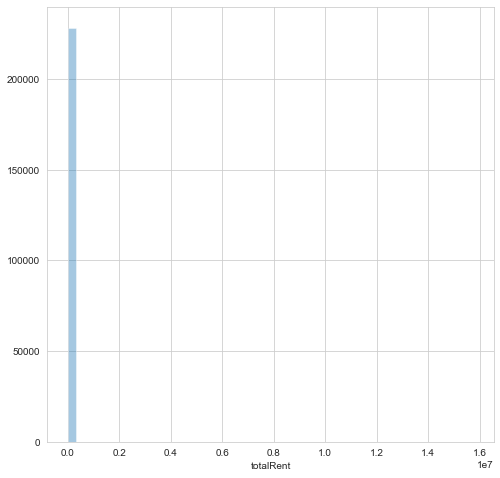

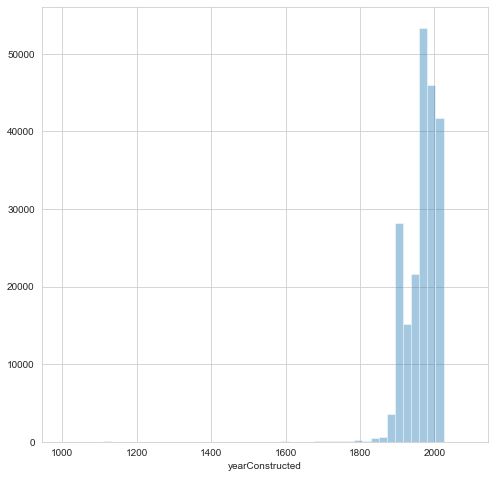

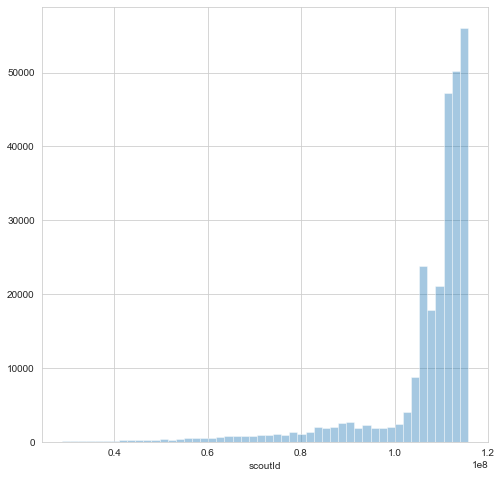

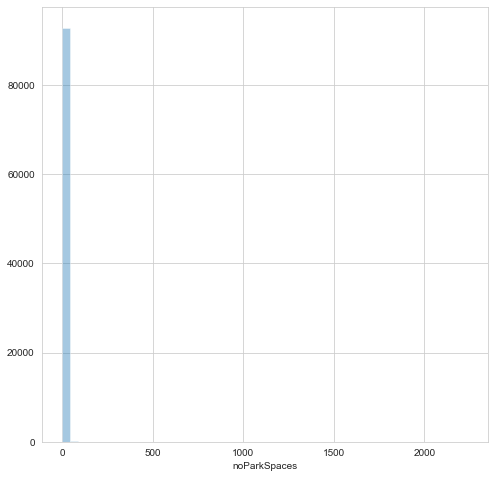

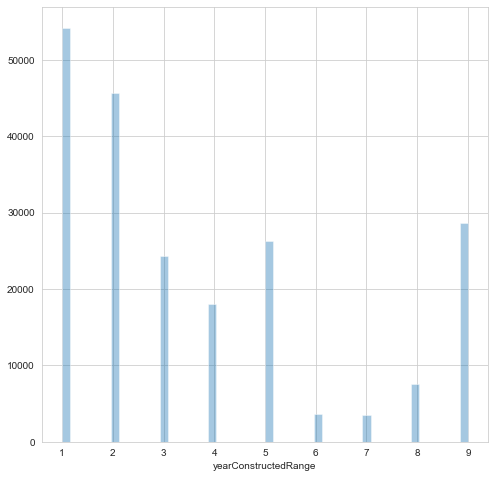

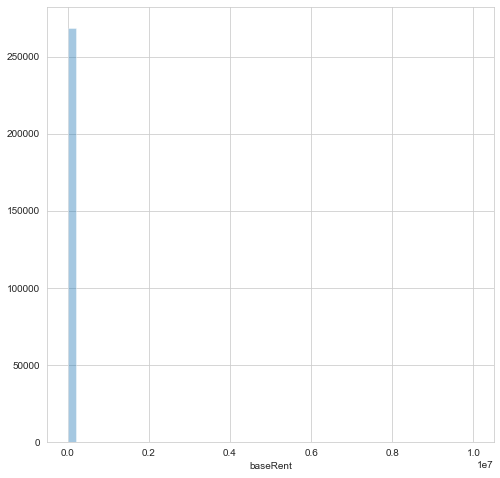

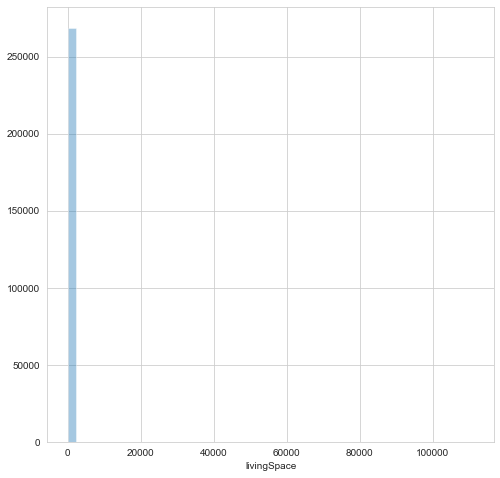

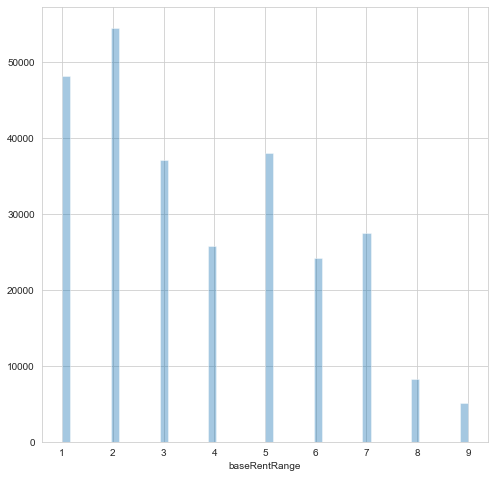

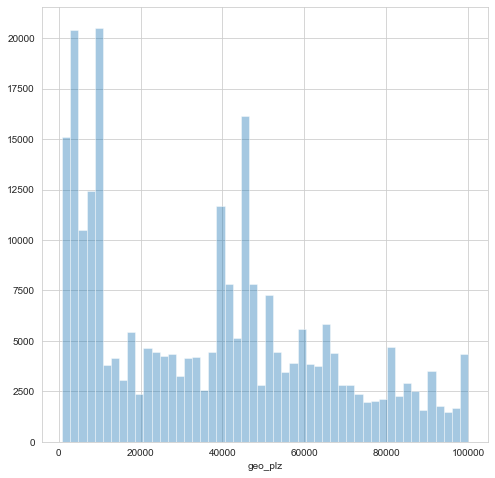

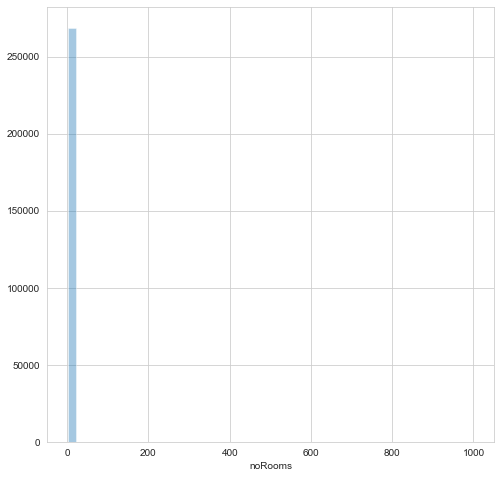

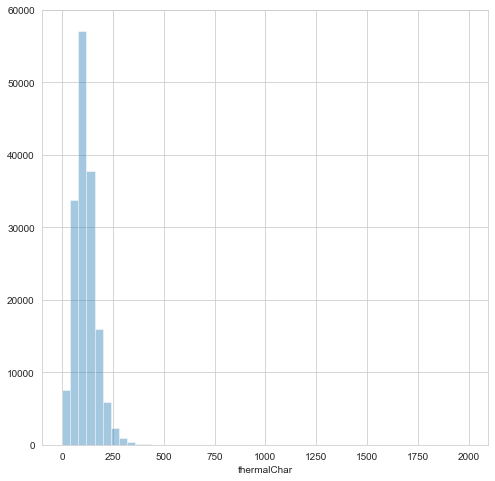

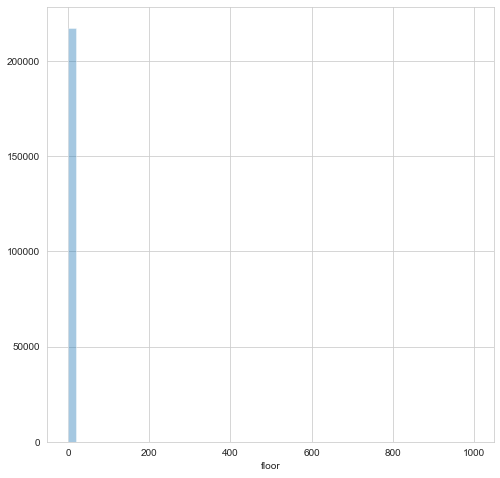

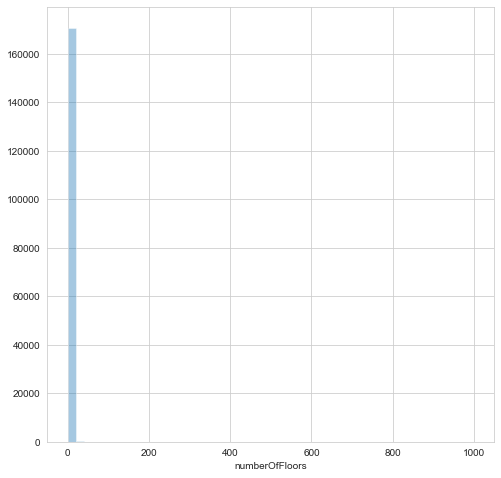

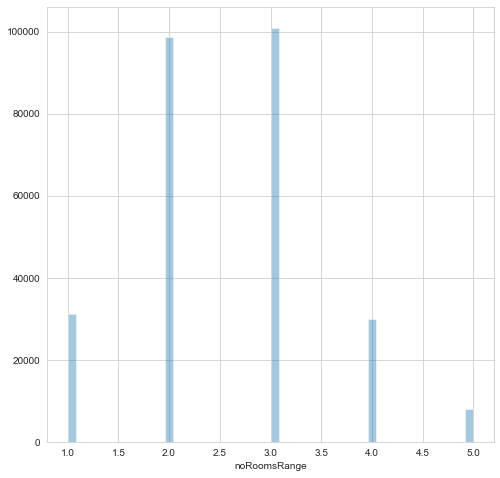

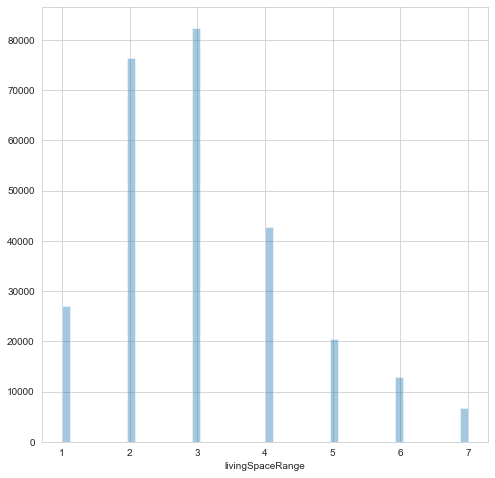

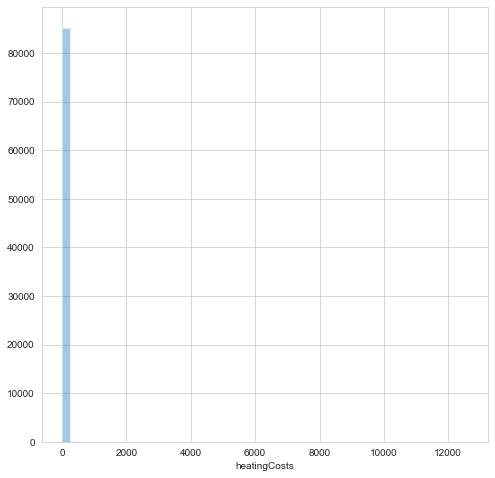

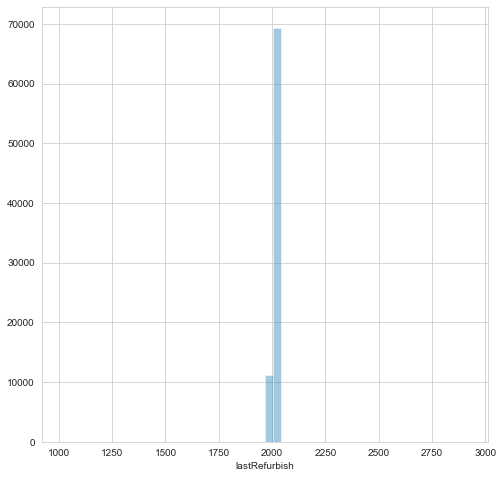

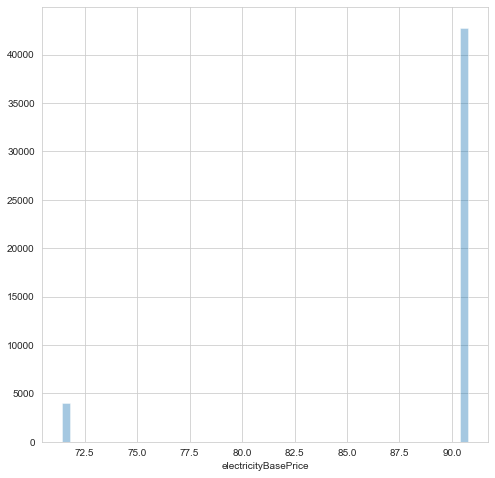

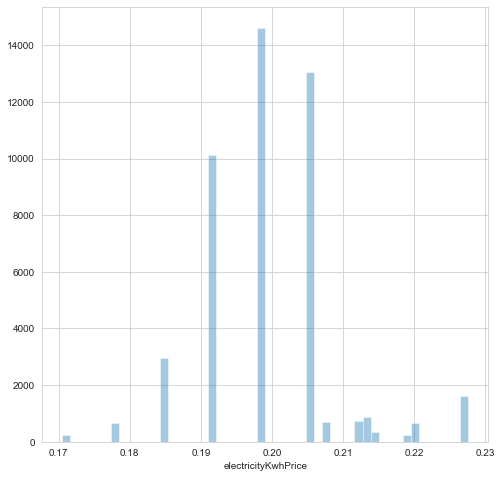

In [13]:
for i in df.describe().columns:
    plt.figure(figsize = (8,8))
    sns.distplot(df[i], kde = False)

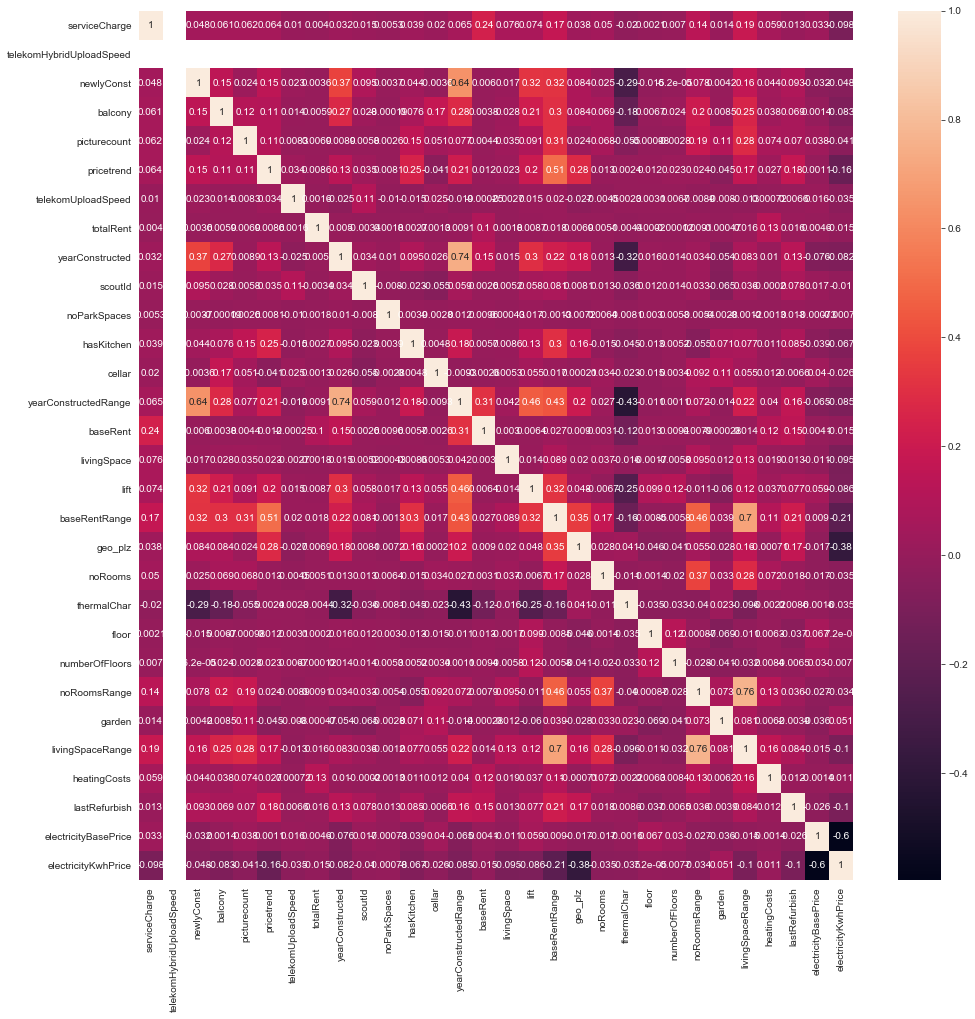

In [14]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True)

__First I'll see if there is any duplicated data.__

In [15]:
df[df.duplicated(subset=None, keep='first') == True]

Empty DataFrame
Columns: [regio1, serviceCharge, heatingType, telekomTvOffer, telekomHybridUploadSpeed, newlyConst, balcony, picturecount, pricetrend, telekomUploadSpeed, totalRent, yearConstructed, scoutId, noParkSpaces, firingTypes, hasKitchen, geo_bln, cellar, yearConstructedRange, baseRent, houseNumber, livingSpace, geo_krs, condition, interiorQual, petsAllowed, street, streetPlain, lift, baseRentRange, typeOfFlat, geo_plz, noRooms, thermalChar, floor, numberOfFloors, noRoomsRange, garden, livingSpaceRange, regio2, regio3, description, facilities, heatingCosts, energyEfficiencyClass, lastRefurbish, electricityBasePrice, electricityKwhPrice, date]
Index: []

In [16]:
df['regio1'].value_counts()

Nordrhein_Westfalen       62864
Sachsen                   58160
Bayern                    21610
Sachsen_Anhalt            20121
Hessen                    17842
Niedersachsen             16595
Baden_Württemberg         16090
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8367
Brandenburg                6952
Schleswig_Holstein         6667
Mecklenburg_Vorpommern     6635
Hamburg                    3758
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

In [17]:
df['geo_bln'].value_counts()

Nordrhein_Westfalen       62864
Sachsen                   58160
Bayern                    21610
Sachsen_Anhalt            20121
Hessen                    17842
Niedersachsen             16595
Baden_Württemberg         16090
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8367
Brandenburg                6952
Schleswig_Holstein         6667
Mecklenburg_Vorpommern     6635
Hamburg                    3758
Bremen                     2965
Saarland                   1429
Name: geo_bln, dtype: int64

In [18]:
df[['regio1', 'geo_bln']]

regio1             geo_bln
0           Sachsen_Anhalt      Sachsen_Anhalt
1                   Bayern              Bayern
2                   Bayern              Bayern
3           Sachsen_Anhalt      Sachsen_Anhalt
4       Schleswig_Holstein  Schleswig_Holstein
...                    ...                 ...
268844       Niedersachsen       Niedersachsen
268845           Thüringen           Thüringen
268846             Sachsen             Sachsen
268847       Niedersachsen       Niedersachsen
268848              Berlin              Berlin

[268849 rows x 2 columns]

In [19]:
idx = []
for i in df.index:
    if df['regio1'][i] != df['geo_bln'][i]:
        idx.append(i)

In [20]:
df.loc[idx]

Empty DataFrame
Columns: [regio1, serviceCharge, heatingType, telekomTvOffer, telekomHybridUploadSpeed, newlyConst, balcony, picturecount, pricetrend, telekomUploadSpeed, totalRent, yearConstructed, scoutId, noParkSpaces, firingTypes, hasKitchen, geo_bln, cellar, yearConstructedRange, baseRent, houseNumber, livingSpace, geo_krs, condition, interiorQual, petsAllowed, street, streetPlain, lift, baseRentRange, typeOfFlat, geo_plz, noRooms, thermalChar, floor, numberOfFloors, noRoomsRange, garden, livingSpaceRange, regio2, regio3, description, facilities, heatingCosts, energyEfficiencyClass, lastRefurbish, electricityBasePrice, electricityKwhPrice, date]
Index: []

__Datas in regio1 and geo_bln columns are exactly the same. So I decided to drop geo_bln column.__

In [21]:
df.drop('geo_bln', axis = 1, inplace = True)

In [22]:
df['regio2'].value_counts()

Leipzig                         13720
Chemnitz                        12576
Berlin                          10406
Dresden                          7524
Magdeburg                        4859
                                ...  
Lichtenfels_Kreis                  31
Freyung_Grafenau_Kreis             30
Haßberge_Kreis                     24
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      12
Name: regio2, Length: 419, dtype: int64

In [23]:
data['geo_krs'].value_counts()

Leipzig                         13720
Chemnitz                        12576
Berlin                          10406
Dresden                          7524
Magdeburg                        4859
                                ...  
Lichtenfels_Kreis                  31
Freyung_Grafenau_Kreis             30
Haßberge_Kreis                     24
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      12
Name: geo_krs, Length: 419, dtype: int64

In [24]:
df[['regio2', 'geo_krs']]

regio2                        geo_krs
0             Anhalt_Bitterfeld_Kreis        Anhalt_Bitterfeld_Kreis
1       Pfaffenhofen_an_der_Ilm_Kreis  Pfaffenhofen_an_der_Ilm_Kreis
2                            Erlangen                       Erlangen
3                           Magdeburg                      Magdeburg
4                      Segeberg_Kreis                 Segeberg_Kreis
...                               ...                            ...
268844                   Verden_Kreis                   Verden_Kreis
268845                           Gera                           Gera
268846                  Zwickau_Kreis                  Zwickau_Kreis
268847                    Celle_Kreis                    Celle_Kreis
268848                         Berlin                         Berlin

[268849 rows x 2 columns]

In [25]:
idx = []
for i in df.index:
    if df['regio2'][i] != df['geo_krs'][i]:
        idx.append(i)

In [26]:
df.loc[idx]

Empty DataFrame
Columns: [regio1, serviceCharge, heatingType, telekomTvOffer, telekomHybridUploadSpeed, newlyConst, balcony, picturecount, pricetrend, telekomUploadSpeed, totalRent, yearConstructed, scoutId, noParkSpaces, firingTypes, hasKitchen, cellar, yearConstructedRange, baseRent, houseNumber, livingSpace, geo_krs, condition, interiorQual, petsAllowed, street, streetPlain, lift, baseRentRange, typeOfFlat, geo_plz, noRooms, thermalChar, floor, numberOfFloors, noRoomsRange, garden, livingSpaceRange, regio2, regio3, description, facilities, heatingCosts, energyEfficiencyClass, lastRefurbish, electricityBasePrice, electricityKwhPrice, date]
Index: []

__Datas in regio2 and geo_krs columns are exactly the same. So I decided to drop geo_krs column.__

In [27]:
df.drop('geo_krs', axis = 1, inplace = True)

In [28]:
df['street'].value_counts()

no_information            71017
Hauptstra&szlig;e           940
Bahnhofstra&szlig;e         852
Leipziger Stra&szlig;e      443
Goethestra&szlig;e          415
                          ...  
Dechenstra&szlig;e            1
Maierhofstr.                  1
Krottorfer Str.               1
Gustav-Schatz-Hof             1
Escherl&auml;nder             1
Name: street, Length: 52374, dtype: int64

In [29]:
df['streetPlain'].value_counts()

Hauptstraße          915
Bahnhofstraße        833
Leipziger_Straße     431
Goethestraße         406
Bahnhofstr.          402
                    ... 
Vorderer_Wasen_35      1
Am_Zweigwerkufer       1
Rolandseck             1
Riemker_Straße         1
Memelstr               1
Name: streetPlain, Length: 54486, dtype: int64

In [30]:
df[['street', 'streetPlain']]

street              streetPlain
0         Stra&szlig;e der Freundschaft  Straße_der_Freundschaft
1                        no_information                      NaN
2                         Karl-May-Str.            Karl-May-Str.
3       Halberst&auml;dter Stra&szlig;e     Halberstädter_Straße
4                        Hamburger Str.           Hamburger_Str.
...                                 ...                      ...
268844                   no_information                      NaN
268845           Dr.Friedrich-Wolf-Str.   Dr.Friedrich-Wolf-Str.
268846                   no_information                      NaN
268847                   no_information                      NaN
268848           Tauentzienstra&szlig;e         Tauentzienstraße

[268849 rows x 2 columns]

__Datas in street column are less completed (have more null values) than steetPlain datas. It's also easier to understand than street column. So i decided to only use the streetPlain feature and drop street column.__

In [31]:
df.drop('street', axis = 1, inplace = True)

In [32]:
df

regio1  serviceCharge                     heatingType  \
0           Sachsen_Anhalt         210.00                 central_heating   
1                   Bayern         160.00                 central_heating   
2                   Bayern          80.00                 central_heating   
3           Sachsen_Anhalt          75.00                 central_heating   
4       Schleswig_Holstein         190.00  self_contained_central_heating   
...                    ...            ...                             ...   
268844       Niedersachsen         150.00                 central_heating   
268845           Thüringen         160.00                 central_heating   
268846             Sachsen          90.00                 central_heating   
268847       Niedersachsen         200.00                     oil_heating   
268848              Berlin         233.08                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0                 NaN                       NaN       False     True   
1       ONE_YEAR_FREE                       NaN       False     True   
2                 NaN                       NaN       False     True   
3                 NaN                       NaN       False     True   
4       ONE_YEAR_FREE                       NaN        True     True   
...               ...                       ...         ...      ...   
268844  ONE_YEAR_FREE                      10.0       False     True   
268845            NaN                       NaN       False    False   
268846           NONE                       NaN       False    False   
268847  ONE_YEAR_FREE                       NaN       False    False   
268848  ONE_YEAR_FREE                       NaN       False    False   

        picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0                 20        0.83                 NaN     744.00   
1                 26        5.13                 5.0        NaN   
2                 10         NaN                 NaN     530.00   
3                 14        2.54                 NaN     568.00   
4                 16        3.79                40.0    1185.00   
...              ...         ...                 ...        ...   
268844             9        5.33                 2.4        NaN   
268845            11        2.60                 NaN     559.00   
268846             2        0.00                 2.4     256.50   
268847            12        4.69                40.0     650.00   
268848             7        8.60                10.0    1631.56   

        yearConstructed    scoutId  noParkSpaces        firingTypes  \
0                1970.0  111888745           NaN                oil   
1                2005.0   90392140           1.0                gas   
2                1967.0   66246933           NaN                oil   
3                1900.0  110222551           NaN  natural_gas_heavy   
4                2020.0  114808175           1.0         geothermal   
...                 ...        ...           ...                ...   
268844           1956.0  106146908           NaN                gas   
268845              NaN  109084534           1.0                NaN   
268846           1894.0  108717190           NaN                gas   
268847           1972.0  109405161           NaN                oil   
268848           2010.0   69203193           NaN   district_heating   

        hasKitchen  cellar  yearConstructedRange  baseRent houseNumber  \
0            False    True                   2.0    534.00        8-10   
1            False    True                   6.0    890.00         NaN   
2             True    True                   2.0    450.00          14   
3            False   False                   1.0    396.00         180   
4             True    True                   9.0    995.00          62   
...            ...     ...                   ...       ...         ...   
268844        True   False                   2.0    32

In [33]:
df['scoutId'].nunique()

268849

In [34]:
len(df)

268849

__ScoutId has all unique values as the id of ad and doesn't affect the rent price. So I decided to drop the colum.__

In [35]:
df.drop('scoutId', axis = 1, inplace = True)

In [36]:
df['geo_plz']

0          6792
1         85126
2         91056
3         39112
4         24576
          ...  
268844    28832
268845     7545
268846     8451
268847    29229
268848    10789
Name: geo_plz, Length: 268849, dtype: int64

In [37]:
df['geo_plz'].value_counts()

9130     2008
9126     1994
9131     1649
9112     1626
9113     1417
         ... 
84568       1
47462       1
67664       1
8051        1
40594       1
Name: geo_plz, Length: 7633, dtype: int64

In [40]:
df[df['geo_plz'] == 9130][['geo_plz', 'regio1', 'regio2', 'regio3']]

geo_plz   regio1    regio2      regio3
106        9130  Sachsen  Chemnitz  Sonnenberg
275        9130  Sachsen  Chemnitz  Sonnenberg
358        9130  Sachsen  Chemnitz  Sonnenberg
474        9130  Sachsen  Chemnitz  Sonnenberg
490        9130  Sachsen  Chemnitz  Sonnenberg
...         ...      ...       ...         ...
268361     9130  Sachsen  Chemnitz  Sonnenberg
268575     9130  Sachsen  Chemnitz  Sonnenberg
268607     9130  Sachsen  Chemnitz  Sonnenberg
268627     9130  Sachsen  Chemnitz  Sonnenberg
268692     9130  Sachsen  Chemnitz  Sonnenberg

[2008 rows x 4 columns]

__I'm going to drop zipcode feature because it's categorical data with a lot of unique value. It's the combination of state, disctrict and city. No one search for an apartment rent with its' zipcode.__

In [41]:
df.drop('geo_plz', axis = 1, inplace = True)

In [42]:
df['picturecount'].value_counts()

8      21911
7      21437
9      21427
10     19849
6      18806
       ...  
100        1
101        1
107        1
109        1
112        1
Name: picturecount, Length: 95, dtype: int64

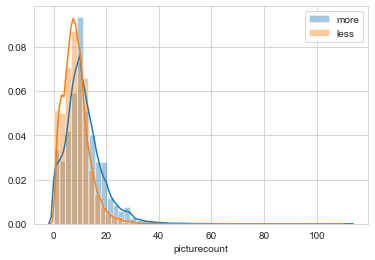

In [46]:
sns.distplot(df[df['totalRent'] > df['totalRent'].describe()['50%']]['picturecount'], label = 'more')
sns.distplot(df[df['totalRent'] <= df['totalRent'].describe()['50%']]['picturecount'], label = 'less')
plt.legend()

__People who posted more picture maybe are more confident with the condition of the flat (maybe it looks better) or maybe the flat is bigger and have more rooms so more pictures are uploaded. I'm still going to drop picturecount feature because nobody search for an apartment based on picture uploaded. I think it's just an additional information gathered from the website. (it depends on the owner if there's any photos of the property posted)__

In [48]:
df.drop('picturecount', axis = 1, inplace = True)

In [49]:
df.rename(columns = {'regio1' : 'state', 'regio2': 'district', 'regio3' : 'city', 'streetPlain' : 'street'}, inplace = True)

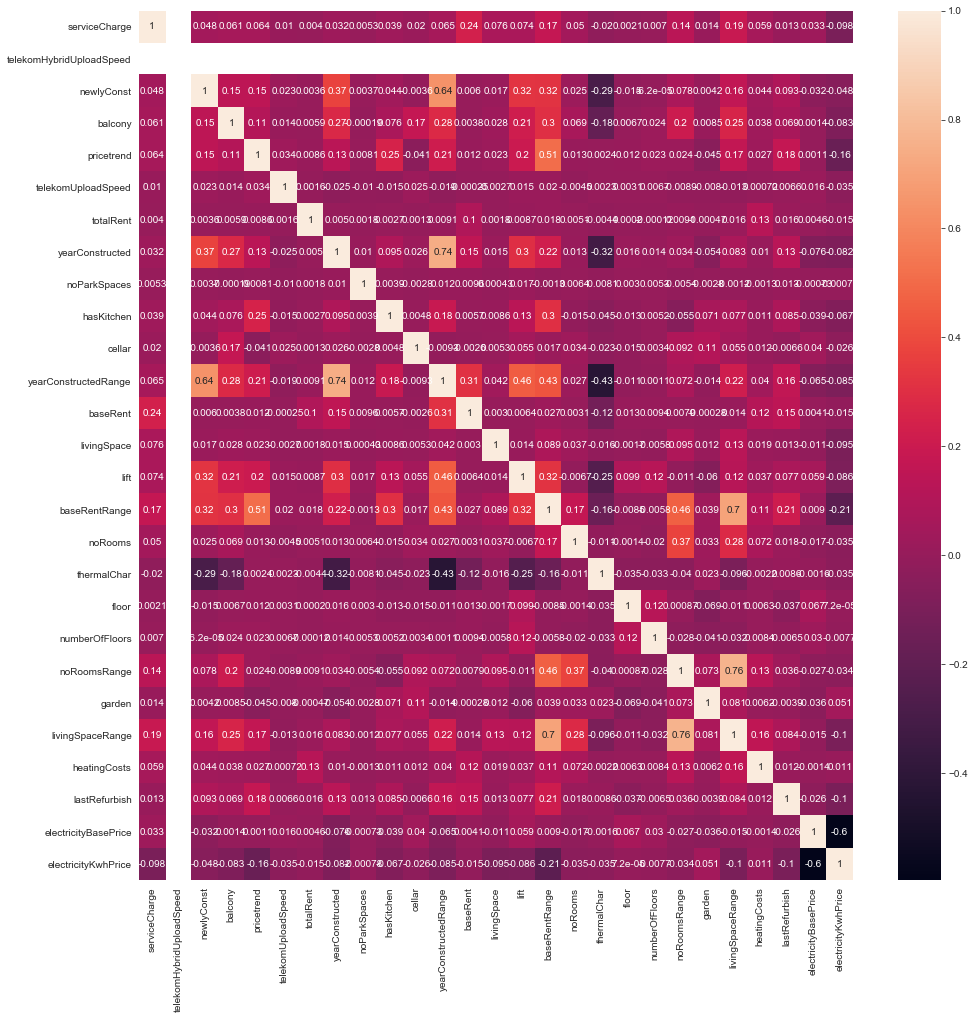

In [50]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True)

In [51]:
def count_null(df):
    data = {'null_count' : [], 'total_data' : [], 'percentage' : []}
    for col in df.columns:
        data['null_count'].append(df[col].isna().sum())
        data['total_data'].append(len(df[col]))
        data['percentage'].append((df[col].isna().sum()/len(df[col]))*100)
    return pd.DataFrame(data = data, index = df.columns)

In [52]:
count_null(df)

null_count  total_data  percentage
state                              0      268849    0.000000
serviceCharge                   6913      268849    2.571332
heatingType                    44844      268849   16.679995
telekomTvOffer                 32599      268849   12.125394
telekomHybridUploadSpeed      223808      268849   83.246730
newlyConst                         0      268849    0.000000
balcony                            0      268849    0.000000
pricetrend                      1820      268849    0.676960
telekomUploadSpeed             33340      268849   12.401013
totalRent                      40502      268849   15.064962
yearConstructed                57036      268849   21.214883
noParkSpaces                  175812      268849   65.394329
firingTypes                    56967      268849   21.189218
hasKitchen                         0      268849    0.000000
cellar                             0      268849    0.000000
yearConstructedRange           57036      268849   21.214883
baseRent                           0      268849    0.000000
houseNumber                    71022      268849   26.417059
livingSpace                        0      268849    0.000000
condition                      68497      268849   25.477870
interiorQual                  112691      268849   41.916094
petsAllowed                   114600      268849   42.626158
street                         71017      268849   26.415200
lift                               0      268849    0.000000
baseRentRange                      0      268849    0.000000
typeOfFlat                     36634      268849   13.626236
noRooms                            0      268849    0.000000
thermalChar                   106521      268849   39.621126
floor                          51321      268849   19.089154
numberOfFloors                 97758      268849   36.361675
noRoomsRange                       0      268849    0.000000
garden                             0      268849    0.000000
livingSpaceRange                   0      268849    0.000000
district                           0      268849    0.000000
city                               0      268849    0.000000
description                    19747      268849    7.345015
facilities                     52925      268849   19.685772
heatingCosts                  183331      268849   68.191066
energyEfficiencyClass         191057      268849   71.064798
lastRefurbish                 188153      268849   69.984638
electricityBasePrice          222062      268849   82.597294
electricityKwhPrice           222062      268849   82.597294
date                               0      268849    0.000000

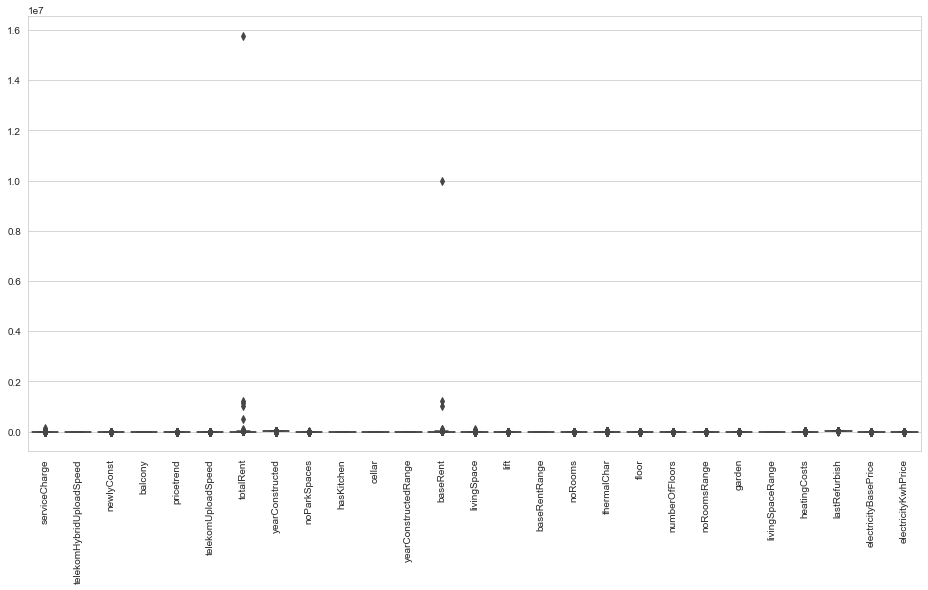

In [53]:
plt.figure(figsize = (16,8))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

__There's still so many null values with the highest percentage of null value in electricityKwhPrice and electricityBasePrice. There's also extreme outlier seen in baseRent and totalRent.__

In [54]:
df['totalRent'].isna().sum()

40502

__The target value is totalRent. I'm going to drop data with null value in totalRent row because without the data, we won't be able to predict it.__

In [55]:
df.dropna(subset = ['totalRent'], inplace = True)

In [56]:
df['totalRent'].isna().sum()

0

__I'll also drop datas with €0 totalRent value because it means free rent which is impossible.__

In [57]:
df[df['totalRent'] == 0]

state  serviceCharge                     heatingType  \
168                Sachsen          150.0                 central_heating   
444                Sachsen           75.0  self_contained_central_heating   
971                Sachsen          100.0                 central_heating   
1696               Sachsen          140.0                 central_heating   
2460               Sachsen          150.0                 central_heating   
...                    ...            ...                             ...   
265727  Schleswig_Holstein            0.0                district_heating   
266883             Sachsen          180.0                 central_heating   
267274              Berlin          290.0                district_heating   
267690             Sachsen          130.0                 central_heating   
268144   Baden_Württemberg          150.0                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
168               NaN                       NaN       False    False   
444     ONE_YEAR_FREE                      10.0       False    False   
971               NaN                       NaN       False    False   
1696    ONE_YEAR_FREE                       NaN       False     True   
2460    ONE_YEAR_FREE                       NaN       False    False   
...               ...                       ...         ...      ...   
265727  ONE_YEAR_FREE                       NaN       False    False   
266883  ONE_YEAR_FREE                       NaN       False    False   
267274  ONE_YEAR_FREE                       NaN       False     True   
267690  ONE_YEAR_FREE                      10.0       False     True   
268144  ONE_YEAR_FREE                       NaN       False     True   

        pricetrend  telekomUploadSpeed  totalRent  yearConstructed  \
168           0.00                 NaN        0.0           1973.0   
444           2.00                 2.4        0.0           1894.0   
971           0.00                 NaN        0.0           1985.0   
1696          0.97                40.0        0.0           1988.0   
2460          1.16                40.0        0.0              NaN   
...            ...                 ...        ...              ...   
265727        4.14                10.0        0.0           2013.0   
266883        2.13                40.0        0.0           1908.0   
267274        8.97                40.0        0.0           1927.0   
267690        0.00                 2.4        0.0           1989.0   
268144        4.31                40.0        0.0           2014.0   

        noParkSpaces       firingTypes  hasKitchen  cellar  \
168              NaN               oil       False    True   
444              NaN               gas       False    True   
971              NaN               gas       False    True   
1696             NaN               gas       False    True   
2460             NaN               gas       False    True   
...              ...               ...         ...     ...   
265727           1.0  district_heating       False   False   
266883           NaN               gas       False    True   
267274           NaN  district_heating        True    True   
267690           NaN               gas       False    True   
268144           1.0    pellet_heating        True    True   

        yearConstructedRange  baseRent houseNumber  livingSpace  \
168                      3.0     257.0         NaN         57.6   
444                      1.0     300.0         NaN         63.1   
971                      4.0     180.0         NaN         38.0   
1696                     4.0     260.0         NaN         56.3   
2460                     NaN     250.0         NaN         61.0   
...                      ...       ...         ...          ...   
265727                   8.0      60.0       11-13          0.0   
266883                   1.0     250.0         NaN         73.0   
267274                   1.0    2400.0    

In [58]:
df.drop(df[df['totalRent'] == 0].index, inplace = True)

__I checked in immoscout website and found that the lowest price possible is €1 for cold. Which means it doesn't include heatingCosts and serviceCharge. So, I'm going to drop data where its baseRent are €0.__

In [59]:
df[df['baseRent'] == 0]

state  serviceCharge       heatingType  \
6357        Schleswig_Holstein            NaN   central_heating   
7654       Nordrhein_Westfalen            NaN   central_heating   
14055                 Saarland            NaN  district_heating   
15447            Niedersachsen            NaN               NaN   
16147                   Bayern            NaN               NaN   
17473                 Saarland            NaN               NaN   
17634          Rheinland_Pfalz            NaN               NaN   
22481            Niedersachsen          170.0   central_heating   
35129                   Bayern            NaN   central_heating   
36362        Baden_Württemberg            NaN               NaN   
42241            Niedersachsen            0.0   central_heating   
52566      Nordrhein_Westfalen            NaN   central_heating   
52587            Niedersachsen            NaN   central_heating   
56886            Niedersachsen          200.0   central_heating   
61243                  Sachsen          120.0   central_heating   
63353                  Sachsen            0.0   central_heating   
69655      Nordrhein_Westfalen            NaN               NaN   
72832                   Bayern            NaN               NaN   
74725                   Bayern          180.0     floor_heating   
79595            Niedersachsen          100.0               NaN   
80201      Nordrhein_Westfalen          100.0   central_heating   
88711                   Bayern          350.0   central_heating   
91576                   Bayern          180.0     floor_heating   
96392            Niedersachsen            NaN   central_heating   
98606       Schleswig_Holstein          150.0               NaN   
107240           Niedersachsen           99.0   central_heating   
109951       Baden_Württemberg            NaN     floor_heating   
121761                  Bayern            NaN   central_heating   
124009                  Bayern            NaN  district_heating   
126817     Nordrhein_Westfalen          146.0   central_heating   
131012                  Bayern            NaN       gas_heating   
135131           Niedersachsen            NaN     floor_heating   
137931     Nordrhein_Westfalen          100.0               NaN   
144110                 Sachsen          110.0   central_heating   
157461                  Bayern            NaN   central_heating   
160986                  Berlin            NaN   central_heating   
164760     Nordrhein_Westfalen          135.0   central_heating   
175147       Baden_Württemberg            NaN   central_heating   
180238     Nordrhein_Westfalen          154.0   central_heating   
182508                  Bayern            NaN   central_heating   
183095                 Sachsen            0.0   central_heating   
194229      Schleswig_Holstein            NaN   central_heating   
194650                 Sachsen          115.0   central_heating   
198484           Niedersachsen            NaN   central_heating   
202478          Sachsen_Anhalt           60.0   central_heating   
206946           Niedersachsen            NaN   central_heating   
210809                  Bayern          180.0     floor_heating   
212859       Baden_Württemberg            NaN               NaN   
218695                  Bayern            NaN   central_heating   
225288       Baden_Württemberg            NaN               NaN   
234242           Niedersachsen          160.0   central_heating   
237797       Baden_Württemberg            NaN               NaN   
239487  Mecklenburg_Vorpommern           95.0   central_heating   
244317           Niedersachsen            NaN   central_heating   
256200         Rheinland_Pfalz            NaN   central_heating   
263179      Schleswig_Holstein            NaN   central_heating   
266679     Nordrhein_Westfalen            NaN   central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
6357    ONE_YEAR_FREE                       NaN       False     Tr

In [60]:
df.drop(df[df['baseRent'] == 0].index, inplace = True)

__Because the existing baseRent minimum is €1 (heatingCosts and serviceCharge are not yet included), it's also not possible to have totalRent (warm) of €1. I'm going to drop the datas with totalRent of €1.__

In [61]:
df[df['totalRent'] == 1]

state  serviceCharge      heatingType telekomTvOffer  \
62545           Brandenburg           70.0              NaN  ONE_YEAR_FREE   
89509   Nordrhein_Westfalen          325.0  central_heating  ONE_YEAR_FREE   
159521              Sachsen          152.0              NaN  ONE_YEAR_FREE   
171412               Bayern          102.0  central_heating  ONE_YEAR_FREE   
199637        Niedersachsen            0.0  central_heating  ONE_YEAR_FREE   
223757              Sachsen          163.0              NaN  ONE_YEAR_FREE   
231037        Niedersachsen          245.0  central_heating  ONE_YEAR_FREE   
238866              Sachsen            NaN  central_heating  ONE_YEAR_FREE   

        telekomHybridUploadSpeed  newlyConst  balcony  pricetrend  \
62545                        NaN       False     True        2.74   
89509                        NaN       False     True        1.54   
159521                      10.0       False     True        1.89   
171412                       NaN       False     True        5.88   
199637                       NaN       False    False        1.77   
223757                      10.0       False    False        1.89   
231037                       NaN        True     True        3.70   
238866                       NaN       False    False        2.33   

        telekomUploadSpeed  totalRent  yearConstructed  noParkSpaces  \
62545                 40.0        1.0              NaN           NaN   
89509                 40.0        1.0           2009.0           1.0   
159521                10.0        1.0              NaN           NaN   
171412                40.0        1.0              NaN           1.0   
199637                40.0        1.0              NaN           NaN   
223757                 2.4        1.0              NaN           NaN   
231037                10.0        1.0           2019.0           1.0   
238866                40.0        1.0              NaN           NaN   

       firingTypes  hasKitchen  cellar  yearConstructedRange  baseRent  \
62545          NaN       False   False                   NaN     270.0   
89509   geothermal        True    True                   7.0    1087.0   
159521         NaN       False    True                   NaN     459.0   
171412         NaN        True    True                   NaN     995.0   
199637         gas        True   False                   NaN       1.0   
223757         NaN       False    True                   NaN     459.0   
231037         gas        True   False                   9.0    1111.0   
238866         gas       False    True                   NaN       1.0   

       houseNumber  livingSpace                           condition  \
62545       9 - 19        60.00                     fully_renovated   
89509          231        81.00                                 NaN   
159521          31        70.60  first_time_use_after_refurbishment   
171412         NaN        56.00                      mint_condition   
199637         NaN        20.00                     fully_renovated   
223757          19        76.00                         refurbished   
231037           9       101.00                      first_time_use   
238866           1        47.51                                 NaN   

         interiorQual petsAllowed                   street   lift  \
62545   sophisticated  negotiable           Kastanienallee  False   
89509   sophisticated         NaN             Westfalenweg   True   
159521  sophisticated  negotiable             Elisenstraße  False   
171412  sophisticated          no                      NaN  False   
199637            NaN  negotiable                      NaN  False   
223757            NaN         NaN  Gustav-Schuberth-Straße  False   
231037  sophisticated         yes              Brahmsallee   True   
238866         normal         NaN          Blockhausstraße   True   

        baseRentRange   typeOfFlat  noRooms  thermalChar  floor  \
62545               1    apartment      3.0         

In [62]:
df.drop(df[df['totalRent'] == 1].index, inplace = True)

__I'm also going to drop datas where the totalRent is less than baseRent.__

In [63]:
df[df['totalRent'] < df['baseRent']]

state  serviceCharge                     heatingType  \
1256        Niedersachsen         208.83                   floor_heating   
1589    Baden_Württemberg         150.00                     gas_heating   
2671          Brandenburg          92.00                 central_heating   
7371               Hessen          50.00  self_contained_central_heating   
8036       Sachsen_Anhalt          75.00                district_heating   
...                   ...            ...                             ...   
254933        Brandenburg            NaN                             NaN   
260757     Sachsen_Anhalt         440.00                             NaN   
263439        Brandenburg          70.00                   floor_heating   
263712  Baden_Württemberg         180.00                       heat_pump   
266263            Sachsen         112.00                             NaN   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
1256    ONE_YEAR_FREE                       NaN        True     True   
1589    ONE_YEAR_FREE                       NaN       False    False   
2671    ONE_YEAR_FREE                       NaN       False    False   
7371    ONE_YEAR_FREE                       NaN       False    False   
8036    ONE_YEAR_FREE                      10.0       False     True   
...               ...                       ...         ...      ...   
254933            NaN                       NaN       False     True   
260757  ONE_YEAR_FREE                       NaN       False    False   
263439            NaN                       NaN        True     True   
263712            NaN                       NaN       False     True   
266263  ONE_YEAR_FREE                      10.0       False    False   

        pricetrend  telekomUploadSpeed  totalRent  yearConstructed  \
1256          2.75                40.0     735.06           2019.0   
1589          4.71                40.0     600.00              NaN   
2671         -0.79                40.0      65.00           1960.0   
7371          3.25                40.0      50.00           1952.0   
8036          1.01                 2.4     265.00           1965.0   
...            ...                 ...        ...              ...   
254933        4.87                 NaN     885.00           2017.0   
260757        1.79                40.0     120.00              NaN   
263439        7.75                 NaN       1.01           2018.0   
263712        5.98                 NaN       9.00              NaN   
266263        0.94                 2.4     112.00              NaN   

        noParkSpaces        firingTypes  hasKitchen  cellar  \
1256             1.0   district_heating       False    True   
1589             NaN                gas        True    True   
2671             NaN  natural_gas_light       False    True   
7371             NaN                gas       False   False   
8036             NaN   district_heating       False    True   
...              ...                ...         ...     ...   
254933           NaN      local_heating        True    True   
260757           NaN                NaN       False   False   
263439          23.0                gas       False   False   
263712           2.0                NaN       False    True   
266263           NaN                NaN        True    True   

        yearConstructedRange  baseRent houseNumber  livingSpace  \
1256                     9.0    943.89         2-4        83.53   
1589                     NaN    610.00          39        32.00   
2671                     2.0    298.00          34        57.20   
7371                     2.0    400.00           3        35.00   
8036                     2.0    425.00           5        59.00   
...                      ...       ...         ...          ...   
254933                   9.0   1050.00           2        73.18   
260757                   NaN    320.00          90        57.05   
263439                   9.0    874.00   

In [64]:
df.drop(df[df['totalRent'] < df['baseRent']].index, inplace = True)

__There's datas where the totalRent is at the same value as baseRent.__

In [65]:
df[df['totalRent'] == df['baseRent']][['totalRent', 'baseRent', 'serviceCharge', 'heatingCosts']]

totalRent  baseRent  serviceCharge  heatingCosts
43          698.0     698.0            NaN           NaN
63         1190.0    1190.0            0.0           NaN
156        2150.0    2150.0            0.0           NaN
171        1450.0    1450.0            0.0           NaN
197         250.0     250.0            0.0           0.0
...           ...       ...            ...           ...
268761      990.0     990.0            0.0           NaN
268803      400.0     400.0            NaN           NaN
268816      744.0     744.0            0.0           0.0
268826     1400.0    1400.0            0.0           NaN
268835      715.0     715.0            0.0           NaN

[5730 rows x 4 columns]

In [66]:
idx = []
for i in df.index:
    if df['totalRent'][i] == df['baseRent'][i]:
        if (df['serviceCharge'][i] > 0) | (df['serviceCharge'][i] > 0):
            idx.append(i)

In [67]:
df.loc[idx][['totalRent', 'baseRent', 'serviceCharge', 'heatingCosts']]

totalRent  baseRent  serviceCharge  heatingCosts
299        1450.0    1450.0          250.0           NaN
462         600.0     600.0          150.0           NaN
607         750.0     750.0           75.0         125.0
849         252.0     252.0           50.0          53.0
1475       1250.0    1250.0          100.0           NaN
...           ...       ...            ...           ...
267524      500.0     500.0           80.0           NaN
267705     2400.0    2400.0          370.0           NaN
268391      250.0     250.0           50.0           NaN
268404      380.0     380.0          120.0           NaN
268715      810.0     810.0          100.0           NaN

[1054 rows x 4 columns]

__There's datas with same baseRent and totalRent value but the serviceCharge and heatingCosts are more than €0. It's not miscalculation, but that just means that the serviceCharge and heatingCosts are already included in the baseRent (warm).__

In [68]:
df.describe()

serviceCharge  telekomHybridUploadSpeed     pricetrend  \
count  223819.000000                   37788.0  226240.000000   
mean      151.402618                      10.0       3.394001   
std       326.526083                       0.0       2.001275   
min         0.000000                      10.0     -12.330000   
25%        95.745000                      10.0       1.960000   
50%       136.000000                      10.0       3.390000   
75%       190.000000                      10.0       4.600000   
max    146118.000000                      10.0      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed  noParkSpaces  \
count       199884.000000  2.278380e+05    178678.000000  77371.000000   
mean            28.928952  9.026944e+02      1965.699946      1.311964   
std             16.301411  3.327440e+04        47.936419      4.161418   
min              1.000000  5.900000e+00      1000.000000      0.000000   
25%             10.000000  4.700000e+02      1940.000000      1.000000   
50%             40.000000  6.500000e+02      1972.000000      1.000000   
75%             40.000000  9.850000e+02      1996.000000      1.000000   
max            100.000000  1.575154e+07      2090.000000    320.000000   

       yearConstructedRange      baseRent    livingSpace  baseRentRange  \
count         178678.000000  2.278380e+05  227838.000000  227838.000000   
mean               3.686106  6.537987e+02      73.203141       3.749353   
std                2.729605  3.364146e+03     144.876869       2.214706   
min                1.000000  1.000000e+00       0.000000       1.000000   
25%                1.000000  3.350000e+02      54.000000       2.000000   
50%                3.000000  4.900000e+02      67.000000       3.000000   
75%                5.000000  7.950000e+02      86.000000       5.000000   
max                9.000000  1.234567e+06   66100.000000       9.000000   

             noRooms    thermalChar          floor  numberOfFloors  \
count  227838.000000  134343.000000  187563.000000   148586.000000   
mean        2.620344     113.885713       2.132148        3.579287   
std         1.784638      59.812284       3.556481        5.751827   
min         1.000000       0.100000      -1.000000        0.000000   
25%         2.000000      79.000000       1.000000        2.000000   
50%         3.000000     106.000000       2.000000        3.000000   
75%         3.000000     139.000000       3.000000        4.000000   
max       560.000000    1983.000000     999.000000      999.000000   

        noRoomsRange  livingSpaceRange  heatingCosts  lastRefurbish  \
count  227838.000000     227838.000000  73050.000000   72654.000000   
mean        2.556193          3.042052     77.163964    2013.867991   
std         0.935350          1.392058    152.694279      10.754638   
min         1.000000          1.000000      0.000000    1015.000000   
25%         2.000000          2.000000     54.000000    2012.000000   
50%         3.000000          3.000000     70.000000    2017.000000   
75%         3.000000          4.000000     90.000000    2019.000000   
max         5.000000          7.000000  12613.000000    2919.000000   

       electricityBasePrice  electricityKwhPrice  
count          39317.000000         39317.000000  
mean              89.109057             0.200077  
std                5.402579             0.009636  
min               71.430000             0.170500  
25%               90.760000             0.191500  
50%               90.760000             0.198500  
75%               90.760000             0.205500  
max               90.760000             0.227600

__The highest building in Germany so far is at 56th floor. I'm going to drop all datas with floors and numberOfFloors value more than 56.__

In [69]:
df[df['floor'] > 56]

state  serviceCharge                     heatingType  \
25                     Sachsen         149.16                     gas_heating   
30199                  Sachsen         130.00  self_contained_central_heating   
41173                  Sachsen         118.85                     gas_heating   
41946                  Sachsen         160.00                district_heating   
53441      Nordrhein_Westfalen         130.00  self_contained_central_heating   
56872                  Sachsen         143.11                district_heating   
63047                Thüringen         116.00                             NaN   
68290                  Sachsen         202.22                     gas_heating   
90105                  Sachsen         182.95                             NaN   
92795                Thüringen          60.00                             NaN   
137998               Thüringen          45.00                             NaN   
143914          Sachsen_Anhalt         157.50                     gas_heating   
153193  Mecklenburg_Vorpommern          59.00                district_heating   
155276                 Sachsen         167.90                district_heating   
166249                  Hessen         183.18                district_heating   
166294             Brandenburg         295.12                             NaN   
173726                  Berlin         151.65                             NaN   
178101                  Berlin         170.00  self_contained_central_heating   
193061               Thüringen          75.00                             NaN   
193375                 Sachsen         152.77                     gas_heating   
193614               Thüringen          59.00                             NaN   
203670                 Sachsen         199.13                district_heating   
212945                  Hessen         191.00                     gas_heating   
238340                 Sachsen         127.99                             NaN   
244086                  Berlin         202.01                             NaN   
265417                  Berlin         395.00                             NaN   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
25      ONE_YEAR_FREE                       NaN       False     True   
30199   ONE_YEAR_FREE                       NaN       False    False   
41173   ONE_YEAR_FREE                       NaN       False    False   
41946   ONE_YEAR_FREE                       NaN       False     True   
53441   ONE_YEAR_FREE                       NaN       False    False   
56872   ONE_YEAR_FREE                       NaN       False    False   
63047   ONE_YEAR_FREE                       NaN       False    False   
68290   ONE_YEAR_FREE                       NaN       False     True   
90105   ONE_YEAR_FREE                       NaN       False    False   
92795   ONE_YEAR_FREE                       NaN       False    False   
137998  ONE_YEAR_FREE                       NaN       False    False   
143914  ONE_YEAR_FREE                       NaN       False    False   
153193  ONE_YEAR_FREE                       NaN       False    False   
155276  ONE_YEAR_FREE                       NaN       False    False   
166249  ONE_YEAR_FREE                       NaN        True     True   
166294  ONE_YEAR_FREE                       NaN       False    False   
173726  ONE_YEAR_FREE                       NaN       False    False   
178101  ONE_YEAR_FREE                       NaN       False     True   
193061  ONE_YEAR_FREE                       NaN       False    False   
193375  ONE_YEAR_FREE                       NaN       False    False   
193614  ONE_YEAR_FREE                       NaN       False    False   
203670  ONE_YEAR_FREE                       NaN       False     True   
212945  ONE_YEAR_FREE                       NaN       False     True   
238340  ONE_YEAR_FREE                       NaN       False    False   
244086  ONE_YEAR_FREE                

In [70]:
df.drop(df[(df['floor'] > 56) | (df['numberOfFloors'] > 56)].index, inplace = True)

__I also decided to remove data where its yearConstructed is more than this year (2020).__

In [71]:
df[df['yearConstructed'] > 2020]

state  serviceCharge       heatingType  \
6793                    Hessen         570.00   central_heating   
6814       Nordrhein_Westfalen         230.00         heat_pump   
17799   Mecklenburg_Vorpommern         218.77  district_heating   
42299              Brandenburg         130.00     solar_heating   
48020                   Hessen         440.00     floor_heating   
105115                  Hessen         255.00     floor_heating   
108696       Baden_Württemberg         250.00  district_heating   
111492  Mecklenburg_Vorpommern         176.52  district_heating   
128172  Mecklenburg_Vorpommern         209.35  district_heating   
128825                  Hessen         420.00   central_heating   
133016  Mecklenburg_Vorpommern         183.65  district_heating   
155943                  Hessen         290.00     floor_heating   
160426  Mecklenburg_Vorpommern         201.68  district_heating   
161718  Mecklenburg_Vorpommern         212.93  district_heating   
206719  Mecklenburg_Vorpommern         212.93  district_heating   
213483  Mecklenburg_Vorpommern         182.82  district_heating   
237427                  Berlin         120.00  district_heating   
261555  Mecklenburg_Vorpommern         209.35  district_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
6793              NaN                       NaN        True     True   
6814              NaN                       NaN        True     True   
17799             NaN                       NaN        True     True   
42299             NaN                       NaN        True     True   
48020   ONE_YEAR_FREE                       NaN        True    False   
105115  ONE_YEAR_FREE                       NaN        True    False   
108696  ONE_YEAR_FREE                       NaN        True     True   
111492            NaN                       NaN        True     True   
128172            NaN                       NaN        True     True   
128825            NaN                       NaN        True     True   
133016            NaN                       NaN        True     True   
155943  ONE_YEAR_FREE                       NaN        True    False   
160426            NaN                       NaN        True     True   
161718            NaN                       NaN        True     True   
206719            NaN                       NaN        True     True   
213483            NaN                       NaN        True     True   
237427            NaN                       NaN        True    False   
261555            NaN                       NaN        True     True   

        pricetrend  telekomUploadSpeed  totalRent  yearConstructed  \
6793          3.82                 NaN    3780.00           2021.0   
6814          2.32                 NaN     767.95           2021.0   
17799         1.13                 NaN    1139.84           2021.0   
42299         4.27                 NaN     617.00           2022.0   
48020         4.48                40.0    3385.00           2026.0   
105115        4.48                40.0    1690.00           2026.0   
108696        3.96                40.0    1475.00           2090.0   
111492        1.13                 NaN     919.55           2021.0   
128172        1.13                 NaN    1070.43           2021.0   
128825        3.82                 NaN    2730.00           2021.0   
133016        1.13                 NaN     947.61           2021.0   
155943        4.48                40.0    1910.00           2026.0   
160426        1.13                 NaN    1032.01           2021.0   
161718        1.13                 NaN    1026.89           2021.0   
206719        1.13                 NaN    1051.30           2021.0   
213483        1.13                 NaN     991.01           2021.0   
237427        6.29                 NaN     590.00           2029.0   
261555        1.13                 NaN    1096.27           2021.0   

        noParkSpaces       firingTypes  hasKitchen 

In [72]:
df.drop(df[df['yearConstructed'] > 2020].index, inplace = True)

__And also lastRefurbished year that's more than 2020.__

In [73]:
df[df['lastRefurbish'] > 2020]

state  serviceCharge       heatingType telekomTvOffer  \
114832  Nordrhein_Westfalen            NaN   central_heating            NaN   
138656  Nordrhein_Westfalen          100.0               NaN  ONE_YEAR_FREE   
141545  Nordrhein_Westfalen          260.0   central_heating  ONE_YEAR_FREE   
152307    Baden_Württemberg          110.0               NaN  ONE_YEAR_FREE   
159533        Niedersachsen          200.0       oil_heating  ONE_YEAR_FREE   
165104               Bayern          300.0       gas_heating  ONE_YEAR_FREE   
190703       Sachsen_Anhalt           45.0   central_heating  ONE_YEAR_FREE   
219669  Nordrhein_Westfalen          150.0  district_heating  ONE_YEAR_FREE   

        telekomHybridUploadSpeed  newlyConst  balcony  pricetrend  \
114832                       NaN       False     True        3.43   
138656                       NaN       False    False        3.82   
141545                       NaN       False     True        5.00   
152307                       NaN       False    False        3.93   
159533                       NaN       False     True        2.22   
165104                       NaN       False    False        4.88   
190703                      10.0       False     True        3.85   
219669                       NaN       False     True        4.11   

        telekomUploadSpeed  totalRent  yearConstructed  noParkSpaces  \
114832                 NaN    2159.04           1984.0           NaN   
138656                40.0     800.00           1896.0           NaN   
141545                10.0    1110.00              NaN           NaN   
152307                10.0     592.00           1960.0           NaN   
159533                40.0     660.00           2014.0           1.0   
165104                40.0    1404.00           1990.0           1.0   
190703                 2.4     300.00           1988.0           NaN   
219669                40.0     640.00              NaN           NaN   

             firingTypes  hasKitchen  cellar  yearConstructedRange  baseRent  \
114832               gas       False    True                   4.0   2159.04   
138656               NaN       False    True                   1.0    750.00   
141545               gas       False    True                   NaN    850.00   
152307               NaN       False   False                   2.0    482.00   
159533               oil        True    True                   8.0    460.00   
165104               gas        True    True                   4.0   1104.00   
190703  district_heating        True    True                   4.0    220.00   
219669               NaN       False   False                   NaN    490.00   

       houseNumber  livingSpace                           condition  \
114832         NaN        65.00                      first_time_use   
138656         43a        65.00                                 NaN   
141545          29       120.00  first_time_use_after_refurbishment   
152307          53        38.50  first_time_use_after_refurbishment   
159533           2       100.00                     fully_renovated   
165104         111        92.00                      mint_condition   
190703          17        33.51                         refurbished   
219669          18        49.00                      mint_condition   

         interiorQual petsAllowed             street   lift  baseRentRange  \
114832            NaN         NaN                NaN   True              9   
138656            NaN         NaN       Schildescher  False              5   
141545  sophisticated  negotiable      Windmühlenstr  False              6   
152307         normal  negotiable      Augustaanlage  False              3   
159533         normal          no  Eduard_Baring_Str  False              3   
165104         luxury          no    Freseniusstraße  False              7   
190703            NaN         NaN        Roggengrund  False              1   
219669  sophisticated  negotiable        Thielenstr.  

In [74]:
df.drop(df[df['lastRefurbish'] > 2020].index, inplace = True)

In [75]:
df.describe()

serviceCharge  telekomHybridUploadSpeed     pricetrend  \
count  223755.000000                   37784.0  226176.000000   
mean      151.393726                      10.0       3.393964   
std       326.567941                       0.0       2.001367   
min         0.000000                      10.0     -12.330000   
25%        95.630000                      10.0       1.960000   
50%       136.000000                      10.0       3.390000   
75%       190.000000                      10.0       4.600000   
max    146118.000000                      10.0      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed  noParkSpaces  \
count       199835.000000  2.277730e+05    178621.000000  77359.000000   
mean            28.928229  9.026736e+02      1965.696256      1.311948   
std             16.301788  3.327915e+04        47.936334      4.161733   
min              1.000000  5.900000e+00      1000.000000      0.000000   
25%             10.000000  4.700000e+02      1940.000000      1.000000   
50%             40.000000  6.500000e+02      1972.000000      1.000000   
75%             40.000000  9.850000e+02      1996.000000      1.000000   
max            100.000000  1.575154e+07      2020.000000    320.000000   

       yearConstructedRange      baseRent    livingSpace  baseRentRange  \
count         178621.000000  2.277730e+05  227773.000000  227773.000000   
mean               3.685770  6.537609e+02      73.201781       3.749136   
std                2.729313  3.364611e+03     144.896362       2.214700   
min                1.000000  1.000000e+00       0.000000       1.000000   
25%                1.000000  3.350000e+02      54.000000       2.000000   
50%                3.000000  4.900000e+02      67.000000       3.000000   
75%                5.000000  7.950000e+02      86.000000       5.000000   
max                9.000000  1.234567e+06   66100.000000       9.000000   

             noRooms    thermalChar          floor  numberOfFloors  \
count  227773.000000  134323.000000  187503.000000   148553.000000   
mean        2.620343     113.888706       2.108073        3.537579   
std         1.784818      59.811717       1.668980        1.961358   
min         1.000000       0.100000      -1.000000        0.000000   
25%         2.000000      79.000000       1.000000        2.000000   
50%         3.000000     106.000000       2.000000        3.000000   
75%         3.000000     139.000000       3.000000        4.000000   
max       560.000000    1983.000000      45.000000       54.000000   

        noRoomsRange  livingSpaceRange  heatingCosts  lastRefurbish  \
count  227773.000000     227773.000000  73015.000000   72641.000000   
mean        2.556185          3.041980     77.165780    2013.814981   
std         0.935343          1.392043    152.729905       8.387410   
min         1.000000          1.000000      0.000000    1015.000000   
25%         2.000000          2.000000     54.000000    2012.000000   
50%         3.000000          3.000000     70.000000    2017.000000   
75%         3.000000          4.000000     90.000000    2019.000000   
max         5.000000          7.000000  12613.000000    2020.000000   

       electricityBasePrice  electricityKwhPrice  
count          39309.000000         39309.000000  
mean              89.109212             0.200077  
std                5.402348             0.009637  
min               71.430000             0.170500  
25%               90.760000             0.191500  
50%               90.760000             0.198500  
75%               90.760000             0.205500  
max               90.760000             0.227600

__There's data with more than 80% null value (telekomHybridUploadSpeed, ElectricityBasePrice, ElectricityKwhPrice).__

In [76]:
df['electricityBasePrice'].value_counts()

90.76    35952
71.43     3357
Name: electricityBasePrice, dtype: int64

In [77]:
df['electricityKwhPrice'].value_counts()

0.1985    12336
0.2055    11486
0.1915     8038
0.1845     2412
0.2276     1279
0.2125      625
0.2205      587
0.2074      586
0.1775      551
0.2132      346
0.2137      302
0.2144      257
0.2195      190
0.2265      181
0.1705      133
Name: electricityKwhPrice, dtype: int64

In [78]:
df['telekomHybridUploadSpeed'].value_counts()

10.0    37784
Name: telekomHybridUploadSpeed, dtype: int64

__I decided to drop these 3 features.__

In [79]:
df.drop(['electricityKwhPrice', 'electricityBasePrice', 'telekomHybridUploadSpeed'], axis = 1, inplace = True)

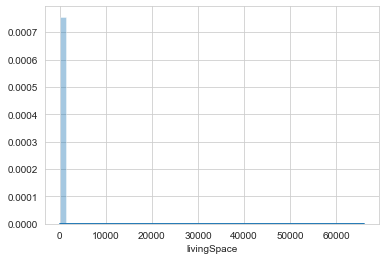

In [80]:
sns.distplot(df['livingSpace'])

In [81]:
df[df['livingSpace'] > 2000]

state  serviceCharge       heatingType telekomTvOffer  \
74367   Brandenburg         146.00   central_heating  ONE_YEAR_FREE   
189095      Sachsen          60.00   central_heating  ONE_YEAR_FREE   
206526       Hessen         128.25  district_heating  ONE_YEAR_FREE   
230582       Bayern         115.00   central_heating  ONE_YEAR_FREE   

        newlyConst  balcony  pricetrend  telekomUploadSpeed  totalRent  \
74367        False    False        4.33                 2.4      650.0   
189095       False    False        1.24                 2.4      260.0   
206526       False     True        6.17                 2.4     1641.5   
230582       False    False        6.09                40.0     1400.0   

        yearConstructed  noParkSpaces       firingTypes  hasKitchen  cellar  \
74367            1996.0           1.0               gas        True    True   
189095              NaN           NaN               gas       False    True   
206526           2016.0           1.0  district_heating        True    True   
230582           1987.0           1.0               oil       False    True   

        yearConstructedRange  baseRent houseNumber  livingSpace  \
74367                    5.0     504.0          25       8684.0   
189095                   NaN     200.0         NaN       4340.0   
206526                   9.0    1385.0           2      10259.0   
230582                   4.0    1200.0          31      66100.0   

             condition   interiorQual petsAllowed              street   lift  \
74367       modernized            NaN         NaN   Danckelmannstraße  False   
189095       well_kept            NaN  negotiable                 NaN  False   
206526  mint_condition  sophisticated         yes        Am_Klarapfel   True   
230582       well_kept  sophisticated  negotiable  Neubiberger_Straße  False   

        baseRentRange   typeOfFlat  noRooms  thermalChar  floor  \
74367               4          NaN      3.0        84.00    4.0   
189095              1    apartment      2.0          NaN    1.0   
206526              7    apartment      3.0        22.45    1.0   
230582              7  roof_storey      2.0       110.00    2.0   

        numberOfFloors  noRoomsRange  garden  livingSpaceRange  \
74367              4.0             3    True                 7   
189095             2.0             2   False                 7   
206526             4.0             3    True                 7   
230582             3.0             2    True                 7   

                 district             city  \
74367        Barnim_Kreis       Eberswalde   
189095             Plauen  Reusa_mit_Sorga   
206526  Frankfurt_am_Main     Preungesheim   
230582            München          Perlach   

                                              description  \
74367   Das Wohnhaus wurde im Jahre 1996 neu errichtet...   
189095  Ihre neue Wohnung befindet sich in einem ruhig...   
206526  Hell und luftig präsentiert sich der fünfgesch...   
230582  + kleines gepflegtes Mehrfamilienhaus\n\n+ 2-Z...   

                                               facilities  heatingCosts  \
74367   In den Wohnräumen wurde Parkettfußboden verleg...           NaN   
189095  - Tageslichtbad mit Wanne\r\n- Wohnzimmer, Sch...           NaN   
206526  Neben der attraktiven Optik überzeugen auch d...        128.25   
230582  Die gut geschnittene und ruhige Zwei-Zimmer-Wo...         85.00   

       energyEfficiencyClass  lastRefurbish   date  
74367         NO_INFORMATION            NaN  Oct19  
189095                   NaN            NaN  May19  
206526                A_PLUS         2016.0  May19  
230582                     D         2019.0  May19

__There's some properties with extreme livingSpace. I looked for it through the website and found the largest livingSpace available is 2000m2 and it still doesn't make any sense. Maybe the owner posted the total space of its building rather than only the flat. I decided to drop datas with extreme values (more than 2000m2)__

In [82]:
df.drop(df[df['livingSpace'] > 2000].index, inplace = True)

__Description and facilities are feature with free text values. It's in Germany and I tried translating it with google translate to found that the information in the text box are already listed as data features.__

In [83]:
df['description'].value_counts()

Das Objekt ist ein hochwertig saniertes und denkmalgeschütztes Mehrfamilienhaus.\r\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [84]:
df['facilities'].value_counts()

Laminat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

__I see there's duplicated description and facilities value in the data. They have the same city, street and maybe even building. But they actually have different house number which indicates that they are in the same building. I assume that maybe the person posting this is the owner of many properties listed but he/she doesn't want to write different description and facilities text (because the features are filled with text box) so he/she just copy and paste the same text.__

__The description and facilities feature are not the feature that will affect the rent price because it's up to the owner if he/she want to fill it or not (not essential like picturecount feature). So I decided to drop the columns.__

In [85]:
df.drop(['description', 'facilities'], axis = 1, inplace = True)

__EnergyEfficiencyClass feature is based on thermalChar feature. Nowadays, it's important in Europe to have energyEfficiencyClass listed in the building to become more enviromental friendly. Buildings with high efficiency class has lower thermalChar which is annual energy consumption per m2. People tends to look for higher energyEfficiencyClass to avoid high utilities price.__

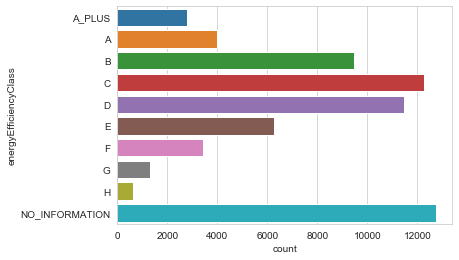

In [90]:
sns.countplot(y = df['energyEfficiencyClass'], order = ['A_PLUS', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'NO_INFORMATION'])

In [91]:
df['energyEfficiencyClass'].value_counts()

NO_INFORMATION    12762
C                 12278
D                 11482
B                  9457
E                  6275
A                  3976
F                  3439
A_PLUS             2782
G                  1305
H                   624
Name: energyEfficiencyClass, dtype: int64

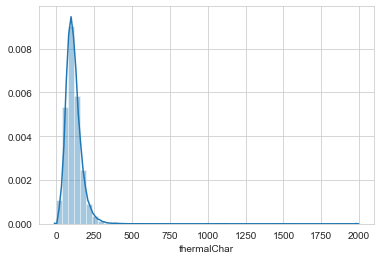

In [92]:
sns.distplot(df['thermalChar'])

In [93]:
df['thermalChar']

0         120.0
2          74.3
3         203.0
4          29.5
6         122.0
          ...  
268843      NaN
268845    126.4
268846    142.0
268847    126.2
268848      NaN
Name: thermalChar, Length: 227769, dtype: float64

In [94]:
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [95]:
try_normal(df['thermalChar'])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': nan},
 'Shapiro': 1.0,
 'K^2': nan}

In [96]:
idx = []
for i in df.index:
    if (pd.isna(df['energyEfficiencyClass'][i])) & (~pd.isna(df['thermalChar'][i])):
        idx.append(i)

In [97]:
df.loc[idx][['thermalChar', 'energyEfficiencyClass']]

thermalChar energyEfficiencyClass
2             74.30                   NaN
6            122.00                   NaN
9             76.00                   NaN
12           102.00                   NaN
13            95.98                   NaN
...             ...                   ...
268825        92.00                   NaN
268827       136.20                   NaN
268833       122.70                   NaN
268837       209.70                   NaN
268845       126.40                   NaN

[71894 rows x 2 columns]

__I'm going to fill the energyEfficiencyClass null values that have the thermalChar stated. I'll use the energyEfficiencyClass labelling based on its range.__

- A_PLUS --> <= 25
- A --> <75
- B --> <150
- C --> <225
- D --> <300
- E --> <380
- F --> <450
- G --> >450

__I'm going to fill the null values in energyEfficiencyClass with 'NO_INFORMATION' because the null values are exist because there's no information regarding it's efficiency class or the thermalChar (the owner didn't fill in the information).__

In [98]:
df['energyEfficiencyClass'].replace({'NO_INFORMATION' : np.nan}, inplace = True)

In [99]:
new = []
for i in df.index:
    if (pd.isna(df['thermalChar'][i])) & (pd.isna(df['energyEfficiencyClass'][i])):
        new.append('NO_INFORMATION')
    elif (pd.isna(df['thermalChar'][i])) & (~pd.isna(df['energyEfficiencyClass'][i])):
        new.append(df['energyEfficiencyClass'][i])
    elif df['thermalChar'][i] <= 25:
        new.append('A_PLUS')
    elif df['thermalChar'][i] < 50:
        new.append('A')
    elif df['thermalChar'][i] < 75:
        new.append('B')
    elif df['thermalChar'][i] < 100:
        new.append('C')
    elif df['thermalChar'][i] < 125:
        new.append('D')
    elif df['thermalChar'][i] < 150:
        new.append('E')
    elif df['thermalChar'][i] < 200:
        new.append('F')
    elif df['thermalChar'][i] < 250:
        new.append('G')
    else:
        new.append('H')

In [100]:
df['energyEfficiencyClass'] = new

__Then I'll drop the thermalChar feature since it's already explained by the energyEfficiencyClass feature.__

In [106]:
df.drop('thermalChar', axis = 1, inplace = True)

In [107]:
count_null(df)

null_count  total_data  percentage
state                           0      227769    0.000000
serviceCharge                4018      227769    1.764068
heatingType                 36729      227769   16.125548
telekomTvOffer              27316      227769   11.992852
newlyConst                      0      227769    0.000000
balcony                         0      227769    0.000000
pricetrend                   1597      227769    0.701149
telekomUploadSpeed          27938      227769   12.265936
totalRent                       0      227769    0.000000
yearConstructed             49151      227769   21.579319
noParkSpaces               150413      227769   66.037520
firingTypes                 48278      227769   21.196036
hasKitchen                      0      227769    0.000000
cellar                          0      227769    0.000000
yearConstructedRange        49151      227769   21.579319
baseRent                        0      227769    0.000000
houseNumber                 53807      227769   23.623496
livingSpace                     0      227769    0.000000
condition                   56771      227769   24.924814
interiorQual                88626      227769   38.910475
petsAllowed                 95095      227769   41.750633
street                      53803      227769   23.621740
lift                            0      227769    0.000000
baseRentRange                   0      227769    0.000000
typeOfFlat                  30503      227769   13.392077
noRooms                         0      227769    0.000000
floor                       40270      227769   17.680194
numberOfFloors              79220      227769   34.780853
noRoomsRange                    0      227769    0.000000
garden                          0      227769    0.000000
livingSpaceRange                0      227769    0.000000
district                        0      227769    0.000000
city                            0      227769    0.000000
heatingCosts               154756      227769   67.944277
energyEfficiencyClass           0      227769    0.000000
lastRefurbish              155130      227769   68.108478
date                            0      227769    0.000000

__HeatingCosts feature is calculated based on energyEfficiencyClass. its heatingType, the livingSpace of the property, and the usage of the renter. But the feature has so many null values (67% of data) because mostly the rent price is cold (the renter pay for heatingCosts themselves) so that the owner doesn't really know exactly what's heatingCost value is.__

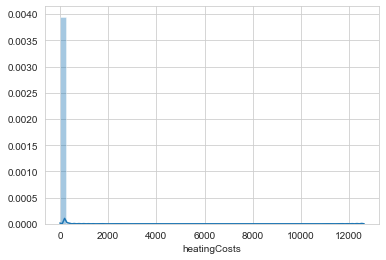

In [108]:
sns.distplot(df['heatingCosts'])

__And there's extreme value for heatingCosts.__

In [109]:
df['heatingCosts'].describe()

count    73013.000000
mean        77.164973
std        152.731878
min          0.000000
25%         54.000000
50%         70.000000
75%         90.000000
max      12613.000000
Name: heatingCosts, dtype: float64

In [110]:
df[df['heatingCosts'] > df['totalRent']]

state  serviceCharge                     heatingType  \
19434                  Sachsen          64.00                 central_heating   
22573                  Sachsen          72.84                 central_heating   
23369      Nordrhein_Westfalen         156.00                 central_heating   
35483                  Sachsen          47.60  self_contained_central_heating   
48667                   Bayern         178.09                 central_heating   
49138                  Sachsen         105.11                 central_heating   
58630            Niedersachsen         250.00                 central_heating   
62327                  Sachsen         100.36                             NaN   
63065      Nordrhein_Westfalen         205.50                 central_heating   
76881   Mecklenburg_Vorpommern          82.00                district_heating   
84027                  Sachsen          98.22                             NaN   
88647           Sachsen_Anhalt          88.58                             NaN   
99018                  Sachsen          78.77                 central_heating   
111582  Mecklenburg_Vorpommern          73.00                district_heating   
120705     Nordrhein_Westfalen          77.00                district_heating   
122652                 Sachsen          63.35                 central_heating   
151990                 Sachsen          75.13                 central_heating   
159791       Baden_Württemberg         180.00                 central_heating   
165273                 Sachsen          62.11                 central_heating   
172659     Nordrhein_Westfalen         105.00                 central_heating   
179832                 Sachsen          95.51                 central_heating   
186440          Sachsen_Anhalt          88.29                             NaN   
216566                 Sachsen          75.13                 central_heating   
228987           Niedersachsen         130.00  self_contained_central_heating   
231744                 Sachsen          61.18                 central_heating   
261222     Nordrhein_Westfalen         175.00                             NaN   
266441                 Sachsen          68.68                 central_heating   

       telekomTvOffer  newlyConst  balcony  pricetrend  telekomUploadSpeed  \
19434   ONE_YEAR_FREE       False     True        0.00                40.0   
22573   ONE_YEAR_FREE        True     True        3.47                40.0   
23369   ONE_YEAR_FREE       False     True        2.90                40.0   
35483   ONE_YEAR_FREE       False    False        2.60                40.0   
48667   ONE_YEAR_FREE       False     True        2.82                 2.4   
49138   ONE_YEAR_FREE        True     True        3.47                40.0   
58630   ONE_YEAR_FREE       False    False        0.00                40.0   
62327   ONE_YEAR_FREE       False     True        2.67                40.0   
63065   ONE_YEAR_FREE       False     True        2.91                10.0   
76881   ONE_YEAR_FREE       False     True        2.91                 2.4   
84027   ONE_YEAR_FREE       False     True        2.67                40.0   
88647             NaN       False     True        2.39                 NaN   
99018   ONE_YEAR_FREE        True     True        3.47                40.0   
111582  ONE_YEAR_FREE       False    False        3.64                 2.4   
120705  ONE_YEAR_FREE       False     True        1.79                40.0   
122652  ONE_YEAR_FREE        True     True        3.47                40.0   
151990  ONE_YEAR_FREE        True     True        3.47                40.0   
159791            NaN       False     True        3.90                 NaN   
165273  ONE_YEAR_FREE        True     True        3.47                40.0   
172659  ONE_YEAR_FREE       False     True        3.17                40.0   
179832  ONE_YEAR_FREE        True     True        3.47                40.0   
186440      ON_DEMAND       False     Tr

__I think it's kind of a human error when inputing the heatingCosts data. It has normal looking other data. I'm going to change it to null value instead.__

In [111]:
for i in df[df['heatingCosts'] > df['totalRent']].index:
    df['heatingCosts'][i] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


__I'll try cleaning the prices data. But in the end, we won't use the other prices features (serviceCharge, baseRent, heatingCosts) but totalRent to predict. We might as well just drop the feature but I'll try first.__

In [112]:
df['heatingCosts'].describe()

count    72986.000000
mean        74.819326
std         40.223502
min          0.000000
25%         53.940000
50%         70.000000
75%         90.000000
max       2029.500000
Name: heatingCosts, dtype: float64

In [113]:
df[df['heatingCosts'] > 1000][['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

totalRent  baseRent  heatingCosts  serviceCharge
37102      1480.0    1250.0        1218.0          230.0
50163     11250.0    9000.0        2000.0          250.0
89886     12900.0   10440.0        1800.0          660.0
114179     2029.5    1716.0        2029.5          420.0
165484     2815.0     890.0        1750.0          175.0
226842     1600.0    1200.0        1200.0          400.0

In [114]:
idx = []
for i in df.index:
    if df['totalRent'][i] != df['baseRent'][i] + df['serviceCharge'][i] + df['heatingCosts'][i]:
        idx.append(i)

In [115]:
wrd = df.loc[idx][['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

In [116]:
supp = []
for i in wrd.index:
    if (pd.isna(wrd['heatingCosts'][i])) & (pd.isna(wrd['serviceCharge'][i])):
        supp.append(wrd['baseRent'][i])
    elif (pd.isna(wrd['heatingCosts'][i])) & (~pd.isna(wrd['serviceCharge'][i])):
        supp.append(wrd['baseRent'][i] + wrd['serviceCharge'][i])
    elif (~pd.isna(wrd['heatingCosts'][i])) & (pd.isna(wrd['serviceCharge'][i])):
        supp.append(wrd['baseRent'][i] + wrd['heatingCosts'][i])
    else:
        supp.append(wrd['baseRent'][i] + wrd['heatingCosts'][i] + wrd['serviceCharge'][i])

In [117]:
wrd['suppose_total'] = supp

In [118]:
wrd

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total
0           744.0     534.0         110.0          210.0          854.0
2           530.0     450.0           NaN           80.0          530.0
4          1185.0     995.0           NaN          190.0         1185.0
6           765.0     585.0           NaN          180.0          765.0
7           330.0     229.0           NaN          101.0          330.0
...           ...       ...           ...            ...            ...
268842      740.0     560.0          80.0          180.0          820.0
268843      750.0     550.0           NaN          200.0          750.0
268845      559.0     399.0           NaN          160.0          559.0
268846      256.5     166.0           NaN           90.0          256.0
268847      650.0     450.0           NaN          200.0          650.0

[177884 rows x 5 columns]

In [119]:
same = []
diff = []
for i in wrd.index:
    if wrd['totalRent'][i] == wrd['suppose_total'][i]:
        same.append(i)
    else:
        diff.append(i)

In [120]:
wrd.loc[same]

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total
2           530.0     450.0           NaN           80.0          530.0
4          1185.0     995.0           NaN          190.0         1185.0
6           765.0     585.0           NaN          180.0          765.0
7           330.0     229.0           NaN          101.0          330.0
8           480.0     360.0           NaN          120.0          480.0
...           ...       ...           ...            ...            ...
268838      485.0     400.0           NaN           85.0          485.0
268840      650.0     450.0           NaN          200.0          650.0
268843      750.0     550.0           NaN          200.0          750.0
268845      559.0     399.0           NaN          160.0          559.0
268847      650.0     450.0           NaN          200.0          650.0

[137344 rows x 5 columns]

In [121]:
for i in same:
    if (pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        df['heatingCosts'][i] = 0
        df['serviceCharge'][i] = 0
    elif (pd.isna(df['heatingCosts'][i])) & (~pd.isna(df['serviceCharge'][i])):
        df['heatingCosts'][i] = 0
    elif (~pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        df['serviceCharge'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [122]:
wrd.loc[diff]

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total
0          744.00     534.0         110.0         210.00         854.00
9         1090.00     810.0           NaN         190.00        1000.00
17        1129.15     904.8         104.0         224.35        1233.15
19        1970.00    1590.0           NaN         250.00        1840.00
29         700.00     580.0           NaN         110.00         690.00
...           ...       ...           ...            ...            ...
268834    2524.47    2200.0         121.0         324.47        2645.47
268836    1625.00    1155.0           NaN         210.00        1365.00
268841    1071.84     791.7           NaN         280.14        1071.84
268842     740.00     560.0          80.0         180.00         820.00
268846     256.50     166.0           NaN          90.00         256.00

[40540 rows x 5 columns]

In [123]:
more = []
less = []
for i in diff:
    if wrd['suppose_total'][i] > wrd['totalRent'][i]:
        more.append(i)
    else :
        less.append(i)

In [124]:
wrd.loc[less]

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total
9         1090.00    810.00           NaN         190.00        1000.00
19        1970.00   1590.00           NaN         250.00        1840.00
29         700.00    580.00           NaN         110.00         690.00
31         377.08    247.06         62.34          57.73         367.13
39         534.00    360.00         70.00          94.00         524.00
...           ...       ...           ...            ...            ...
268739    1035.00    855.00           NaN         160.00        1015.00
268745     545.00    456.00           NaN            NaN         456.00
268778    1645.00   1355.00           NaN            NaN        1355.00
268836    1625.00   1155.00           NaN         210.00        1365.00
268846     256.50    166.00           NaN          90.00         256.00

[19597 rows x 5 columns]

In [125]:
miscal = []
for i in less:
    if (pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        pass
    elif (pd.isna(df['heatingCosts'][i])) & (~pd.isna(df['serviceCharge'][i])):
        df['heatingCosts'][i] = df['totalRent'][i] - wrd['suppose_total'][i]
    elif (~pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        df['serviceCharge'][i] = df['totalRent'][i] - wrd['suppose_total'][i]
    elif (~pd.isna(df['heatingCosts'][i])) & (~pd.isna(df['serviceCharge'][i])):
        miscal.append(i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
df.loc[miscal][['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

totalRent  baseRent  heatingCosts  serviceCharge
31         377.08    247.06         62.34          57.73
39         534.00    360.00         70.00          94.00
51         707.52    567.29         57.93          82.30
57         437.79    285.45         91.34          58.00
102        567.84    382.84         80.00         105.00
...           ...       ...           ...            ...
268372   11250.00   1050.00        100.00         200.00
268459    1889.25   1582.30         45.21         261.73
268543     618.00    459.39         83.00          75.00
268592     760.00    540.00         85.00          95.00
268665     426.00    291.00         69.00          46.00

[5228 rows x 4 columns]

__There's miscalculated data. I think there's additional charge not listed.__

In [127]:
test = wrd.loc[more]

In [128]:
base_serv = []
base_heat = []
for i in more:
    base_serv.append(wrd['baseRent'][i] + wrd['serviceCharge'][i])
    base_heat.append(wrd['baseRent'][i] + wrd['heatingCosts'][i])

In [129]:
test['base_serv'] = base_serv
test['base_heat'] = base_heat

In [130]:
test

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
0          744.00    534.00        110.00         210.00         854.00   
17        1129.15    904.80        104.00         224.35        1233.15   
30         450.00    330.00         75.40         120.00         525.40   
65        1634.00   1326.00         77.00         308.00        1711.00   
71         421.33    270.85         72.23          78.25         421.33   
...           ...       ...           ...            ...            ...   
268810     720.00    540.00         80.00         180.00         800.00   
268823     630.00    450.00         80.00         180.00         710.00   
268834    2524.47   2200.00        121.00         324.47        2645.47   
268841    1071.84    791.70           NaN         280.14        1071.84   
268842     740.00    560.00         80.00         180.00         820.00   

        base_serv  base_heat  
0          744.00     644.00  
17        1129.15    1008.80  
30         450.00     405.40  
65        1634.00    1403.00  
71         349.10     343.08  
...           ...        ...  
268810     720.00     620.00  
268823     630.00     530.00  
268834    2524.47    2321.00  
268841    1071.84        NaN  
268842     740.00     640.00  

[20943 rows x 7 columns]

In [131]:
test

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
0          744.00    534.00        110.00         210.00         854.00   
17        1129.15    904.80        104.00         224.35        1233.15   
30         450.00    330.00         75.40         120.00         525.40   
65        1634.00   1326.00         77.00         308.00        1711.00   
71         421.33    270.85         72.23          78.25         421.33   
...           ...       ...           ...            ...            ...   
268810     720.00    540.00         80.00         180.00         800.00   
268823     630.00    450.00         80.00         180.00         710.00   
268834    2524.47   2200.00        121.00         324.47        2645.47   
268841    1071.84    791.70           NaN         280.14        1071.84   
268842     740.00    560.00         80.00         180.00         820.00   

        base_serv  base_heat  
0          744.00     644.00  
17        1129.15    1008.80  
30         450.00     405.40  
65        1634.00    1403.00  
71         349.10     343.08  
...           ...        ...  
268810     720.00     620.00  
268823     630.00     530.00  
268834    2524.47    2321.00  
268841    1071.84        NaN  
268842     740.00     640.00  

[20943 rows x 7 columns]

In [132]:
etc = []
for i in test.index:
    if df['totalRent'][i] == test['base_serv'][i]:
        df['heatingCosts'][i] = 0
    elif df['totalRent'][i] == test['base_heat'][i]:
        df['serviceCharge'][i] = 0
    else:
        etc.append(i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
test.loc[etc]

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
17        1129.15    904.80        104.00         224.35        1233.15   
71         421.33    270.85         72.23          78.25         421.33   
137        425.00    300.00         67.50          67.50         435.00   
163        288.09    198.06           NaN          90.03         288.09   
187        435.59    303.37         46.36         132.22         481.95   
...           ...       ...           ...            ...            ...   
268627     440.00    345.00           NaN         115.00         460.00   
268638     573.42    377.42         39.00         157.00         573.42   
268715     810.00    810.00           NaN         100.00         910.00   
268834    2524.47   2200.00        121.00         324.47        2645.47   
268841    1071.84    791.70           NaN         280.14        1071.84   

        base_serv  base_heat  
17        1129.15    1008.80  
71         349.10     343.08  
137        367.50     367.50  
163        288.09        NaN  
187        435.59     349.73  
...           ...        ...  
268627     460.00        NaN  
268638     534.42     416.42  
268715     910.00        NaN  
268834    2524.47    2321.00  
268841    1071.84        NaN  

[7500 rows x 7 columns]

__There's difference because of the decimal values.__

In [134]:
df['totalRent'].isna().sum()

0

In [135]:
from math import floor
etc2 = []
for i in etc:
    if (pd.isna(test['base_serv'][i])) | (pd.isna(test['base_heat'][i])):
        etc2.append(i)
    else:
        if floor(df['totalRent'][i]) == floor(test['base_serv'][i]):
            df['heatingCosts'][i] = 0
        elif floor(df['totalRent'][i]) == floor(test['base_heat'][i]):
            df['serviceCharge'][i] = 0
        else:
            etc2.append(i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [136]:
test.loc[etc2]

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
71         421.33    270.85         72.23          78.25         421.33   
137        425.00    300.00         67.50          67.50         435.00   
163        288.09    198.06           NaN          90.03         288.09   
201        438.06    276.05         92.00          70.02         438.07   
288        298.00    210.00         38.00          76.86         324.86   
...           ...       ...           ...            ...            ...   
268589     681.62    423.21           NaN         258.42         681.63   
268627     440.00    345.00           NaN         115.00         460.00   
268638     573.42    377.42         39.00         157.00         573.42   
268715     810.00    810.00           NaN         100.00         910.00   
268841    1071.84    791.70           NaN         280.14        1071.84   

        base_serv  base_heat  
71         349.10     343.08  
137        367.50     367.50  
163        288.09        NaN  
201        346.07     368.05  
288        286.86     248.00  
...           ...        ...  
268589     681.63        NaN  
268627     460.00        NaN  
268638     534.42     416.42  
268715     910.00        NaN  
268841    1071.84        NaN  

[6762 rows x 7 columns]

In [137]:
etc3 = []
for i in etc2:
    if floor(df['totalRent'][i]) == floor(test['suppose_total'][i]):
        pass
    else:
        etc3.append(i)

In [138]:
test.loc[etc3]

totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
137         425.0     300.0          67.5          67.50         435.00   
288         298.0     210.0          38.0          76.86         324.86   
299        1450.0    1450.0           NaN         250.00        1700.00   
362         750.0     600.0          65.0          90.00         755.00   
367         525.0     480.0           NaN          85.00         565.00   
...           ...       ...           ...            ...            ...   
268404      380.0     380.0           NaN         120.00         500.00   
268431     1070.0     830.0         110.0         220.00        1160.00   
268578      485.0     385.0           NaN         110.00         495.00   
268627      440.0     345.0           NaN         115.00         460.00   
268715      810.0     810.0           NaN         100.00         910.00   

        base_serv  base_heat  
137        367.50      367.5  
288        286.86      248.0  
299       1700.00        NaN  
362        690.00      665.0  
367        565.00        NaN  
...           ...        ...  
268404     500.00        NaN  
268431    1050.00      940.0  
268578     495.00        NaN  
268627     460.00        NaN  
268715     910.00        NaN  

[4359 rows x 7 columns]

In [139]:
test.loc[etc3][test['totalRent']== test['baseRent']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
299        1450.0    1450.0           NaN          250.0         1700.0   
462         600.0     600.0           NaN          150.0          750.0   
607         750.0     750.0         125.0           75.0          950.0   
849         252.0     252.0          53.0           50.0          355.0   
1475       1250.0    1250.0           NaN          100.0         1350.0   
...           ...       ...           ...            ...            ...   
267524      500.0     500.0           NaN           80.0          580.0   
267705     2400.0    2400.0           NaN          370.0         2770.0   
268391      250.0     250.0           NaN           50.0          300.0   
268404      380.0     380.0           NaN          120.0          500.0   
268715      810.0     810.0           NaN          100.0          910.0   

        base_serv  base_heat  
299        1700.0        NaN  
462         750.0        NaN  
607         825.0      875.0  
849         302.0      305.0  
1475       1350.0        NaN  
...           ...        ...  
267524      580.0        NaN  
267705     2770.0        NaN  
268391      300.0        NaN  
268404      500.0        NaN  
268715      910.0        NaN  

[1042 rows x 7 columns]

In [140]:
for i in test.loc[etc3][test['totalRent']== test['baseRent']].index:
    if pd.isna(df['heatingCosts'][i]) & (pd.isna(df['serviceCharge'][i])):
        df['heatingCost'][i] = 0
        df['serviceCharge'][i] = 0
    elif (pd.isna(df['heatingCosts'][i])) & (~pd.isna(df['serviceCharge'][i])):
        df['heatingCosts'][i] = 0
    elif (~pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        df['serviceCharge'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
test.loc[etc3][test['totalRent']!= test['baseRent']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


totalRent  baseRent  heatingCosts  serviceCharge  suppose_total  \
137         425.0     300.0          67.5          67.50         435.00   
288         298.0     210.0          38.0          76.86         324.86   
362         750.0     600.0          65.0          90.00         755.00   
367         525.0     480.0           NaN          85.00         565.00   
616         388.0     359.0          40.0          30.00         429.00   
...           ...       ...           ...            ...            ...   
268350      870.0     690.0           NaN         200.00         890.00   
268368     2310.0    1970.0           NaN         370.00        2340.00   
268431     1070.0     830.0         110.0         220.00        1160.00   
268578      485.0     385.0           NaN         110.00         495.00   
268627      440.0     345.0           NaN         115.00         460.00   

        base_serv  base_heat  
137        367.50      367.5  
288        286.86      248.0  
362        690.00      665.0  
367        565.00        NaN  
616        389.00      399.0  
...           ...        ...  
268350     890.00        NaN  
268368    2340.00        NaN  
268431    1050.00      940.0  
268578     495.00        NaN  
268627     460.00        NaN  

[3317 rows x 7 columns]

In [142]:
for i in test.loc[etc3][test['totalRent']!= test['baseRent']].index:
    df['totalRent'][i] = test['suppose_total'][i]
    if (pd.isna(df['heatingCosts'][i])) & (~pd.isna(df['serviceCharge'][i])):
        df['heatingCosts'][i] = 0
    elif (~pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        df['serviceCharge'][i] = 0
    elif (pd.isna(df['heatingCosts'][i])) & (pd.isna(df['serviceCharge'][i])):
        df['heatingCost'][i] = 0
        df['serviceCharge'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [143]:
prices = ['totalRent', 'baseRent', 'serviceCharge', 'heatingCosts']

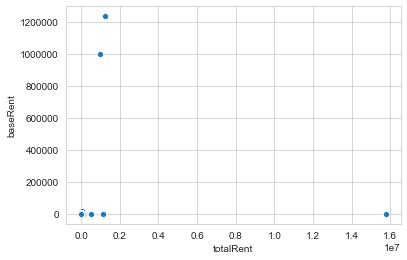

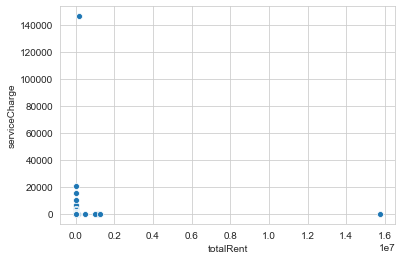

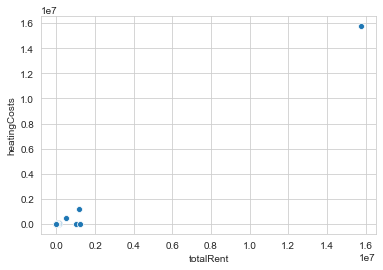

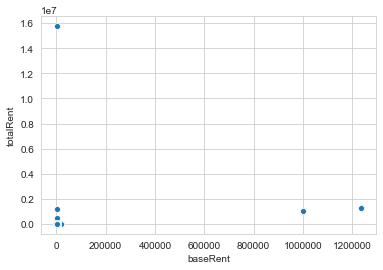

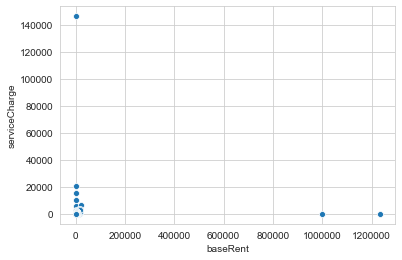

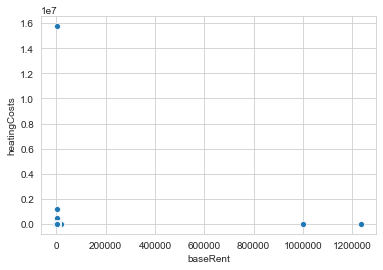

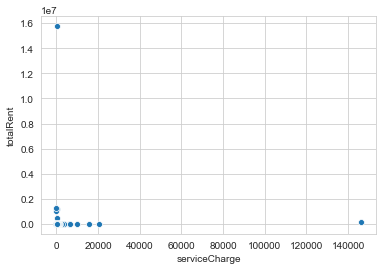

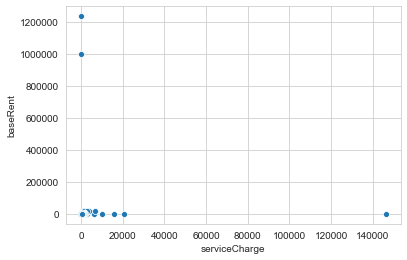

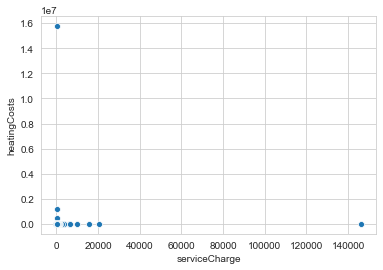

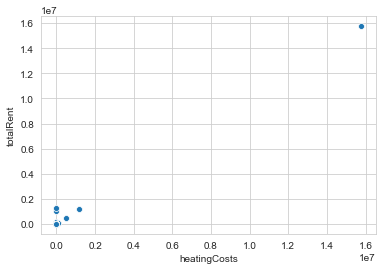

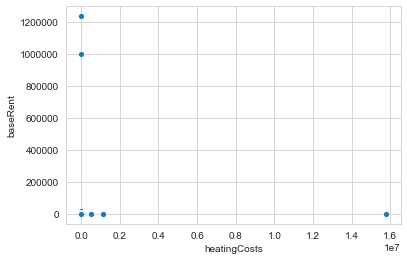

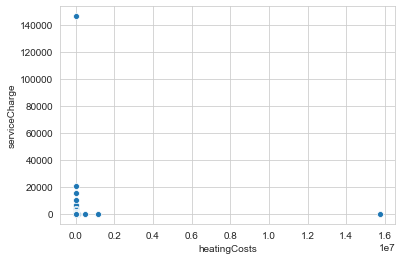

In [144]:
for i in prices:
    for j in prices:
        if i == j:
            pass
        else:
            sns.scatterplot(data = df, x = i, y = j)
            plt.show()

In [145]:
df[df['serviceCharge'] > df['totalRent']][['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

totalRent  baseRent  heatingCosts  serviceCharge
152885      314.0     314.0           0.0          891.0
243619      320.0     320.0           0.0          420.0
244300      320.0     320.0           0.0          420.0

In [146]:
for i in df[df['serviceCharge'] > df['totalRent']].index:
    df['serviceCharge'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
df['serviceCharge']

0         210.00
2          80.00
3          75.00
4         190.00
6         180.00
           ...  
268843    200.00
268845    160.00
268846     90.00
268847    200.00
268848    233.08
Name: serviceCharge, Length: 227769, dtype: float64

In [148]:
df[df['serviceCharge'] > df['totalRent']][['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

Empty DataFrame
Columns: [totalRent, baseRent, heatingCosts, serviceCharge]
Index: []

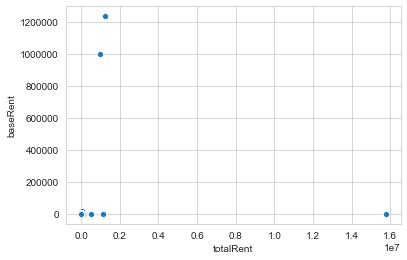

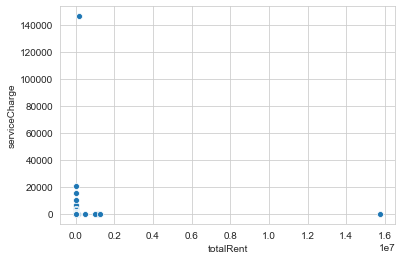

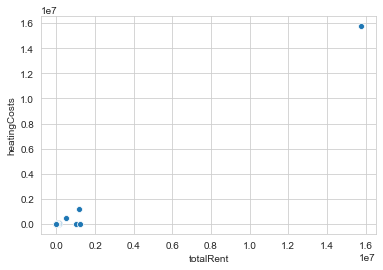

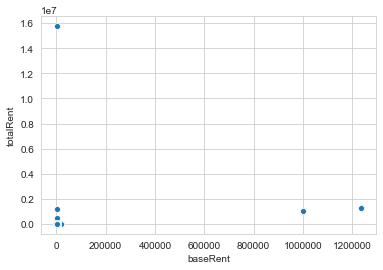

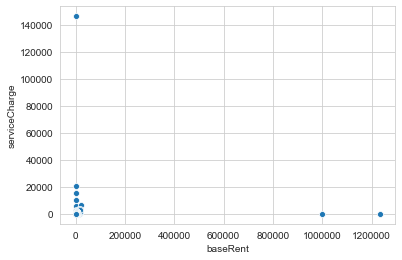

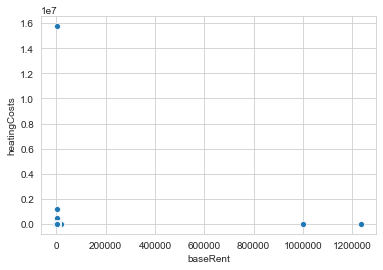

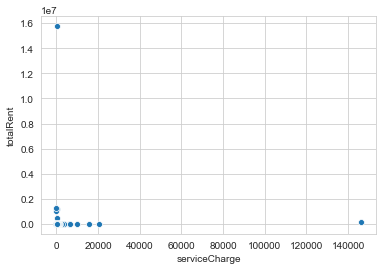

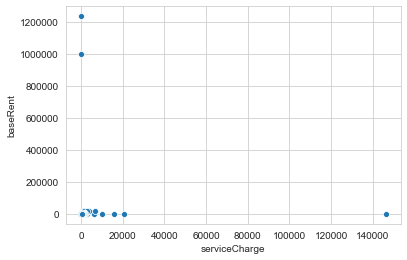

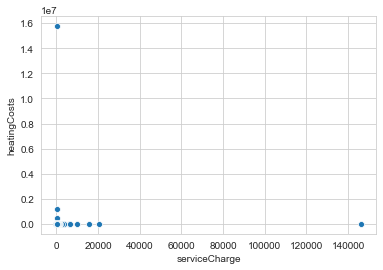

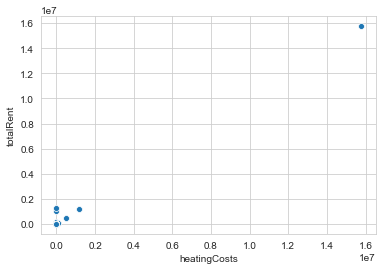

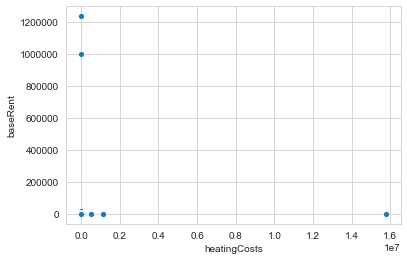

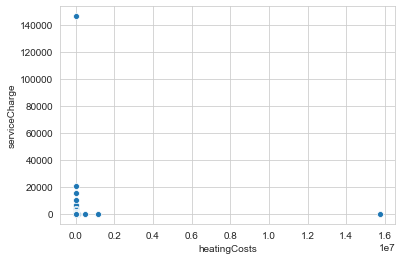

In [149]:
for i in prices:
    for j in prices:
        if i == j:
            pass
        else:
            sns.scatterplot(data = df, x = i, y = j)
            plt.show()

In [150]:
count_null(df)

null_count  total_data  percentage
state                           0      227769    0.000000
serviceCharge                2457      227769    1.078724
heatingType                 36729      227769   16.125548
telekomTvOffer              27316      227769   11.992852
newlyConst                      0      227769    0.000000
balcony                         0      227769    0.000000
pricetrend                   1597      227769    0.701149
telekomUploadSpeed          27938      227769   12.265936
totalRent                       0      227769    0.000000
yearConstructed             49151      227769   21.579319
noParkSpaces               150413      227769   66.037520
firingTypes                 48278      227769   21.196036
hasKitchen                      0      227769    0.000000
cellar                          0      227769    0.000000
yearConstructedRange        49151      227769   21.579319
baseRent                        0      227769    0.000000
houseNumber                 53807      227769   23.623496
livingSpace                     0      227769    0.000000
condition                   56771      227769   24.924814
interiorQual                88626      227769   38.910475
petsAllowed                 95095      227769   41.750633
street                      53803      227769   23.621740
lift                            0      227769    0.000000
baseRentRange                   0      227769    0.000000
typeOfFlat                  30503      227769   13.392077
noRooms                         0      227769    0.000000
floor                       40270      227769   17.680194
numberOfFloors              79220      227769   34.780853
noRoomsRange                    0      227769    0.000000
garden                          0      227769    0.000000
livingSpaceRange                0      227769    0.000000
district                        0      227769    0.000000
city                            0      227769    0.000000
heatingCosts                 3576      227769    1.570012
energyEfficiencyClass           0      227769    0.000000
lastRefurbish              155130      227769   68.108478
date                            0      227769    0.000000

__There's still null values in serviceCharge and heatingCosts feature. But it's okay.__

In [151]:
df['houseNumber'].value_counts()

1                6312
2                6008
4                5160
3                5054
5                4872
                 ... 
4 (WE 17)           1
1   3.OG. re.       1
28 - 2. OG          1
7 WE 15             1
409a                1
Name: houseNumber, Length: 4957, dtype: int64

__There's a lot of null values in houseNumber feature and I think it's basically for safety reasons. The owner want to avoid any crime possibilities. I also think that houseNumber doesn't really affect the rent price and people doesn't search for apartment rent based on it's houseNumber. I decided to drop the feature.__

In [152]:
df.drop('houseNumber', axis = 1, inplace = True)

In [153]:
count_null(df)

null_count  total_data  percentage
state                           0      227769    0.000000
serviceCharge                2457      227769    1.078724
heatingType                 36729      227769   16.125548
telekomTvOffer              27316      227769   11.992852
newlyConst                      0      227769    0.000000
balcony                         0      227769    0.000000
pricetrend                   1597      227769    0.701149
telekomUploadSpeed          27938      227769   12.265936
totalRent                       0      227769    0.000000
yearConstructed             49151      227769   21.579319
noParkSpaces               150413      227769   66.037520
firingTypes                 48278      227769   21.196036
hasKitchen                      0      227769    0.000000
cellar                          0      227769    0.000000
yearConstructedRange        49151      227769   21.579319
baseRent                        0      227769    0.000000
livingSpace                     0      227769    0.000000
condition                   56771      227769   24.924814
interiorQual                88626      227769   38.910475
petsAllowed                 95095      227769   41.750633
street                      53803      227769   23.621740
lift                            0      227769    0.000000
baseRentRange                   0      227769    0.000000
typeOfFlat                  30503      227769   13.392077
noRooms                         0      227769    0.000000
floor                       40270      227769   17.680194
numberOfFloors              79220      227769   34.780853
noRoomsRange                    0      227769    0.000000
garden                          0      227769    0.000000
livingSpaceRange                0      227769    0.000000
district                        0      227769    0.000000
city                            0      227769    0.000000
heatingCosts                 3576      227769    1.570012
energyEfficiencyClass           0      227769    0.000000
lastRefurbish              155130      227769   68.108478
date                            0      227769    0.000000

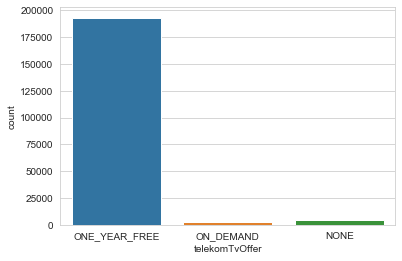

In [154]:
sns.countplot(df['telekomTvOffer'])

In [155]:
df['telekomTvOffer'].isna().sum()

27316

In [156]:
df[df['telekomTvOffer'].isna()]

state  serviceCharge       heatingType telekomTvOffer  \
0            Sachsen_Anhalt         210.00   central_heating            NaN   
2                    Bayern          80.00   central_heating            NaN   
3            Sachsen_Anhalt          75.00   central_heating            NaN   
20                  Hamburg         215.00  district_heating            NaN   
38                Thüringen         100.00   central_heating            NaN   
...                     ...            ...               ...            ...   
268824       Sachsen_Anhalt         120.00   central_heating            NaN   
268832  Nordrhein_Westfalen         135.00  district_heating            NaN   
268836  Nordrhein_Westfalen         210.00       gas_heating            NaN   
268841       Sachsen_Anhalt         280.14  district_heating            NaN   
268845            Thüringen         160.00   central_heating            NaN   

        newlyConst  balcony  pricetrend  telekomUploadSpeed  totalRent  \
0            False     True        0.83                 NaN     744.00   
2            False     True         NaN                 NaN     530.00   
3            False     True        2.54                 NaN     568.00   
20            True     True        5.08                 NaN    1135.00   
38           False    False        1.56                 NaN     480.00   
...            ...      ...         ...                 ...        ...   
268824       False     True        1.89                 NaN     380.00   
268832       False     True        2.79                 NaN     450.00   
268836       False    False        5.32                 NaN    1625.00   
268841       False     True        1.12                 NaN    1071.84   
268845       False    False        2.60                 NaN     559.00   

        yearConstructed  noParkSpaces        firingTypes  hasKitchen  cellar  \
0                1970.0           NaN                oil       False    True   
2                1967.0           NaN                oil        True    True   
3                1900.0           NaN  natural_gas_heavy       False   False   
20               2018.0           NaN   district_heating        True    True   
38                  NaN           NaN                gas        True    True   
...                 ...           ...                ...         ...     ...   
268824           1972.0           NaN   district_heating       False    True   
268832           1974.0           NaN   district_heating       False    True   
268836              NaN           2.0                gas        True    True   
268841              NaN           NaN                NaN       False    True   
268845              NaN           1.0                NaN       False    True   

        yearConstructedRange  baseRent  livingSpace  \
0                        2.0     534.0        97.00   
2                        2.0     450.0        43.00   
3                        1.0     396.0        72.00   
20                       9.0     920.0        84.19   
38                       NaN     380.0        49.01   
...                      ...       ...          ...   
268824                   3.0     260.0        56.60   
268832                   3.0     315.0        35.00   
268836                   NaN    1155.0        72.00   
268841                   NaN     791.7       121.80   
268845                   NaN     399.0        77.00   

                                 condition   interiorQual petsAllowed  \
0                                well_kept            NaN  negotiable   
2       first_time_use_after_refurbishment         normal  negotiable   
3                          fully_renovated            NaN  negotiable   
20                          first_time_use  sophisticated         NaN   
38      first_time_use_after_refurbishment  sophisticated  negotiable   
...                                    ...            ...         ...   
268824                         refurbished         

__I think null value in telekomTvOffer just means that there is currently no tv offering. I'll fill the null value with 'NONE' like the already existing value.__

In [157]:
df['telekomTvOffer'].fillna(value = 'NONE', inplace = True)

__Same like telekomTvOffer, telekomUploadSpeed also has null values that I think was refering to no internet service.__

In [158]:
df['telekomUploadSpeed'].value_counts()

40.0     135024
2.4       35996
10.0      27553
5.0         895
1.0         186
100.0       131
4.0          46
Name: telekomUploadSpeed, dtype: int64

In [159]:
df[df['telekomUploadSpeed'].isna()]

state  serviceCharge       heatingType telekomTvOffer  \
0            Sachsen_Anhalt         210.00   central_heating           NONE   
2                    Bayern          80.00   central_heating           NONE   
3            Sachsen_Anhalt          75.00   central_heating           NONE   
20                  Hamburg         215.00  district_heating           NONE   
38                Thüringen         100.00   central_heating           NONE   
...                     ...            ...               ...            ...   
268824       Sachsen_Anhalt         120.00   central_heating           NONE   
268832  Nordrhein_Westfalen         135.00  district_heating           NONE   
268836  Nordrhein_Westfalen         210.00       gas_heating           NONE   
268841       Sachsen_Anhalt         280.14  district_heating           NONE   
268845            Thüringen         160.00   central_heating           NONE   

        newlyConst  balcony  pricetrend  telekomUploadSpeed  totalRent  \
0            False     True        0.83                 NaN     744.00   
2            False     True         NaN                 NaN     530.00   
3            False     True        2.54                 NaN     568.00   
20            True     True        5.08                 NaN    1135.00   
38           False    False        1.56                 NaN     480.00   
...            ...      ...         ...                 ...        ...   
268824       False     True        1.89                 NaN     380.00   
268832       False     True        2.79                 NaN     450.00   
268836       False    False        5.32                 NaN    1625.00   
268841       False     True        1.12                 NaN    1071.84   
268845       False    False        2.60                 NaN     559.00   

        yearConstructed  noParkSpaces        firingTypes  hasKitchen  cellar  \
0                1970.0           NaN                oil       False    True   
2                1967.0           NaN                oil        True    True   
3                1900.0           NaN  natural_gas_heavy       False   False   
20               2018.0           NaN   district_heating        True    True   
38                  NaN           NaN                gas        True    True   
...                 ...           ...                ...         ...     ...   
268824           1972.0           NaN   district_heating       False    True   
268832           1974.0           NaN   district_heating       False    True   
268836              NaN           2.0                gas        True    True   
268841              NaN           NaN                NaN       False    True   
268845              NaN           1.0                NaN       False    True   

        yearConstructedRange  baseRent  livingSpace  \
0                        2.0     534.0        97.00   
2                        2.0     450.0        43.00   
3                        1.0     396.0        72.00   
20                       9.0     920.0        84.19   
38                       NaN     380.0        49.01   
...                      ...       ...          ...   
268824                   3.0     260.0        56.60   
268832                   3.0     315.0        35.00   
268836                   NaN    1155.0        72.00   
268841                   NaN     791.7       121.80   
268845                   NaN     399.0        77.00   

                                 condition   interiorQual petsAllowed  \
0                                well_kept            NaN  negotiable   
2       first_time_use_after_refurbishment         normal  negotiable   
3                          fully_renovated            NaN  negotiable   
20                          first_time_use  sophisticated         NaN   
38      first_time_use_after_refurbishment  sophisticated  negotiable   
...                                    ...            ...         ...   
268824                         refurbished         

__I'm going to fill the null values with 0 indicating no internet available. And I'll also change the data type from float to object because it's a categorical value.__

In [160]:
df['telekomUploadSpeed'].fillna(value = '0', inplace = True)

In [161]:
df['telekomUploadSpeed'] = df['telekomUploadSpeed'].astype('str')

In [162]:
df['telekomUploadSpeed'].value_counts()

40.0     135024
2.4       35996
0         27938
10.0      27553
5.0         895
1.0         186
100.0       131
4.0          46
Name: telekomUploadSpeed, dtype: int64

In [163]:
df[df['yearConstructedRange'].isna()][['yearConstructed', 'yearConstructedRange']]

yearConstructed  yearConstructedRange
6                   NaN                   NaN
7                   NaN                   NaN
18                  NaN                   NaN
21                  NaN                   NaN
31                  NaN                   NaN
...                 ...                   ...
268830              NaN                   NaN
268836              NaN                   NaN
268838              NaN                   NaN
268841              NaN                   NaN
268845              NaN                   NaN

[49151 rows x 2 columns]

In [164]:
df['yearConstructed'].isna().sum()

49151

In [165]:
df['yearConstructedRange'].isna().sum()

49151

__Because yearConstructedRange is based on yearConstructed, both feature will have the same rows that have null value. I'm going to use yearConstructedRange as categorical-nominal rather than ordinal because there isn't any higher or lower value in year. I'm going to fill the null value as a new category 'unknown'__

__The existing range in the data is :__
- 1 --> 1000 - 1950
- 2 --> 1951 - 1970
- 3 --> 1971 - 1980
- 4 --> 1981 - 1990
- 5 --> 1991 - 2000
- 6 --> 2001 - 2005
- 7 --> 2006 - 2010
- 8 --> 2011 - 2015
- 9 --> 2016 - 2020

__I think it's not fair to group the years with different intervals. I'm going to make new categories with year interval of 1 decades for years after 1950.__

In [166]:
new = []
for i in df.index:
    if (pd.isna(df['yearConstructedRange'][i])):
        new.append('unknown')
    elif (df['yearConstructedRange'][i] == 1):
        new.append('before_1950')
    elif (df['yearConstructedRange'][i] == 3):
        new.append('1971_1980')
    elif (df['yearConstructedRange'][i] == 4):
        new.append('1981_1990')
    elif (df['yearConstructedRange'][i] == 5):
        new.append('1991_2000')
    elif (df['yearConstructedRange'][i] == 6) | (df['yearConstructedRange'][i] == 7):
        new.append('2001_2010')
    elif (df['yearConstructedRange'][i] == 8) | (df['yearConstructedRange'][i] == 9):
        new.append('2011_2020')
    elif (df['yearConstructed'][i] > 1950) & (df['yearConstructed'][i] < 1961):
        new.append('1951_1960')
    elif (df['yearConstructed'][i] > 1960) & (df['yearConstructed'][i] < 1971):
        new.append('1961_1970')

In [167]:
df['yearConstructedRange'] = new

In [168]:
df['yearConstructedRange'].value_counts()

unknown        49151
before_1950    47327
2011_2020      29961
1991_2000      22545
1961_1970      20758
1971_1980      20083
1951_1960      16712
1981_1990      15225
2001_2010       6007
Name: yearConstructedRange, dtype: int64

__I'm going to only use yearConstructedRange feature and drop yearConstructed feature because it's categorical data with too many unique values.__

In [169]:
df.drop('yearConstructed', axis = 1, inplace = True)

In [170]:
df['floor'].value_counts()

 1.0     54819
 2.0     49114
 3.0     32827
 0.0     21121
 4.0     17465
 5.0      6966
 6.0      2099
 7.0       899
 8.0       504
 9.0       377
 10.0      322
-1.0       263
 11.0      211
 12.0      123
 13.0      121
 14.0       97
 15.0       59
 16.0       30
 17.0       25
 18.0       11
 19.0       11
 20.0        9
 21.0        9
 22.0        3
 24.0        3
 26.0        2
 29.0        2
 36.0        1
 31.0        1
 41.0        1
 25.0        1
 32.0        1
 23.0        1
 45.0        1
Name: floor, dtype: int64

In [171]:
df['numberOfFloors'].value_counts()

3.0     44012
4.0     35332
2.0     31704
5.0     17966
1.0      6948
6.0      5460
7.0      2112
0.0      1186
8.0       881
11.0      841
10.0      490
9.0       440
14.0      217
12.0      154
16.0      150
13.0      149
15.0      105
17.0      101
18.0       69
20.0       55
19.0       51
23.0       27
22.0       24
21.0       15
40.0       10
26.0        7
27.0        6
24.0        5
31.0        5
33.0        4
36.0        3
34.0        3
30.0        3
28.0        2
42.0        2
25.0        2
32.0        2
45.0        2
41.0        1
29.0        1
54.0        1
43.0        1
Name: numberOfFloors, dtype: int64

In [172]:
df[df['floor'] > df['numberOfFloors']]

state  serviceCharge                    heatingType  \
393                 Sachsen         140.00                central_heating   
400           Niedersachsen         130.00  combined_heat_and_power_plant   
599                 Sachsen         290.00                central_heating   
667          Sachsen_Anhalt         181.24                central_heating   
895          Sachsen_Anhalt          66.00                central_heating   
...                     ...            ...                            ...   
268048               Bayern          55.00                central_heating   
268083               Berlin         150.00                central_heating   
268186  Nordrhein_Westfalen         120.00                            NaN   
268632              Sachsen          90.00                central_heating   
268828               Bayern         200.00                central_heating   

       telekomTvOffer  newlyConst  balcony  pricetrend telekomUploadSpeed  \
393     ONE_YEAR_FREE       False     True        4.32               40.0   
400     ONE_YEAR_FREE        True     True        4.23               40.0   
599              NONE       False     True        2.29                  0   
667              NONE       False     True        3.39                  0   
895     ONE_YEAR_FREE       False     True        3.57               40.0   
...               ...         ...      ...         ...                ...   
268048           NONE       False    False        5.78                  0   
268083  ONE_YEAR_FREE       False     True        7.07               40.0   
268186  ONE_YEAR_FREE       False     True        3.33               40.0   
268632  ONE_YEAR_FREE       False    False        1.75                2.4   
268828  ONE_YEAR_FREE       False    False        4.04               40.0   

        totalRent  noParkSpaces       firingTypes  hasKitchen  cellar  \
393        520.00           NaN               gas       False    True   
400        795.00           NaN  district_heating        True   False   
599       1465.00           NaN               gas       False    True   
667        654.04           NaN               NaN       False   False   
895        612.00           1.0  district_heating       False    True   
...           ...           ...               ...         ...     ...   
268048     650.00           NaN               gas        True    True   
268083     849.00           NaN               NaN       False   False   
268186     705.00           1.0               NaN       False    True   
268632     310.00           NaN               gas       False   False   
268828    1300.00           2.0               oil        True    True   

       yearConstructedRange  baseRent  livingSpace       condition  \
393             before_1950     380.0        63.26       well_kept   
400               2011_2020     665.0        57.00  first_time_use   
599               2001_2010    1150.0       157.67     refurbished   
667             before_1950     472.8        78.80       well_kept   
895             before_1950     396.0        66.00  mint_condition   
...                     ...       ...          ...             ...   
268048            1971_1980     540.0        60.00      modernized   
268083          before_1950     699.0        58.00             NaN   
268186            1971_1980     485.0        92.00       well_kept   
268632            1991_2000     220.0        34.00       well_kept   
268828            1991_2000    1100.0       100.00       well_kept   

         interiorQual petsAllowed           street   lift  baseRentRange  \
393            normal  negotiable     Arnoldstraße  False              2   
400     sophisticated          no     Kreyenstraße   True              5   
599     sophisticated  negotiable     Reichsstraße   True              7   
667               NaN  negotiable   Lemsdorfer_Weg  False              3   
895            normal  negotiable        Zirkelweg  False              2  

__I'm going to drop the datas with floor less than numberOfFloors because it's impossible to have room at 5th floor on 2 floored building and I can't assume which data (floor or numberOfFloors) is the right one.__

In [173]:
df.drop(df[df['floor'] > df['numberOfFloors']].index, inplace = True)

In [174]:
df['heatingType'].value_counts()

central_heating                   108867
district_heating                   21169
gas_heating                        18187
floor_heating                      15573
self_contained_central_heating     14635
oil_heating                         4558
heat_pump                           2202
combined_heat_and_power_plant       1769
night_storage_heater                1124
wood_pellet_heating                  854
electric_heating                     728
stove_heating                        244
solar_heating                        147
Name: heatingType, dtype: int64

In [175]:
df['heatingType'].isna().sum()

36557

__As we knew, heatingType will determine how much the heatingCosts will be and surely would affect the totalRent.__

In [176]:
df['heatingCosts'].describe()

count    2.230530e+05
mean     1.014662e+02
std      3.345430e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.430000e+01
max      1.574996e+07
Name: heatingCosts, dtype: float64

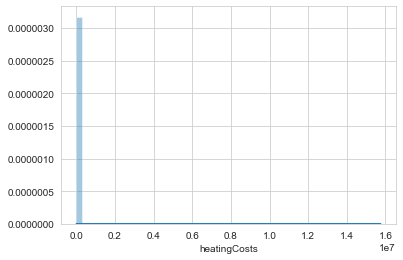

In [178]:
sns.distplot(df['heatingCosts'])

In [179]:
df[df['heatingCosts'] > 5000]

state  serviceCharge                     heatingType  \
23829        Sachsen_Anhalt         171.75                district_heating   
26751         Niedersachsen          11.19                 central_heating   
98121        Sachsen_Anhalt         110.00                 central_heating   
150711    Baden_Württemberg         200.00                 central_heating   
171150  Nordrhein_Westfalen         135.00                 central_heating   
221121      Rheinland_Pfalz         250.00   combined_heat_and_power_plant   
222735   Schleswig_Holstein         260.00                     oil_heating   
226527  Nordrhein_Westfalen         159.00  self_contained_central_heating   

       telekomTvOffer  newlyConst  balcony  pricetrend telekomUploadSpeed  \
23829   ONE_YEAR_FREE       False     True        1.52               40.0   
26751   ONE_YEAR_FREE       False     True        3.61               10.0   
98121   ONE_YEAR_FREE       False    False        0.75               40.0   
150711  ONE_YEAR_FREE       False     True        4.98               40.0   
171150  ONE_YEAR_FREE       False    False        3.51               40.0   
221121  ONE_YEAR_FREE       False     True        4.66               40.0   
222735  ONE_YEAR_FREE       False    False        3.90               10.0   
226527  ONE_YEAR_FREE       False     True        2.42               40.0   

         totalRent  noParkSpaces       firingTypes  hasKitchen  cellar  \
23829      63204.0           1.0  district_heating       False    True   
26751      19519.0           NaN  district_heating        True    True   
98121      37600.0           NaN               NaN       False    True   
150711   1150900.0           1.0               oil       False   False   
171150    485350.0           NaN               gas       False   False   
221121  15751535.0           3.0               gas       False    True   
222735    108000.0           1.0               oil       False   False   
226527     64651.0           NaN               gas       False    True   

       yearConstructedRange  baseRent  livingSpace        condition  \
23829             1991_2000    460.29        68.70        well_kept   
26751           before_1950    184.00        16.00  fully_renovated   
98121             1981_1990    266.00        49.00      refurbished   
150711              unknown    950.00       137.00      refurbished   
171150          before_1950    350.00        62.00              NaN   
221121            2011_2020   1325.00       125.00   mint_condition   
222735            1971_1980    820.00        86.61        well_kept   
226527            1961_1970    487.51        79.00        well_kept   

         interiorQual petsAllowed                street   lift  baseRentRange  \
23829          normal  negotiable     G._Hauptmann_Str.   True              3   
26751   sophisticated  negotiable         Oeltzenstraße  False              1   
98121          normal         NaN  Erich-Weinert-Straße  False              1   
150711         normal  negotiable                   NaN  False              6   
171150         normal  negotiable          Bismarckstr.  False              2   
221121         luxury          no                   NaN   True              7   
222735            NaN         NaN      Ahrensfelder_Weg  False              6   
226527         normal  negotiable         Schaller_Str.  False              3   

       typeOfFlat  noRooms  floor  numberOfFloors  noRoomsRange  garden  \
23829   apartment      2.0    2.0             5.0             2   False   
26751         NaN      1.0    3.0             3.0             1    True   
98121   apartment      2.0    5.0             NaN             2   False   
150711  apartment      5.0    2.0             2.0             5    True   
171150  apartment      3.5    3.0             3.0             3   False   
221121  apartment      3.0    2.0             3.0             3   False   
222735  apartment      2.5    NaN             NaN             2

__I'll remove the extreme heatingCosts value.__

In [180]:
df.drop(df[df['heatingCosts'] > 5000].index, inplace = True)

In [181]:
df['totalRent'].describe()

count    2.266060e+05
mean     8.264849e+02
std      3.398602e+03
min      5.900000e+00
25%      4.700000e+02
50%      6.500000e+02
75%      9.860000e+02
max      1.234567e+06
Name: totalRent, dtype: float64

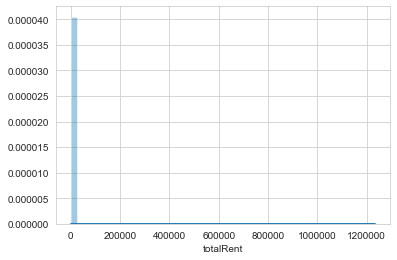

In [183]:
sns.distplot(df['totalRent'])

In [184]:
df[df['totalRent'] > 50000]

state  serviceCharge                     heatingType  \
19718                Berlin           50.0                 central_heating   
168356  Nordrhein_Westfalen       146118.0  self_contained_central_heating   
172082       Sachsen_Anhalt            0.0                             NaN   
259456    Baden_Württemberg            0.0                             NaN   

       telekomTvOffer  newlyConst  balcony  pricetrend telekomUploadSpeed  \
19718   ONE_YEAR_FREE       False    False       10.17               40.0   
168356           NONE       False    False        4.74                  0   
172082           NONE       False    False        2.22                  0   
259456  ONE_YEAR_FREE       False     True        3.90                5.0   

         totalRent  noParkSpaces firingTypes  hasKitchen  cellar  \
19718     51570.00           NaN         gas       False   False   
168356   146766.29           NaN         gas       False    True   
172082  1000000.00           NaN         NaN       False   False   
259456  1234567.00           NaN         NaN        True   False   

       yearConstructedRange    baseRent  livingSpace        condition  \
19718               unknown      427.70        32.90  fully_renovated   
168356          before_1950      648.29       117.87       modernized   
172082              unknown  1000000.00        10.00              NaN   
259456              unknown  1234567.00        76.00              NaN   

       interiorQual petsAllowed           street   lift  baseRentRange  \
19718           NaN  negotiable       Ufnaustr._  False              3   
168356       normal         NaN  Gahlensche_Str.  False              5   
172082          NaN         NaN    Zu_den_Wiesen  False              9   
259456          NaN         NaN     Kastanienweg  False              9   

       typeOfFlat  noRooms  floor  numberOfFloors  noRoomsRange  garden  \
19718   apartment      1.0    4.0             4.0             1   False   
168356  apartment      3.0    1.0             NaN             3   False   
172082      other      1.0    NaN             NaN             1   False   
259456  apartment      4.0    NaN             NaN             4   False   

        livingSpaceRange                district                   city  \
19718                  1                  Berlin  Tiergarten_Tiergarten   
168356                 5                  Bochum                  Hamme   
172082                 1  Altmarkkreis_Salzwedel              Güssefeld   
259456                 3      Rhein_Neckar_Kreis         Sankt_Leon_Rot   

        heatingCosts energyEfficiencyClass  lastRefurbish   date  
19718           38.0        NO_INFORMATION         2019.0  May19  
168356           0.0                     E         2011.0  May19  
172082           0.0        NO_INFORMATION            NaN  May19  
259456           0.0        NO_INFORMATION            NaN  Sep18

__I'll remove the extreme totalRent value.__

In [185]:
df.drop(df[df['totalRent'] > 50000].index, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


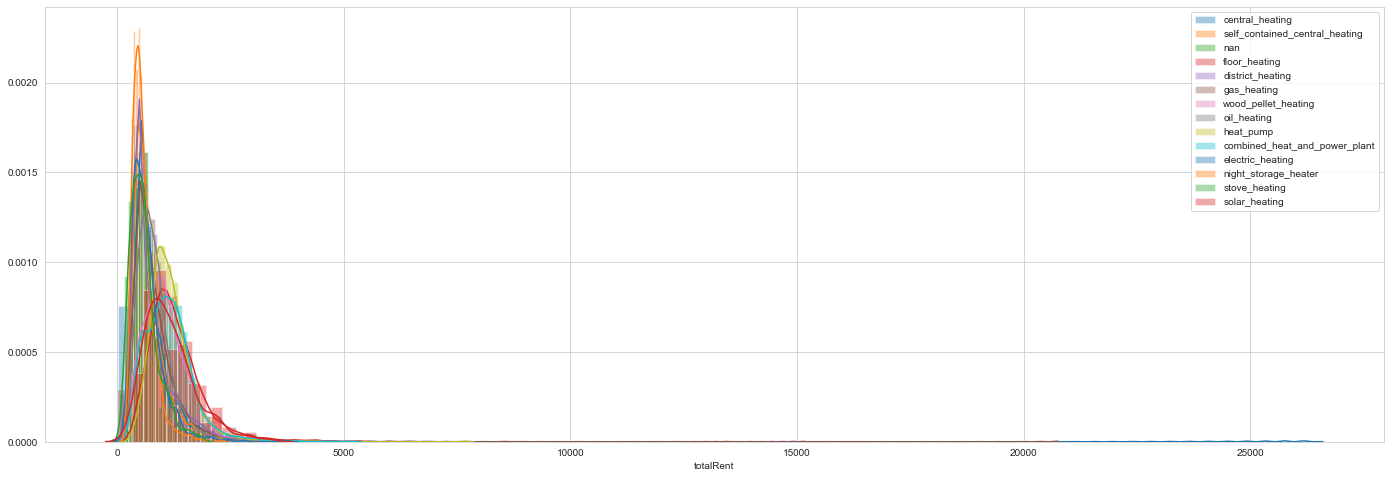

In [186]:
plt.figure(figsize = (24,8))
for i in df['heatingType'].unique():
    sns.distplot(df[df['heatingType'] == i]['totalRent'], label = i)
    plt.legend()

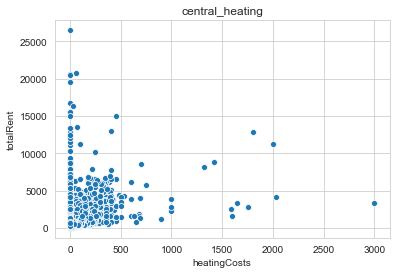

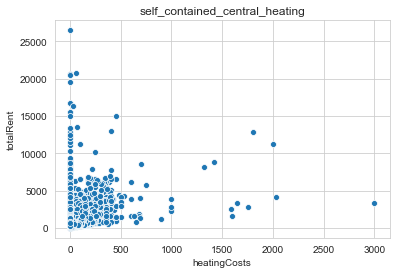

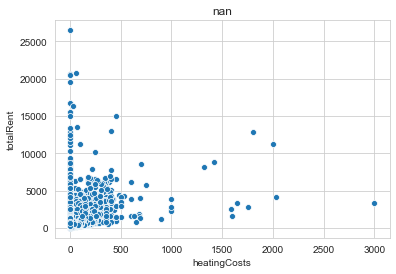

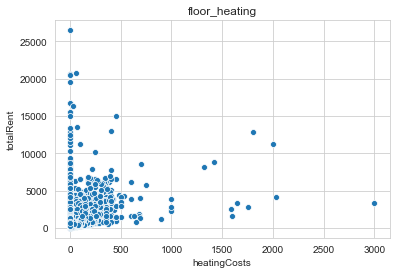

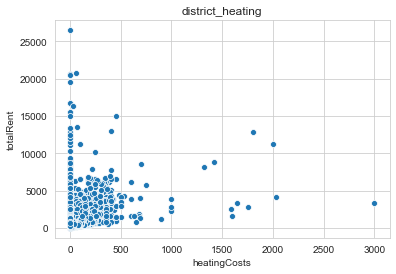

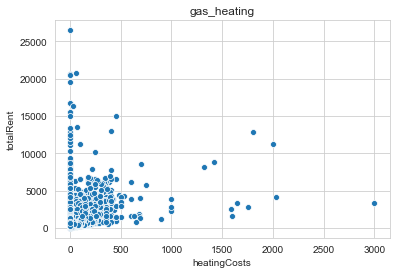

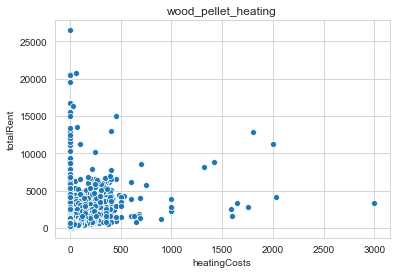

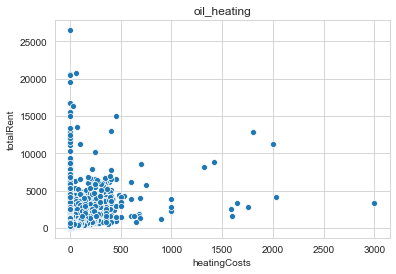

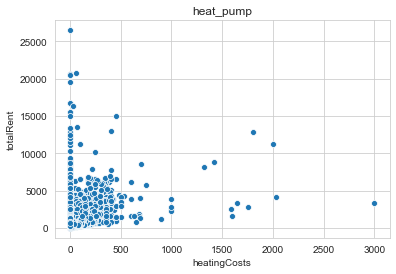

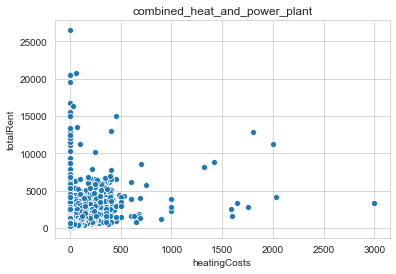

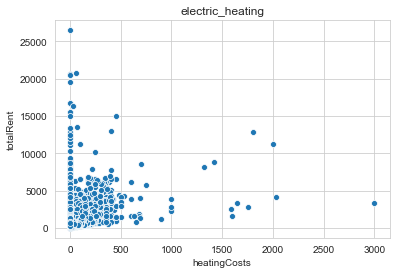

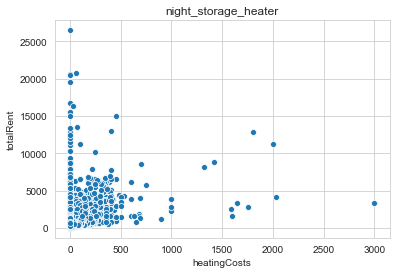

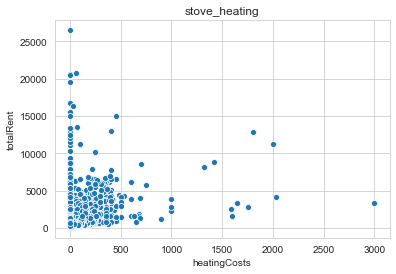

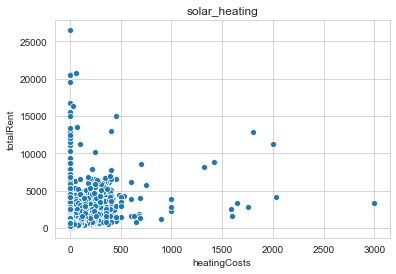

In [187]:
for i in df['heatingType'].unique():
    plt.title(i)
    sns.scatterplot(data = df, x = 'heatingCosts', y = 'totalRent')
    plt.show()

__I'll fill the null value in heatingType with 'unknown'.__

In [188]:
df['heatingType'].isna().sum()

36555

In [189]:
df['heatingType'].fillna(value = 'unknown', inplace = True)

In [190]:
df['lastRefurbish'].value_counts()

2019.0    17942
2018.0    11705
2017.0     6468
2016.0     5204
2015.0     4147
          ...  
1964.0        1
1965.0        1
1969.0        1
1973.0        1
1867.0        1
Name: lastRefurbish, Length: 76, dtype: int64

In [191]:
df['lastRefurbish'].isna().sum()

154330

__The null value in lastRefrubish feature indicating the building has never been refurbished yet.__

In [192]:
df['condition'].isna().sum()

56514

In [193]:
df['condition'].value_counts()

well_kept                             55131
refurbished                           24398
fully_renovated                       22373
mint_condition                        18845
first_time_use                        18027
modernized                            14709
first_time_use_after_refurbishment    13639
negotiable                             1824
need_of_renovation                     1138
ripe_for_demolition                       4
Name: condition, dtype: int64

In [194]:
df[~pd.isna(df['lastRefurbish'])]['condition'].value_counts()

well_kept                             14573
refurbished                           11849
fully_renovated                       10356
first_time_use_after_refurbishment    10304
modernized                             8181
mint_condition                         7822
first_time_use                         3748
negotiable                              507
need_of_renovation                      176
ripe_for_demolition                       2
Name: condition, dtype: int64

In [195]:
df[(~pd.isna(df['lastRefurbish'])) & (df['condition'] == 'ripe_for_demolition')]

state  serviceCharge      heatingType telekomTvOffer  \
230391  Nordrhein_Westfalen          200.0  central_heating  ONE_YEAR_FREE   
258999        Niedersachsen            2.0          unknown           NONE   

        newlyConst  balcony  pricetrend telekomUploadSpeed  totalRent  \
230391       False     True        4.25               40.0      975.0   
258999       False    False        5.18                  0     1002.0   

        noParkSpaces firingTypes  hasKitchen  cellar yearConstructedRange  \
230391           1.0         gas        True    True            1981_1990   
258999           NaN         NaN       False   False              unknown   

        baseRent  livingSpace            condition   interiorQual petsAllowed  \
230391     775.0        86.39  ripe_for_demolition  sophisticated  negotiable   
258999    1000.0         2.00  ripe_for_demolition            NaN         NaN   

                      street   lift  baseRentRange           typeOfFlat  \
230391                   NaN  False              5  raised_ground_floor   
258999  auf_dem_Geldspeicher  False              6                  NaN   

        noRooms  floor  numberOfFloors  noRoomsRange  garden  \
230391      3.5    1.0             4.0             3    True   
258999      3.8    NaN             NaN             3   False   

        livingSpaceRange          district           city  heatingCosts  \
230391                 4             Essen  Holsterhausen           0.0   
258999                 1  Schaumburg_Kreis   Sachsenhagen           0.0   

       energyEfficiencyClass  lastRefurbish   date  
230391                     D         2019.0  May19  
258999        NO_INFORMATION         1867.0  May19

In [196]:
df[(~pd.isna(df['lastRefurbish'])) & (pd.isna(df['condition']))]

state  serviceCharge                     heatingType  \
52                  Sachsen         139.00                 central_heating   
88        Baden_Württemberg         395.00                 central_heating   
122     Nordrhein_Westfalen         180.00                         unknown   
166                 Sachsen            NaN  self_contained_central_heating   
256                 Sachsen          75.00                 central_heating   
...                     ...            ...                             ...   
268769              Sachsen         144.00                         unknown   
268780       Sachsen_Anhalt         130.00                 central_heating   
268836  Nordrhein_Westfalen         210.00                     gas_heating   
268841       Sachsen_Anhalt         280.14                district_heating   
268848               Berlin         233.08                 central_heating   

       telekomTvOffer  newlyConst  balcony  pricetrend telekomUploadSpeed  \
52      ONE_YEAR_FREE       False    False        2.47               40.0   
88      ONE_YEAR_FREE       False     True        6.44               40.0   
122     ONE_YEAR_FREE       False     True        3.35               10.0   
166              NONE       False     True        1.71                  0   
256     ONE_YEAR_FREE       False     True        2.74               40.0   
...               ...         ...      ...         ...                ...   
268769  ONE_YEAR_FREE       False     True        4.05               40.0   
268780  ONE_YEAR_FREE       False    False        1.35                2.4   
268836           NONE       False    False        5.32                  0   
268841           NONE       False     True        1.12                  0   
268848  ONE_YEAR_FREE       False    False        8.60               10.0   

        totalRent  noParkSpaces       firingTypes  hasKitchen  cellar  \
52         389.00           NaN               gas       False    True   
88        2225.00           NaN               gas        True    True   
122        600.00           NaN               NaN        True    True   
166        292.00           NaN               gas       False   False   
256        292.00           NaN               NaN       False    True   
...           ...           ...               ...         ...     ...   
268769     624.00           1.0               gas       False    True   
268780     435.00           NaN               gas       False    True   
268836    1625.00           2.0               gas        True    True   
268841    1071.84           NaN               NaN       False    True   
268848    1631.56           NaN  district_heating       False   False   

       yearConstructedRange  baseRent  livingSpace condition   interiorQual  \
52              before_1950    250.00        66.72       NaN         normal   
88                1971_1980   1830.00       210.00       NaN            NaN   
122                 unknown    420.00        55.00       NaN            NaN   
166                 unknown    195.00        41.00       NaN            NaN   
256               1971_1980    217.00        25.53       NaN         normal   
...                     ...       ...          ...       ...            ...   
268769            2001_2010    480.00        63.48       NaN            NaN   
268780          before_1950    305.00        50.95       NaN         normal   
268836              unknown   1155.00        72.00       NaN  sophisticated   
268841              unknown    791.70       121.80       NaN         normal   
268848            2001_2010   1281.94       116.54       NaN         normal   

       petsAllowed                 street   lift  baseRentRange    typeOfFlat  \
52      negotiable  Alfred-Schlagk-Straße   True              1     apartment   
88             NaN                    NaN  False              8     apartment   
122            NaN                    NaN  False              3     apartment   
166     ne

__I'm going to make a new feature explaining condition to tell whether the property is new / refurbished or if it's not first time use / not refurbished. True for properties that has good condition.__

In [197]:
good = []
for i in df.index:
    if (~pd.isna(df['lastRefurbish'][i])) & (pd.isna(df['condition'][i])):
        good.append(True)
    elif (df['condition'][i] == 'ripe_for_demolition') |  (df['condition'][i] == 'need_of_renovation') | (df['condition'][i] == 'negotiable'):
        good.append(False)
    else:
        good.append(True)

In [198]:
df['goodCondition'] = good

__Then I'll drop lastRefurbish and condition feature.__

In [199]:
df.drop(['lastRefurbish', 'condition'], axis = 1, inplace = True)

In [200]:
df['interiorQual'].value_counts()

normal           73694
sophisticated    56515
luxury            6567
simple            1646
Name: interiorQual, dtype: int64

In [201]:
df[df['interiorQual'].isna()]

state  serviceCharge      heatingType telekomTvOffer  \
0       Sachsen_Anhalt          210.0  central_heating           NONE   
3       Sachsen_Anhalt           75.0  central_heating           NONE   
8              Sachsen          120.0  central_heating  ONE_YEAR_FREE   
9               Bayern          190.0  central_heating  ONE_YEAR_FREE   
10             Sachsen          125.0  central_heating  ONE_YEAR_FREE   
...                ...            ...              ...            ...   
268824  Sachsen_Anhalt          120.0  central_heating           NONE   
268827  Sachsen_Anhalt           75.0          unknown  ONE_YEAR_FREE   
268833          Bayern           80.0      gas_heating  ONE_YEAR_FREE   
268835          Bayern            0.0  central_heating  ONE_YEAR_FREE   
268840  Sachsen_Anhalt          200.0  central_heating  ONE_YEAR_FREE   

        newlyConst  balcony  pricetrend telekomUploadSpeed  totalRent  \
0            False     True        0.83                  0     744.00   
3            False     True        2.54                  0     568.00   
8            False     True        4.69               40.0     480.00   
9            False    False        4.47               10.0    1090.00   
10           False     True        0.39                2.4     410.00   
...            ...      ...         ...                ...        ...   
268824       False     True        1.89                  0     380.00   
268827       False     True        0.47               40.0     416.71   
268833       False     True        1.43               40.0     570.00   
268835       False     True        5.74               40.0     715.00   
268840       False     True        2.79               40.0     650.00   

        noParkSpaces        firingTypes  hasKitchen  cellar  \
0                NaN                oil       False    True   
3                NaN  natural_gas_heavy       False   False   
8                NaN                gas       False   False   
9                NaN                gas       False   False   
10               NaN                gas       False   False   
...              ...                ...         ...     ...   
268824           NaN   district_heating       False    True   
268827           NaN                NaN       False   False   
268833           NaN                gas        True    True   
268835           1.0   district_heating        True   False   
268840           NaN                gas       False    True   

       yearConstructedRange  baseRent  livingSpace interiorQual petsAllowed  \
0                 1961_1970    534.00        97.00          NaN  negotiable   
3               before_1950    396.00        72.00          NaN  negotiable   
8               before_1950    360.00        60.22          NaN  negotiable   
9                 2001_2010    810.00        70.00          NaN  negotiable   
10              before_1950    285.00        57.36          NaN  negotiable   
...                     ...       ...          ...          ...         ...   
268824            1971_1980    260.00        56.60          NaN  negotiable   
268827            1961_1970    266.71        57.98          NaN         NaN   
268833            1981_1990    450.00        48.00          NaN          no   
268835            1991_2000    715.00        57.00          NaN          no   
268840          before_1950    450.00        68.00          NaN          no   

                         street   lift  baseRentRange   typeOfFlat  noRooms  \
0       Straße_der_Freundschaft   True              4    apartment      3.0   
3          Halberstädter_Straße  False              2    apartment      2.0   
8              Gerstäckerstraße  False              2    apartment      2.0   
9                           NaN   True              6         loft      2.5   
10                          NaN  False              1    apartment      2.0   
...                         ...    ...            ...          ...      ...   
2688

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


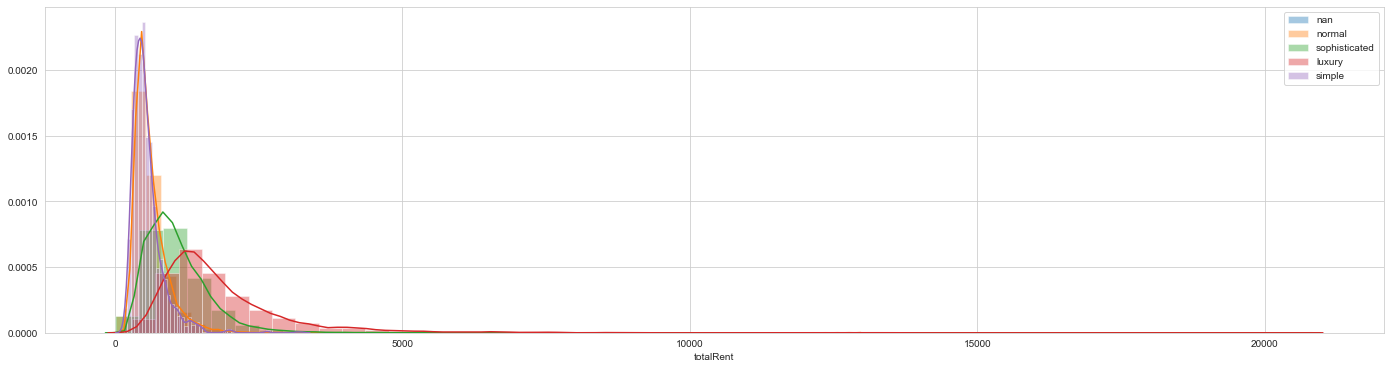

In [202]:
plt.figure(figsize = (24,6))
for i in df['interiorQual'].unique():
    sns.distplot(df[df['interiorQual'] == i]['totalRent'], label = i)
    plt.legend()

__I'm going to make a new feature indicating if the property has a nice interior or not. We can see that luxury and sophisticated interiorQuality tend to have higher rent price. I'm going to group the luxury and sophisticated category into True and normal, simple and null value to False.__

In [203]:
nice = []
for i in df.index:
    if (df['interiorQual'][i] == 'luxury') | (df['interiorQual'][i] == 'sophisticated'):
        nice.append(True)
    else:
        nice.append(False)

In [204]:
df['niceInterior'] = nice

In [205]:
df['niceInterior'].value_counts()

False    163520
True      63082
Name: niceInterior, dtype: int64

__Then I'll drop the interiorQual feature.__

In [206]:
df.drop('interiorQual', axis = 1, inplace = True)

In [207]:
count_null(df)

null_count  total_data  percentage
state                           0      226602    0.000000
serviceCharge                2446      226602    1.079426
heatingType                     0      226602    0.000000
telekomTvOffer                  0      226602    0.000000
newlyConst                      0      226602    0.000000
balcony                         0      226602    0.000000
pricetrend                   1587      226602    0.700347
telekomUploadSpeed              0      226602    0.000000
totalRent                       0      226602    0.000000
noParkSpaces               149669      226602   66.049285
firingTypes                 48019      226602   21.190899
hasKitchen                      0      226602    0.000000
cellar                          0      226602    0.000000
yearConstructedRange            0      226602    0.000000
baseRent                        0      226602    0.000000
livingSpace                     0      226602    0.000000
petsAllowed                 94668      226602   41.777213
street                      53539      226602   23.626888
lift                            0      226602    0.000000
baseRentRange                   0      226602    0.000000
typeOfFlat                  30335      226602   13.386907
noRooms                         0      226602    0.000000
floor                       40267      226602   17.769923
numberOfFloors              79215      226602   34.957767
noRoomsRange                    0      226602    0.000000
garden                          0      226602    0.000000
livingSpaceRange                0      226602    0.000000
district                        0      226602    0.000000
city                            0      226602    0.000000
heatingCosts                 3561      226602    1.571478
energyEfficiencyClass           0      226602    0.000000
date                            0      226602    0.000000
goodCondition                   0      226602    0.000000
niceInterior                    0      226602    0.000000

In [208]:
df['noParkSpaces'].value_counts()

1.0      65339
2.0       7259
0.0       3172
3.0        317
4.0        112
         ...  
58.0         1
64.0         1
310.0        1
37.0         1
76.0         1
Name: noParkSpaces, Length: 66, dtype: int64

__There's so many null value in noParkSpaces. I'll change the feature to if the property has parking space or not and I'll drop the noParkSpaces feature.__

In [209]:
park = []
for i in df.index:
    if (pd.isna(df['noParkSpaces'][i])) | (df['noParkSpaces'][i] == 0):
        park.append(False)
    else:
        park.append(True)

In [210]:
df['parkSpace'] = park

In [211]:
df.drop('noParkSpaces', axis = 1, inplace = True)

In [212]:
df['petsAllowed'].value_counts()

negotiable    78763
no            44082
yes            9089
Name: petsAllowed, dtype: int64

In [213]:
df['petsAllowed'].isna().sum()

94668

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


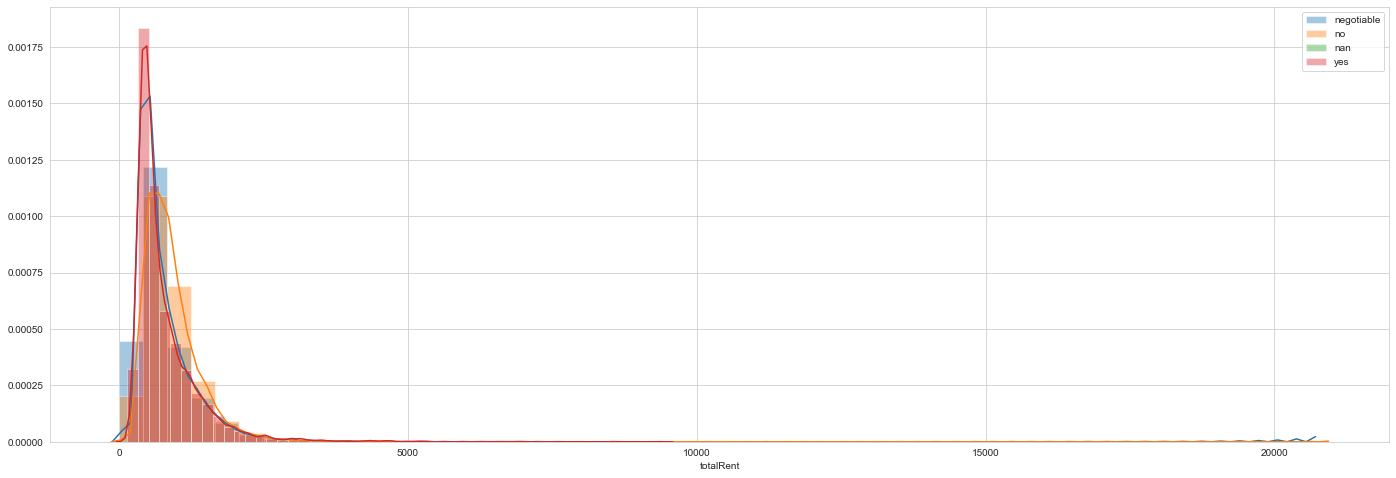

In [216]:
plt.figure(figsize = (24,8))
for i in df['petsAllowed'].unique():
    sns.distplot(df[df['petsAllowed'] == i]['totalRent'], label = i)
    plt.legend()

__I'll fill the null value in petsAllowed with unknown.__

In [217]:
df['petsAllowed'].fillna(value = 'unknown', inplace = True)

In [218]:
df['street'].value_counts()

Hauptstraße         803
Bahnhofstraße       720
Leipziger_Straße    399
Goethestraße        367
Bahnhofstr.         348
                   ... 
Boessnerstr.          1
Steinern_Straße       1
Steffensstraße        1
Knappestraße          1
Pelzmühlenstr.        1
Name: street, Length: 49860, dtype: int64

In [219]:
df['city'].value_counts()

Innenstadt          3656
Stadtmitte          2305
Altstadt            2062
Sonnenberg          1785
Kaßberg             1593
                    ... 
Presseck               1
Hirschhorn/Pfalz       1
Brücken                1
Ziegenhain             1
Köhlerberg             1
Name: city, Length: 8336, dtype: int64

In [220]:
df['district'].value_counts()

Leipzig                         12526
Chemnitz                        11355
Berlin                           9645
Dresden                          6308
Magdeburg                        4526
                                ...  
Sankt_Wendel_Kreis                 28
Lichtenfels_Kreis                  27
Haßberge_Kreis                     21
Neustadt_a.d._Waldnaab_Kreis       12
Kronach_Kreis                       7
Name: district, Length: 419, dtype: int64

__Street, City, and District are categorical features with so many unique values. I decided to use state to explain the data instead.__

In [221]:
df.drop(['street', 'city', 'district'], axis = 1, inplace = True)

In [222]:
df['typeOfFlat'].value_counts()

apartment              110151
roof_storey             29608
ground_floor            26905
other                    8507
maisonette               7777
raised_ground_floor      5030
terraced_flat            2906
penthouse                2826
half_basement            1755
loft                      802
Name: typeOfFlat, dtype: int64

In [223]:
df['typeOfFlat'].isna().sum()

30335

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


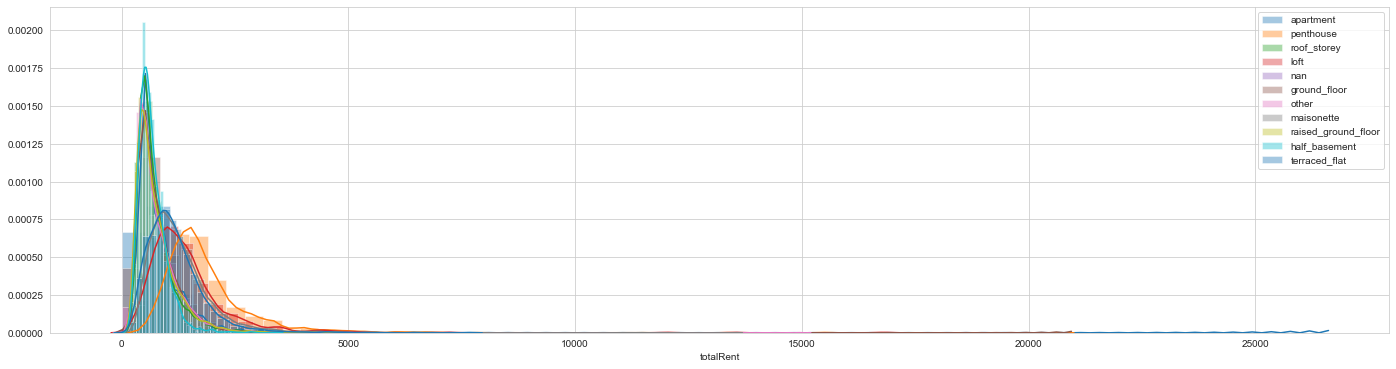

In [224]:
plt.figure(figsize = (24,6))
for i in df['typeOfFlat'].unique():
    sns.distplot(df[df['typeOfFlat'] == i]['totalRent'], label = i)
    plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


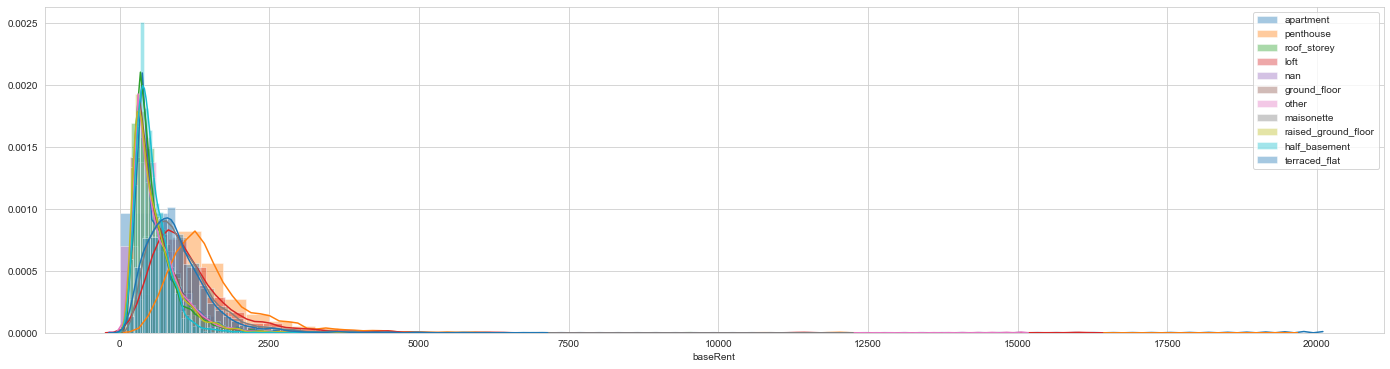

In [225]:
plt.figure(figsize = (24,6))
for i in df['typeOfFlat'].unique():
    sns.distplot(df[df['typeOfFlat'] == i]['baseRent'], label = i)
    plt.legend()

__I'm going to fill the null value in typeOfFlat feature with 'other'.__

In [226]:
df['typeOfFlat'].fillna(value = 'other', inplace = True)

In [227]:
df['floor'].isna().sum()

40267

In [228]:
df['floor'].value_counts()

 1.0     54733
 2.0     48777
 3.0     32433
 0.0     21121
 4.0     17271
 5.0      6876
 6.0      2070
 7.0       891
 8.0       494
 9.0       376
 10.0      318
-1.0       263
 11.0      209
 13.0      120
 12.0      119
 14.0       96
 15.0       59
 16.0       30
 17.0       25
 18.0       11
 19.0       11
 20.0        9
 21.0        9
 24.0        3
 26.0        2
 29.0        2
 22.0        2
 31.0        1
 41.0        1
 25.0        1
 32.0        1
 23.0        1
Name: floor, dtype: int64

__There are still many null values in the features and a few of it doesn't really make any sense. There are typeOfFlat that says 'ground_floor' but it's located in any other floor except 0. I looked for ground floor and first floor sayings in internet and found that in Germany, ground floor is 0. 1st floor is 1 level above ground floor. Raised ground floor in German is still on the ground level but slightly raised to allow apartment on half basement floor. So I decided to change every floor that says 'ground_floor' and 'raised_ground_floor' in the typeOfFlat feature to 0.__

In [229]:
df[df['typeOfFlat'] == 'ground_floor']['floor'].value_counts()

 0.0    11604
 1.0     3926
 2.0      262
 3.0      130
 4.0       33
 5.0       10
-1.0        9
 8.0        3
 7.0        2
 6.0        2
Name: floor, dtype: int64

In [230]:
df[df['typeOfFlat'] == 'raised_ground_floor']['floor'].value_counts()

0.0     1810
1.0     1245
2.0       78
3.0       15
4.0        9
5.0        4
6.0        1
11.0       1
Name: floor, dtype: int64

In [231]:
for i in df.index:
    if (df['typeOfFlat'][i] == 'ground_floor') | (df['typeOfFlat'][i] == 'raised_ground_floor'):
        df['floor'][i] = 0
    else:
        pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [232]:
df[df['typeOfFlat'] == 'ground_floor']['floor'].value_counts()

0.0    26905
Name: floor, dtype: int64

In [233]:
df[df['typeOfFlat'] == 'raised_ground_floor']['floor'].value_counts()

0.0    5030
Name: floor, dtype: int64

__In floor column with half_basement in typeOfFlat feature, there are still floors other than -1 (standart basement floor). So I decided to change all the values with half_basement type to -1.__

In [234]:
df[df['typeOfFlat'] == 'half_basement']['floor'].value_counts()

 0.0    415
-1.0    192
 1.0    120
 2.0      7
 3.0      5
Name: floor, dtype: int64

In [235]:
for i in df.index:
    if (df['typeOfFlat'][i] == 'half_basement'):
        df['floor'][i] = -1
    else:
        pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [236]:
df[df['typeOfFlat'] == 'half_basement']['floor'].value_counts()

-1.0    1755
Name: floor, dtype: int64

In [237]:
df[df['floor'] == -1]['typeOfFlat'].value_counts()

half_basement    1755
apartment          26
other              21
terraced_flat      11
maisonette          2
loft                1
roof_storey         1
Name: typeOfFlat, dtype: int64

__To remove all ambiguity, I decided to change all typeOfFlat feature with -1 floor to half_basement.__

In [238]:
for i in df.index:
    if (df['floor'][i] == -1):
        df['typeOfFlat'][i] = 'half_basement'
    else:
        pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [239]:
df[df['floor'] == -1]['typeOfFlat'].value_counts()

half_basement    1817
Name: typeOfFlat, dtype: int64

In [240]:
df['floor'].value_counts()

 1.0     49442
 2.0     48430
 0.0     39227
 3.0     32283
 4.0     17229
 5.0      6862
 6.0      2067
-1.0      1817
 7.0       889
 8.0       491
 9.0       376
 10.0      318
 11.0      208
 13.0      120
 12.0      119
 14.0       96
 15.0       59
 16.0       30
 17.0       25
 18.0       11
 19.0       11
 20.0        9
 21.0        9
 24.0        3
 26.0        2
 29.0        2
 22.0        2
 31.0        1
 41.0        1
 25.0        1
 32.0        1
 23.0        1
Name: floor, dtype: int64

In [241]:
df['numberOfFloors'].value_counts()

3.0     43910
4.0     35285
2.0     31413
5.0     17943
1.0      6517
6.0      5456
7.0      2109
0.0       928
8.0       881
11.0      841
10.0      490
9.0       438
14.0      217
12.0      154
16.0      150
13.0      148
15.0      105
17.0      101
18.0       69
20.0       55
19.0       51
23.0       27
22.0       24
21.0       15
40.0       10
26.0        7
27.0        6
24.0        5
31.0        5
33.0        4
36.0        3
34.0        3
30.0        3
28.0        2
42.0        2
25.0        2
32.0        2
45.0        2
41.0        1
29.0        1
54.0        1
43.0        1
Name: numberOfFloors, dtype: int64

__I decided to group the data based on usually used term:__
1. unknown
2. -1 / basement
3. 0 / ground floor
4. upper floor / middle floor
5. top floor

In [242]:
flr = []
for i in df.index:
    if pd.isna(df['floor'][i]):
        flr.append('unknown')
    elif (df['typeOfFlat'][i] == 'roof_storey') | (df['typeOfFlat'][i] == 'penthouse') | (df['typeOfFlat'][i] == 'loft'):
        flr.append('top_floor')
    elif (df['floor'][i] == df['numberOfFloors'][i]):
        flr.append('top_floor')
    elif (df['floor'][i] == -1) | (df['typeOfFlat'][i] == 'half_basement'):
        flr.append('basement')
    elif (df['floor'][i] == 0) | (df['typeOfFlat'][i] == 'raised_ground_floor') | (df['typeOfFlat'][i] == 'ground_floor'):
        flr.append('ground_floor')
    else:
        flr.append('upper_floor')

In [243]:
df['position'] = flr

In [244]:
df[['position', 'floor', 'typeOfFlat', 'numberOfFloors']]

position  floor   typeOfFlat  numberOfFloors
0       upper_floor    3.0    apartment             5.0
2         top_floor    7.0    apartment             7.0
3       upper_floor    2.0    apartment             4.0
4         top_floor    2.0    penthouse             2.0
6         top_floor    2.0  roof_storey             2.0
...             ...    ...          ...             ...
268843  upper_floor    2.0    apartment             3.0
268845    top_floor    4.0        other             4.0
268846    top_floor    2.0  roof_storey             2.0
268847    top_floor    1.0    apartment             1.0
268848  upper_floor    3.0    apartment             5.0

[226602 rows x 4 columns]

__Then I'll drop floor feature.__

In [245]:
df.drop('floor', axis = 1, inplace = True)

In [246]:
df['numberOfFloors'].value_counts()

3.0     43910
4.0     35285
2.0     31413
5.0     17943
1.0      6517
6.0      5456
7.0      2109
0.0       928
8.0       881
11.0      841
10.0      490
9.0       438
14.0      217
12.0      154
16.0      150
13.0      148
15.0      105
17.0      101
18.0       69
20.0       55
19.0       51
23.0       27
22.0       24
21.0       15
40.0       10
26.0        7
27.0        6
24.0        5
31.0        5
33.0        4
36.0        3
34.0        3
30.0        3
28.0        2
42.0        2
25.0        2
32.0        2
45.0        2
41.0        1
29.0        1
54.0        1
43.0        1
Name: numberOfFloors, dtype: int64

__I'll group the number of floors of the building to 3 categories that are usually used in architecture:__
1. low_rise --> 0-4 floors
2. mid_rise --> 5-11 floors
3. high_rise --> > 12 floors
4. unknown -- > null

In [247]:
build = []
for i in df.index:
    if pd.isna(df['numberOfFloors'][i]):
        build.append('unknown')
    elif df['numberOfFloors'][i] < 6:
        build.append('low_rise')
    elif df['numberOfFloors'][i] < 12:
        build.append('mid_rise')
    else:
        build.append('high_rise')

In [248]:
df['buildingType'] = build

__Then I'll drop the numberOfFloors feature because it's already explained by buildingType feature.__

In [249]:
df.drop('numberOfFloors', axis = 1, inplace = True)

In [250]:
count_null(df)

null_count  total_data  percentage
state                           0      226602    0.000000
serviceCharge                2446      226602    1.079426
heatingType                     0      226602    0.000000
telekomTvOffer                  0      226602    0.000000
newlyConst                      0      226602    0.000000
balcony                         0      226602    0.000000
pricetrend                   1587      226602    0.700347
telekomUploadSpeed              0      226602    0.000000
totalRent                       0      226602    0.000000
firingTypes                 48019      226602   21.190899
hasKitchen                      0      226602    0.000000
cellar                          0      226602    0.000000
yearConstructedRange            0      226602    0.000000
baseRent                        0      226602    0.000000
livingSpace                     0      226602    0.000000
petsAllowed                     0      226602    0.000000
lift                            0      226602    0.000000
baseRentRange                   0      226602    0.000000
typeOfFlat                      0      226602    0.000000
noRooms                         0      226602    0.000000
noRoomsRange                    0      226602    0.000000
garden                          0      226602    0.000000
livingSpaceRange                0      226602    0.000000
heatingCosts                 3561      226602    1.571478
energyEfficiencyClass           0      226602    0.000000
date                            0      226602    0.000000
goodCondition                   0      226602    0.000000
niceInterior                    0      226602    0.000000
parkSpace                       0      226602    0.000000
position                        0      226602    0.000000
buildingType                    0      226602    0.000000

In [251]:
df['pricetrend'].value_counts()

 0.00     9734
 3.33     1831
 3.23     1693
 3.85     1543
 0.19     1483
          ... 
 0.08        1
 10.61       1
 10.20       1
-2.68        1
 9.59        1
Name: pricetrend, Length: 1223, dtype: int64

In [252]:
df['date'].unique()

array(['Oct19', 'Feb20', 'May19', 'Sep18'], dtype=object)

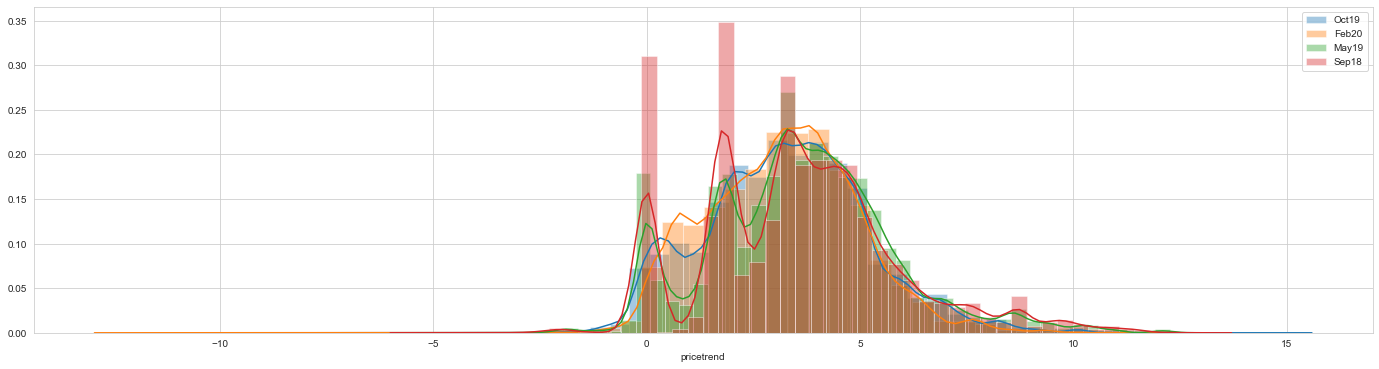

In [253]:
plt.figure(figsize = (24,6))
for i in df['date'].unique():
    sns.distplot(df[df['date'] == i]['pricetrend'], label = i)
    plt.legend()

__I'm going to change date to year.__

In [254]:
df['date'].replace({'Oct19' : '2019', 'May19' : '2019', 'Feb20' : '2020', 'Sep18' : '2018'}, inplace = True)
df.rename(columns = {'date' : 'year'}, inplace = True)

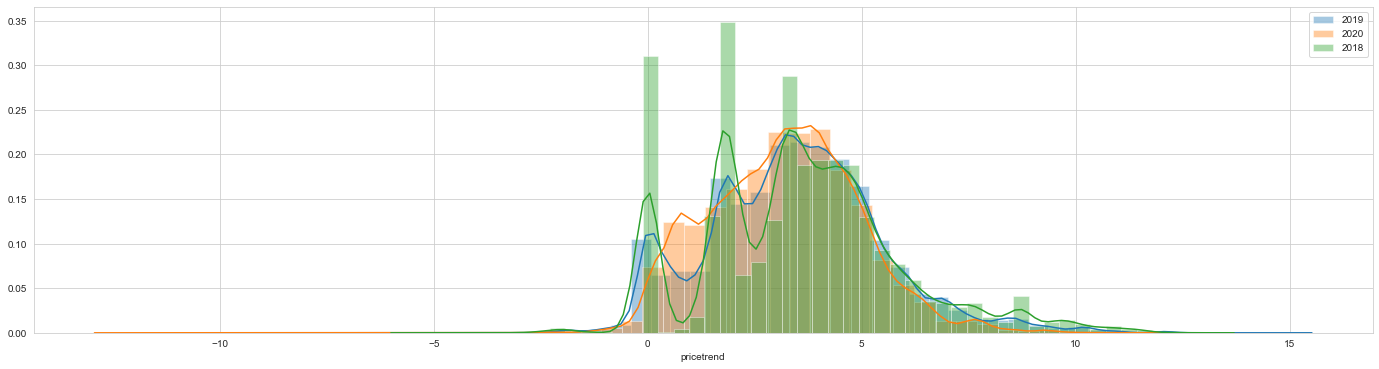

In [255]:
plt.figure(figsize = (24,6))
for i in df['year'].unique():
    sns.distplot(df[df['year'] == i]['pricetrend'], label = i)
    plt.legend()

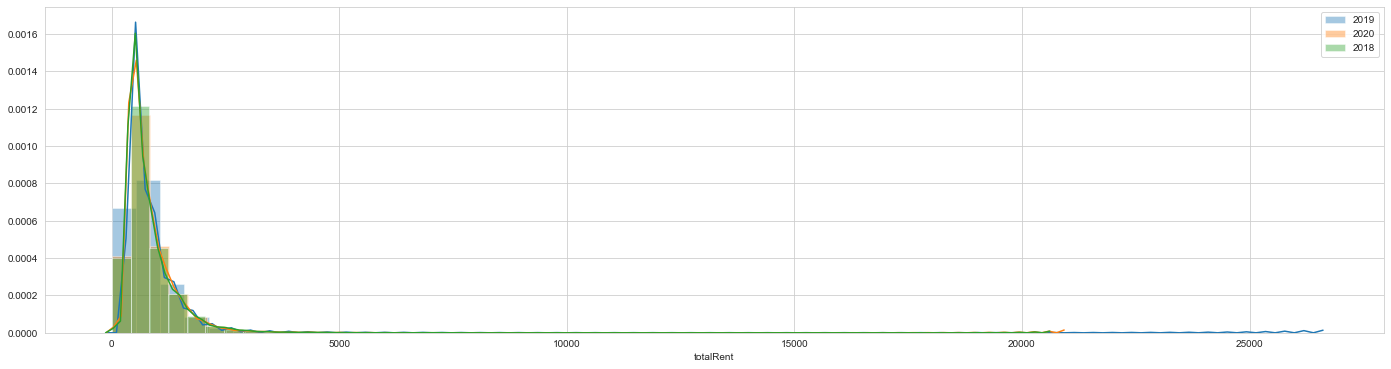

In [256]:
plt.figure(figsize = (24,6))
for i in df['year'].unique():
    sns.distplot(df[df['year'] == i]['totalRent'], label = i)
    plt.legend()

In [257]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [258]:
df['pricetrend'].isna().sum()

1587

In [259]:
x = df.copy()

In [260]:
x.dropna(subset = ['pricetrend'], inplace = True)

In [261]:
x.reset_index(drop = True, inplace = True)

In [262]:
len(x)

225015

In [263]:
print('Correlation Ratio for Year and Total Rent')
print('----------------------------------------------')
corr = correlation_ratio(x['year'], x['totalRent'])
print(corr)

Correlation Ratio for Year and Total Rent
----------------------------------------------
0.004997339486918557


In [264]:
print('Correlation Ratio for Year and pricetrend')
print('----------------------------------------------')
corr = correlation_ratio(x['year'], x['pricetrend'])
print(corr)

Correlation Ratio for Year and pricetrend
----------------------------------------------
0.07297199274210342


In [265]:
temp = []
for val in x['year'].unique():
    temp.append(x[x['year'] == val]['totalRent'])
print(levene(*temp))

LeveneResult(statistic=6.618588559923238, pvalue=0.0013355743085796195)


In [266]:
temp = []
for val in df['year'].unique():
    temp.append(x[x['year'] == val]['totalRent'])
print(kruskal(*temp))

KruskalResult(statistic=19.73689998367806, pvalue=5.178293040641761e-05)


In [267]:
temp = []
for val in x['year'].unique():
    temp.append(x[x['year'] == val]['pricetrend'])
print(levene(*temp))

LeveneResult(statistic=974.6455310488166, pvalue=0.0)


In [268]:
temp = []
for val in df['year'].unique():
    temp.append(x[x['year'] == val]['pricetrend'])
print(kruskal(*temp))

KruskalResult(statistic=863.6297111964469, pvalue=2.918710428503882e-188)


In [269]:
print('2018 & 2019')
if mannwhitneyu(x[x['year'] == '2018']['totalRent'], x[x['year'] == '2019']['totalRent'])[1] < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')
print('\n')
print('2018 & 2020')
if mannwhitneyu(x[x['year'] == '2018']['totalRent'], x[x['year'] == '2020']['totalRent'])[1] < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')
print('\n')
print('2019 & 2020')
if mannwhitneyu(x[x['year'] == '2019']['totalRent'], x[x['year'] == '2020']['totalRent'])[1] < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

2018 & 2019
Reject Null Hypothesis


2018 & 2020
Reject Null Hypothesis


2019 & 2020
Reject Null Hypothesis


In [270]:
print('2018 & 2019')
if mannwhitneyu(x[x['year'] == '2018']['pricetrend'], x[x['year'] == '2019']['pricetrend'])[1] < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')
print('\n')
print('2018 & 2020')
if mannwhitneyu(x[x['year'] == '2018']['pricetrend'], x[x['year'] == '2020']['pricetrend'])[1] < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')
print('\n')
print('2019 & 2020')
if mannwhitneyu(x[x['year'] == '2019']['pricetrend'], x[x['year'] == '2020']['pricetrend'])[1] < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

2018 & 2019
Reject Null Hypothesis


2018 & 2020
Reject Null Hypothesis


2019 & 2020
Reject Null Hypothesis


__There's difference between totalRent and pricetrend datas between year 2018, 2019, and 2020.__

In [271]:
temp = []
for val in df['state'].unique():
    temp.append(x[x['state'] == val]['totalRent'])
print(levene(*temp))

LeveneResult(statistic=1273.6500347292401, pvalue=0.0)


In [272]:
temp = []
for val in df['state'].unique():
    temp.append(x[x['state'] == val]['totalRent'])
print(kruskal(*temp))

KruskalResult(statistic=70711.38049888775, pvalue=0.0)


__There's so many firingTypes categories in the feature. I decided to minimize unique value by grouping it and fill the null values with 'unknown'.__

In [273]:
df['firingTypes'].value_counts()

gas                                                                        92836
district_heating                                                           42541
oil                                                                        15090
natural_gas_light                                                           8686
electricity                                                                 3853
                                                                           ...  
district_heating:local_heating:combined_heat_and_power_renewable_energy        1
solar_heating:pellet_heating:gas                                               1
natural_gas_light:wood                                                         1
solar_heating:gas:electricity:coal:coal_coke:local_heating                     1
local_heating:combined_heat_and_power_fossil_fuels                             1
Name: firingTypes, Length: 119, dtype: int64

In [274]:
x = []
for i in df.index:
    if pd.isna(df['firingTypes'][i]):
        x.append('unknown')
    else:
        x.append(df['firingTypes'][i].split(':')[0])

In [275]:
new = []
for i in x:
    if (i == 'coal') or (i == 'coal_coke'):
        new.append('coal')
    elif (i == 'combined_heat_and_power_bio_energy') or (i == 'combined_heat_and_power_fossil_fuels') or (i == 'combined_heat_and_power_regenerative_energy') or (i == 'combined_heat_and_power_renewable_energy'):
        new.append('combined_heat_and_power')
    elif (i == 'natural_gas_heavy') or (i == 'natural_gas_light'):
        new.append('gas')
    elif i == 'wood_chips':
        new.append('wood')
    elif i == 'liquid_gas':
        new.append('gas')
    elif i == 'steam_district_heating':
        new.append('district_heating')
    else:
        new.append(i)

In [276]:
df['firingTypes'] = new

In [277]:
count_null(df)

null_count  total_data  percentage
state                           0      226602    0.000000
serviceCharge                2446      226602    1.079426
heatingType                     0      226602    0.000000
telekomTvOffer                  0      226602    0.000000
newlyConst                      0      226602    0.000000
balcony                         0      226602    0.000000
pricetrend                   1587      226602    0.700347
telekomUploadSpeed              0      226602    0.000000
totalRent                       0      226602    0.000000
firingTypes                     0      226602    0.000000
hasKitchen                      0      226602    0.000000
cellar                          0      226602    0.000000
yearConstructedRange            0      226602    0.000000
baseRent                        0      226602    0.000000
livingSpace                     0      226602    0.000000
petsAllowed                     0      226602    0.000000
lift                            0      226602    0.000000
baseRentRange                   0      226602    0.000000
typeOfFlat                      0      226602    0.000000
noRooms                         0      226602    0.000000
noRoomsRange                    0      226602    0.000000
garden                          0      226602    0.000000
livingSpaceRange                0      226602    0.000000
heatingCosts                 3561      226602    1.571478
energyEfficiencyClass           0      226602    0.000000
year                            0      226602    0.000000
goodCondition                   0      226602    0.000000
niceInterior                    0      226602    0.000000
parkSpace                       0      226602    0.000000
position                        0      226602    0.000000
buildingType                    0      226602    0.000000

In [278]:
df['noRooms'].value_counts()

3.00      76373
2.00      76339
1.00      23886
4.00      23077
2.50       8198
3.50       7458
5.00       4667
1.50       2974
4.50       1664
6.00       1064
5.50        275
7.00        265
8.00        100
2.10         67
6.50         50
2.20         31
9.00         25
10.00        16
7.50         15
11.00         8
15.00         5
1.10          5
12.00         5
23.00         2
13.00         2
3.10          2
8.50          2
140.00        1
14.00         1
560.00        1
80.00         1
25.00         1
100.00        1
65.00         1
2.30          1
2.65          1
18.00         1
99.50         1
200.00        1
2.70          1
4.20          1
50.00         1
2.90          1
30.00         1
1.20          1
221.00        1
79.00         1
3.40          1
16.00         1
230.00        1
22.00         1
3.80          1
21.00         1
1.25          1
Name: noRooms, dtype: int64

__There are number of rooms with decimal other than .5 which is not possible. In Germany, .5 is used to indicate the availability of a den which is an extra room that is usually used as storage or working/study room.__

In [279]:
idx = []
for i in df.index:
    if (df['noRooms'][i] % 0.5) != 0:
        idx.append(i)

In [280]:
df.loc[idx]['noRooms'].value_counts()

2.10    67
2.20    31
1.10     5
3.10     2
3.80     1
2.30     1
3.40     1
4.20     1
2.90     1
2.65     1
1.20     1
2.70     1
1.25     1
Name: noRooms, dtype: int64

In [281]:
df.drop(idx, inplace = True)

In [282]:
df['noRooms'].value_counts()

3.0      76373
2.0      76339
1.0      23886
4.0      23077
2.5       8198
3.5       7458
5.0       4667
1.5       2974
4.5       1664
6.0       1064
5.5        275
7.0        265
8.0        100
6.5         50
9.0         25
10.0        16
7.5         15
11.0         8
15.0         5
12.0         5
23.0         2
8.5          2
13.0         2
221.0        1
80.0         1
21.0         1
25.0         1
65.0         1
18.0         1
22.0         1
99.5         1
100.0        1
560.0        1
30.0         1
14.0         1
140.0        1
230.0        1
16.0         1
50.0         1
79.0         1
200.0        1
Name: noRooms, dtype: int64

__I checked the noRooms value in the website and it shows that many property list their total number of rooms in the building, not the one being rented. So I decided to remove any extreme number of rooms value (more than 25 because I found the maximum rooms avaiable in the website is 23 rooms).__

In [283]:
df.drop(df[df['noRooms'] > 25].index, inplace = True)

__NoRoomsRange is like a floor version of noRooms. We're not going to need that so I'll drop the feature.__

In [284]:
df.drop('noRoomsRange', axis = 1, inplace = True)

__There's also livingSpaceRange which is the binned version of livingSpace. livingSpace is measured by m2 and I think it's better to actually see the space the property has. So I also decided to drop livingSpaceRange feature.__

In [285]:
df.drop('livingSpaceRange', axis = 1, inplace = True)

__NewlyConst feature is a feature explaining if the building is built within 3 years (from 2017). I think it's not really needed because there's already yearConstructedRange and goodCondition feature explaining. the construction condition of the building.__

In [286]:
df.drop('newlyConst', axis = 1, inplace = True)

In [287]:
df.describe(exclude = 'number').T

count unique              top    freq
state                  226476     16          Sachsen   51753
heatingType            226476     14  central_heating  108845
telekomTvOffer         226476      3    ONE_YEAR_FREE  192085
balcony                226476      2             True  140155
telekomUploadSpeed     226476      8             40.0  134231
firingTypes            226476     17              gas  106998
hasKitchen             226476      2            False  147244
cellar                 226476      2             True  146641
yearConstructedRange   226476      9          unknown   48917
petsAllowed            226476      4          unknown   94599
lift                   226476      2            False  172534
typeOfFlat             226476     10        apartment  110098
garden                 226476      2            False  180645
energyEfficiencyClass  226476     10   NO_INFORMATION   92471
year                   226476      3             2019  120371
goodCondition          226476      2             True  223512
niceInterior           226476      2            False  163404
parkSpace              226476      2            False  152728
position               226476      5      upper_floor  111457
buildingType           226476      4         low_rise  135979

In [288]:
df.describe()

serviceCharge     pricetrend      totalRent       baseRent  \
count  224030.000000  224890.000000  226476.000000  226476.000000   
mean      149.631074       3.394368     815.890662     643.962054   
std       107.219131       2.001086     567.819341     500.784571   
min         0.000000     -12.330000       5.900000       1.000000   
25%        95.000000       1.960000     470.000000     335.000000   
50%       135.000000       3.390000     650.000000     490.000000   
75%       189.390000       4.600000     986.000000     796.000000   
max     20392.000000      14.920000   26500.000000   20000.000000   

         livingSpace  baseRentRange        noRooms   heatingCosts  
count  226476.000000  226476.000000  226476.000000  222915.000000  
mean       72.811339       3.749938       2.612528      22.220250  
std        31.520868       2.214771       0.983341      41.676751  
min         0.000000       1.000000       1.000000       0.000000  
25%        54.000000       2.000000       2.000000       0.000000  
50%        67.000000       3.000000       3.000000       0.000000  
75%        86.000000       5.000000       3.000000      44.000000  
max      1000.000000       9.000000      25.000000    3000.000000

In [290]:
num_col = df.drop('totalRent', axis = 1).describe().columns
cat_col = df.describe(exclude = 'number').columns

In [291]:
num_col

Index(['serviceCharge', 'pricetrend', 'baseRent', 'livingSpace',
       'baseRentRange', 'noRooms', 'heatingCosts'],
      dtype='object')

In [292]:
x = df.copy()
x.dropna(subset = ['pricetrend', 'serviceCharge', 'heatingCosts'], inplace = True)
x.reset_index(drop = True, inplace = True)

In [293]:
shapiro(x['totalRent'])[1]

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [294]:
for i in num_col:
    print(i)
    print('-----------------------')
    print(shapiro(x[i])[1])
    print('\n')

serviceCharge
-----------------------
0.0


pricetrend
-----------------------
0.0


baseRent
-----------------------
0.0


livingSpace
-----------------------
0.0


baseRentRange
-----------------------
0.0


noRooms
-----------------------
0.0


heatingCosts
-----------------------
0.0




__All numerical data don't follow normal distribution.__

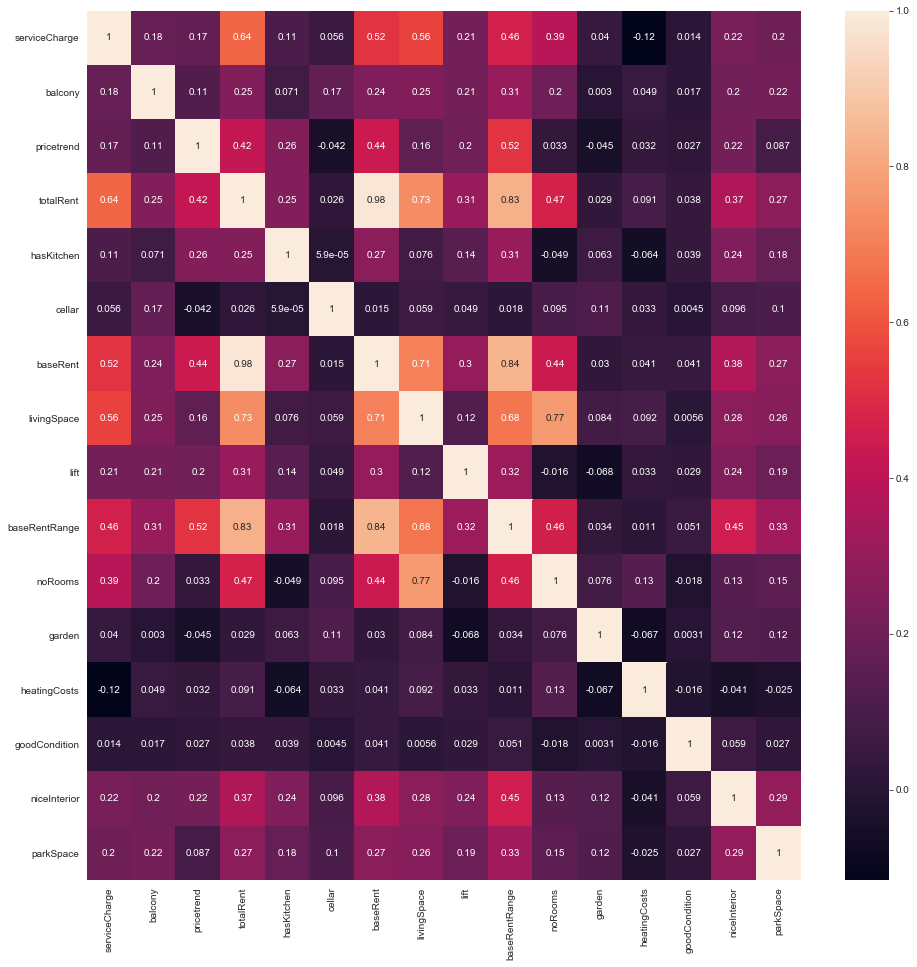

In [295]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True)

__Has more significant Correlation:__
- serviceCharge <---> totalRent, livingSpace, baseRent, baseRentRange, noRooms
- pricetrend <---> baseRentRange, baseRent, totalRent
- baseRent <---> totalRent, baseRentRange, livingSpace, serviceCharge, pricetrend, noRooms
- livingSpace <---> noRooms, totalRent, baseRent, baseRentRange, serviceCharge
- baseRentRange <---> baseRent, totalRent, livingSpace, pricetrend, serviceCharge, noRooms, niceInterior
- noRooms <---> livingSpace, totalRent, baseRent, serviceCharge

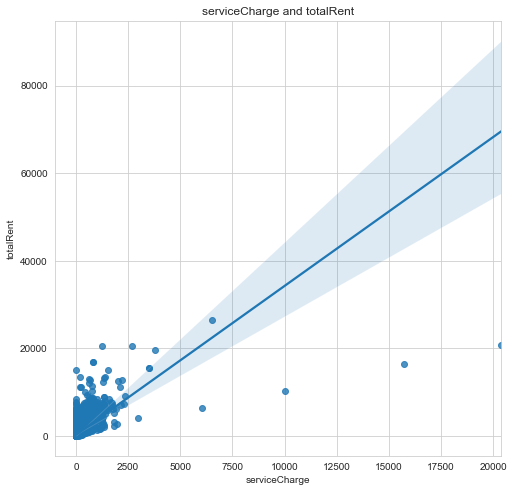

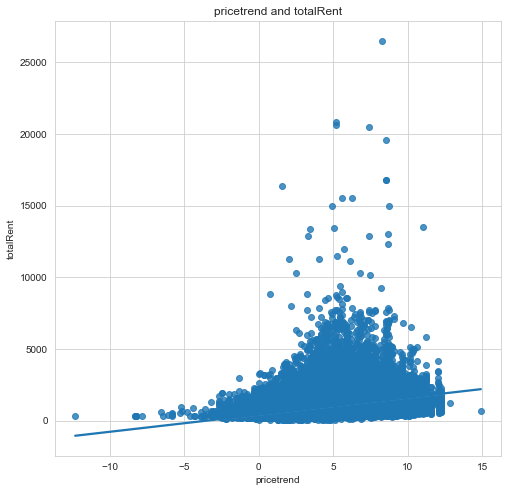

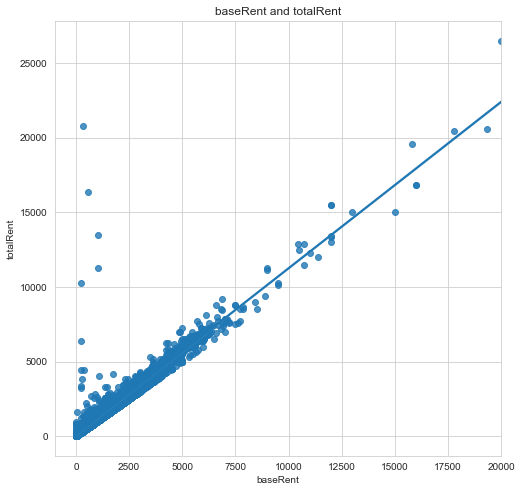

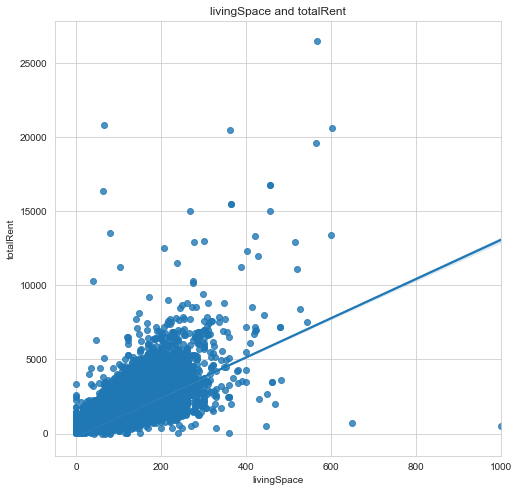

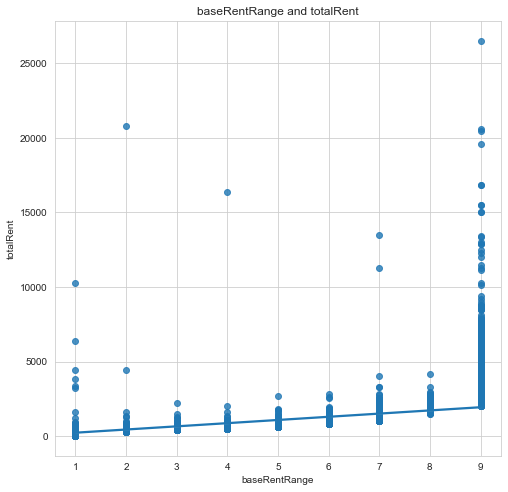

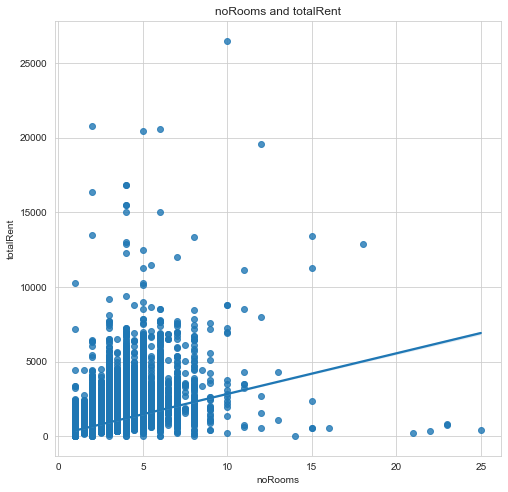

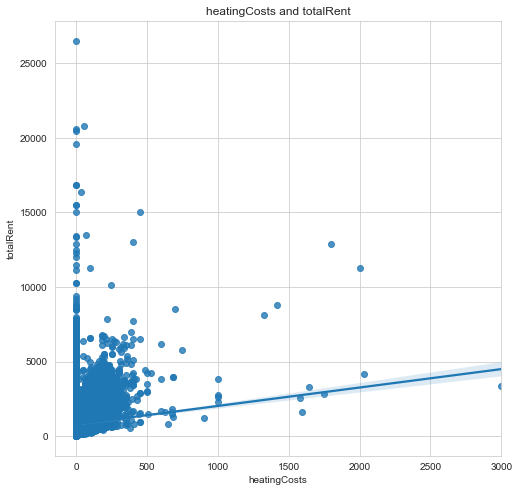

In [296]:
for i in num_col:
    plt.figure(figsize = (8,8))
    plt.title('{} and totalRent'.format(i))
    sns.regplot(data = df, x = i, y = 'totalRent')
    plt.show()

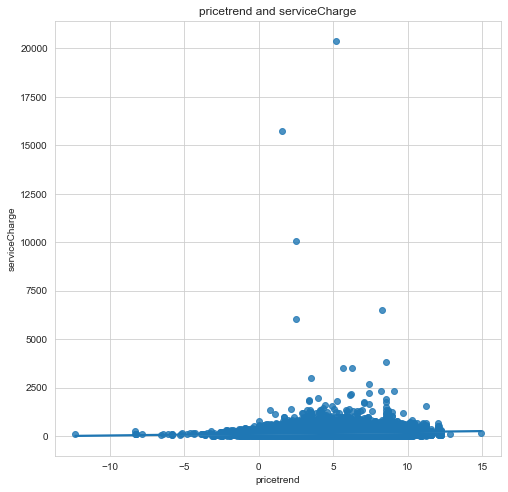

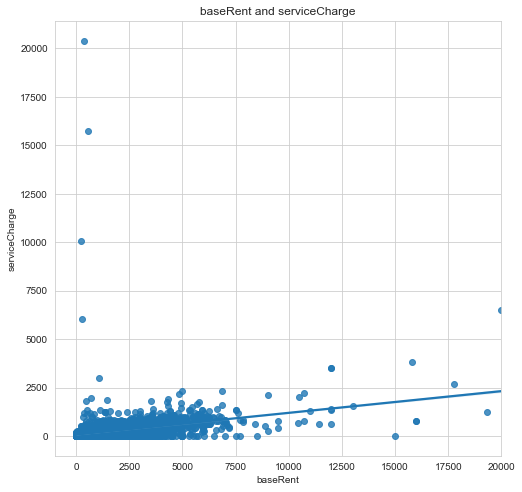

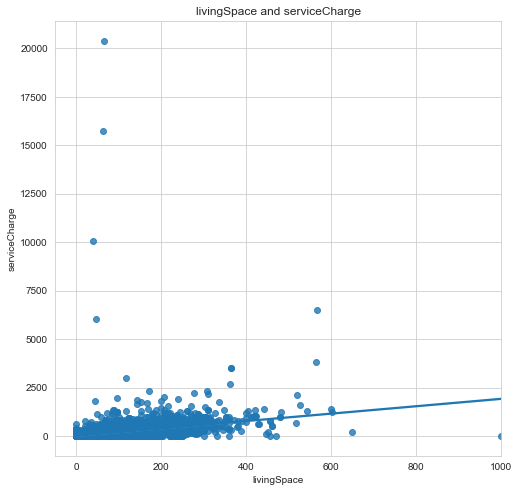

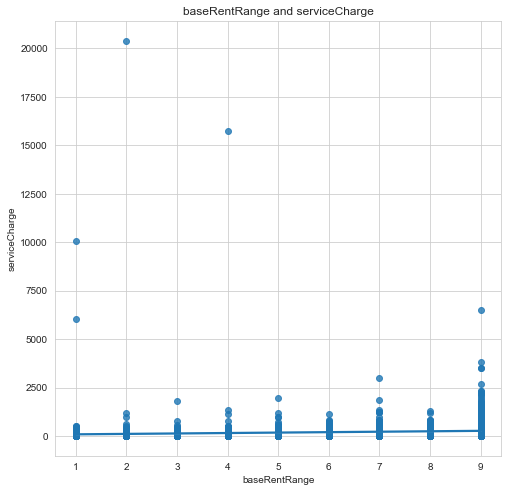

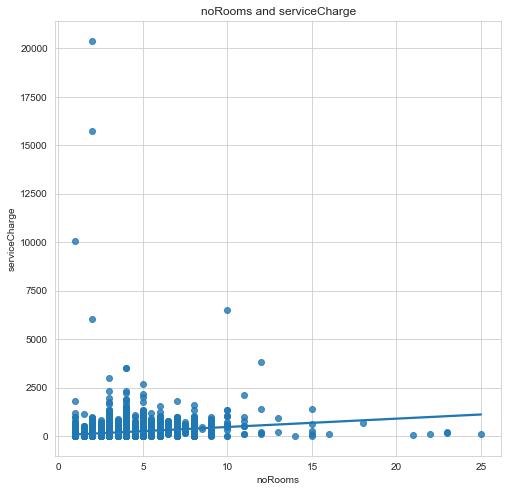

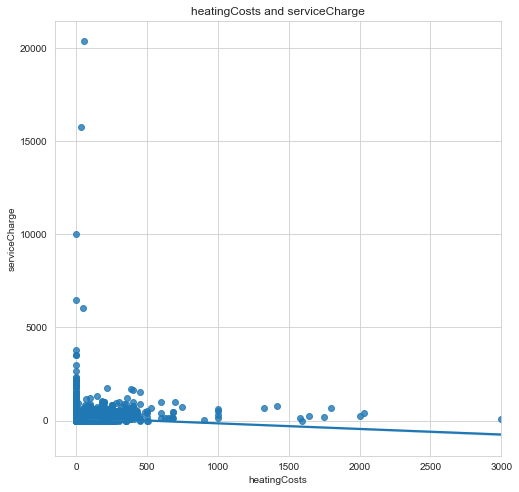

In [297]:
for i in df.drop(['totalRent', 'serviceCharge'], axis = 1).describe().columns:
    plt.figure(figsize = (8,8))
    plt.title('{} and serviceCharge'.format(i))
    sns.regplot(data = df, x = i, y = 'serviceCharge')
    plt.show()

__From the scatterplots above, we can see the number of totalRent based on other numerical features.__
- The higher the serviceCharge value should lead to higher totalRent and baseRent. But there's still possibilities that the baseRent aren't that expensive so that it affect the totalRent. There's 0 value in serviceCharge but high totalRent and totalRent. It's because either the owner didn't put it online and not noted well by the web or the baseRent is already warm.
- The higher the pricetrend doesn't always leads to higher totalRent and baseRent. There's some properties with already expensive rent price that are not really affected by pricetrend. ServiceCharge is also not really affected by pricetrend.
- TotalRent is calculated based on baseRent. So the baseRent itself should be the minimum totalRent that is offered. There's outliers with low baseRent but really high totalRent. It may be caused by high serviceCharge and heatingCosts.
- The bigger the livingSpace should have more expensive totalRent and baseRent price as usually property price is calculated by m2. Bigger livingSpace also indicates higher serviceCharge. But there's outliers with small livingSpace but really high serviceCharge.
- NoRoooms in a property should indicates bigger living space that affect totalRent, baseRent, and serviceCharge. But there's still property that has big livingSpace but only has a few rooms and it would be expensive as only 1/2 person living in a such big place. Number of rooms doesn't always indicated higher price but it usually how it is.
- Higher heatingCosts should indicates higher totalRent.

In [298]:
num_col = df.describe().columns
cat_col = df.describe(exclude = 'number').columns

In [299]:
cr = []
for i in cat_col:
    for j in num_col:
        print('Correlation Ratio for {} and {}'.format(i, j))
        print('----------------------------------------------')
        corr = correlation_ratio(x[i], x[j])
        if corr > 0.3:
            cr.append([i, j, corr])
        print(corr)
        print('\n')

Correlation Ratio for state and serviceCharge
----------------------------------------------
0.2056283426511254


Correlation Ratio for state and pricetrend
----------------------------------------------
0.6895052938080466


Correlation Ratio for state and totalRent
----------------------------------------------
0.4623228621629224


Correlation Ratio for state and baseRent
----------------------------------------------
0.4845188746032548


Correlation Ratio for state and livingSpace
----------------------------------------------
0.20720052259432872


Correlation Ratio for state and baseRentRange
----------------------------------------------
0.5778536613630233


Correlation Ratio for state and noRooms
----------------------------------------------
0.10587003076567576


Correlation Ratio for state and heatingCosts
----------------------------------------------
0.19142594631157642


Correlation Ratio for heatingType and serviceCharge
----------------------------------------------
0.18845

0.1065351083799176


Correlation Ratio for yearConstructedRange and heatingCosts
----------------------------------------------
0.1428274542576457


Correlation Ratio for petsAllowed and serviceCharge
----------------------------------------------
0.014927612998251332


Correlation Ratio for petsAllowed and pricetrend
----------------------------------------------
0.1675924670311635


Correlation Ratio for petsAllowed and totalRent
----------------------------------------------
0.08426539178433946


Correlation Ratio for petsAllowed and baseRent
----------------------------------------------
0.1002585603883515


Correlation Ratio for petsAllowed and livingSpace
----------------------------------------------
0.04196153563517406


Correlation Ratio for petsAllowed and baseRentRange
----------------------------------------------
0.17462025970134318


Correlation Ratio for petsAllowed and noRooms
----------------------------------------------
0.051231088653950874


Correlation Ratio for pe

0.01969654687267221


Correlation Ratio for position and totalRent
----------------------------------------------
0.06627109923839651


Correlation Ratio for position and baseRent
----------------------------------------------
0.06699341612358498


Correlation Ratio for position and livingSpace
----------------------------------------------
0.09968766827320924


Correlation Ratio for position and baseRentRange
----------------------------------------------
0.06910171664554728


Correlation Ratio for position and noRooms
----------------------------------------------
0.08143513761778429


Correlation Ratio for position and heatingCosts
----------------------------------------------
0.05182196012149732


Correlation Ratio for buildingType and serviceCharge
----------------------------------------------
0.07058888357046181


Correlation Ratio for buildingType and pricetrend
----------------------------------------------
0.10956427192115821


Correlation Ratio for buildingType and totalRen

In [300]:
cr

[['state', 'pricetrend', 0.6895052938080466],
 ['state', 'totalRent', 0.4623228621629224],
 ['state', 'baseRent', 0.4845188746032548],
 ['state', 'baseRentRange', 0.5778536613630233],
 ['heatingType', 'baseRentRange', 0.3225567945235574],
 ['balcony', 'baseRentRange', 0.3060736405450831],
 ['hasKitchen', 'baseRentRange', 0.30597533756292217],
 ['yearConstructedRange', 'totalRent', 0.3703854709884566],
 ['yearConstructedRange', 'baseRent', 0.3748841736312903],
 ['yearConstructedRange', 'baseRentRange', 0.4342740965492536],
 ['lift', 'totalRent', 0.306206337002321],
 ['lift', 'baseRentRange', 0.31548266132643377],
 ['typeOfFlat', 'livingSpace', 0.3044095312580533],
 ['energyEfficiencyClass', 'baseRentRange', 0.307285335146681],
 ['niceInterior', 'totalRent', 0.3726938833465311],
 ['niceInterior', 'baseRent', 0.3773907511678125],
 ['niceInterior', 'baseRentRange', 0.4537238543363805],
 ['parkSpace', 'baseRentRange', 0.3336807578629095]]

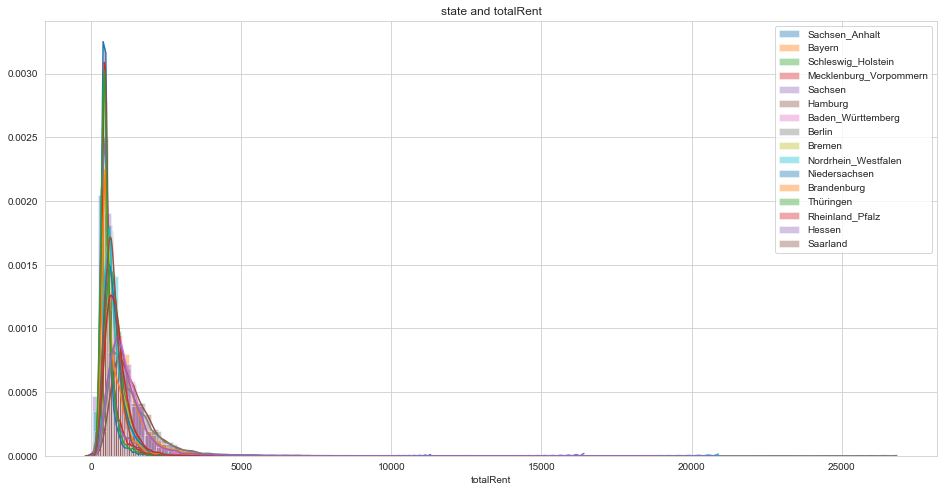

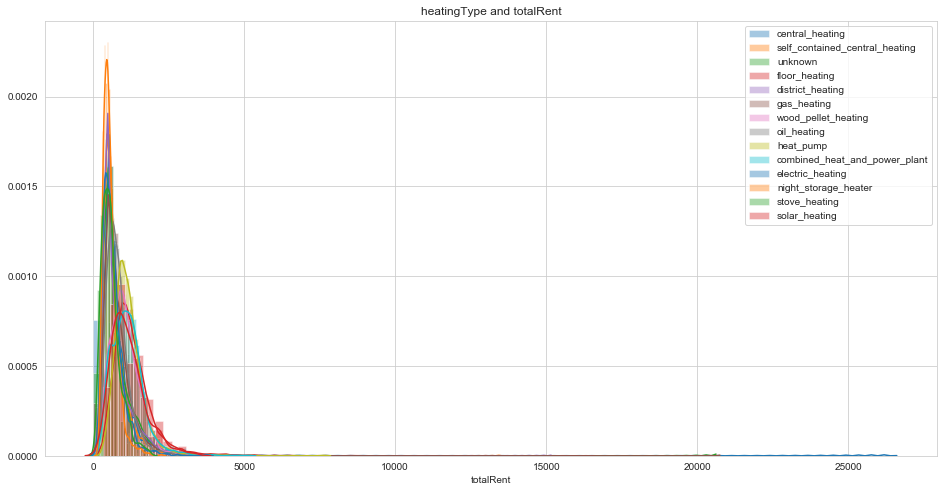

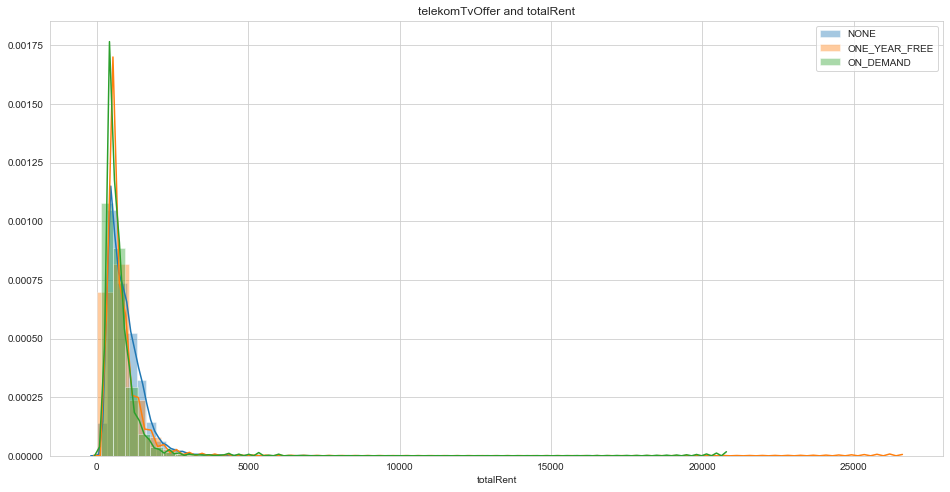

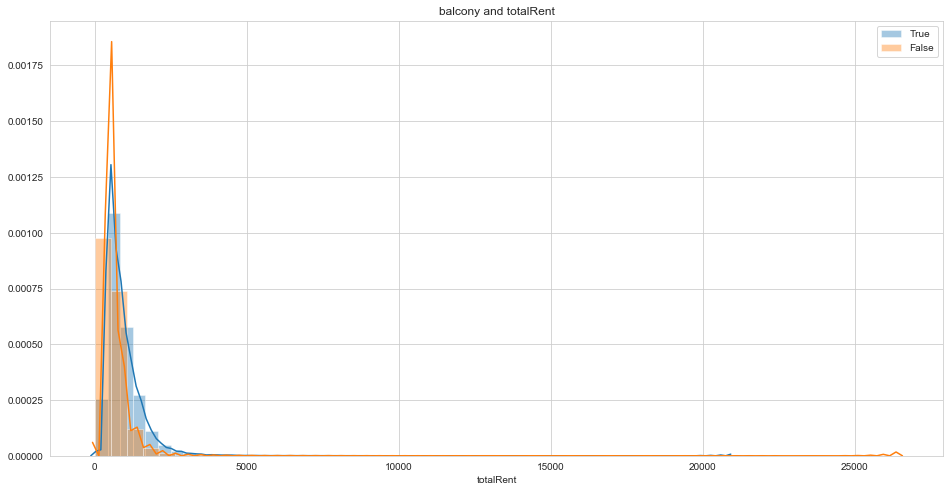

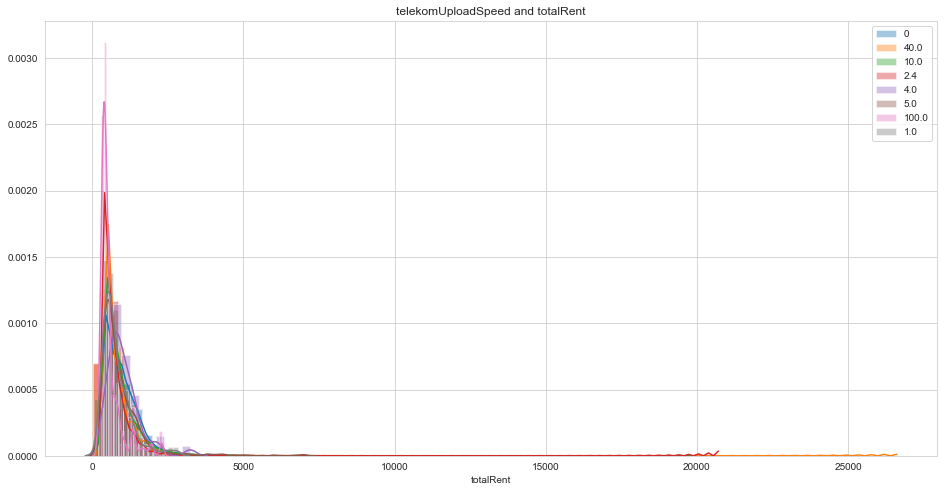

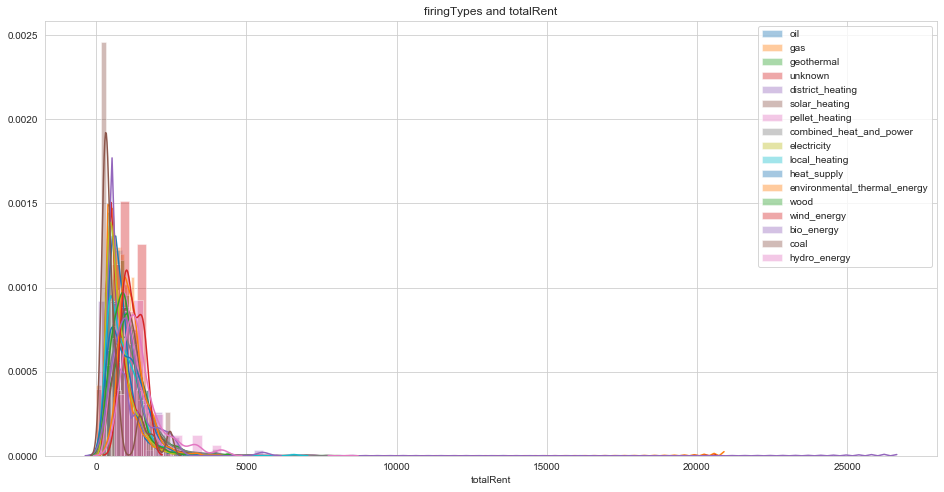

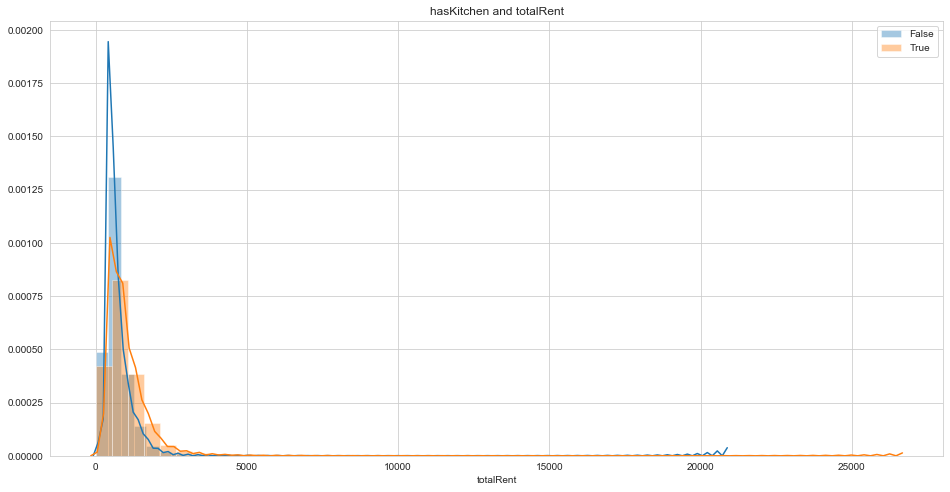

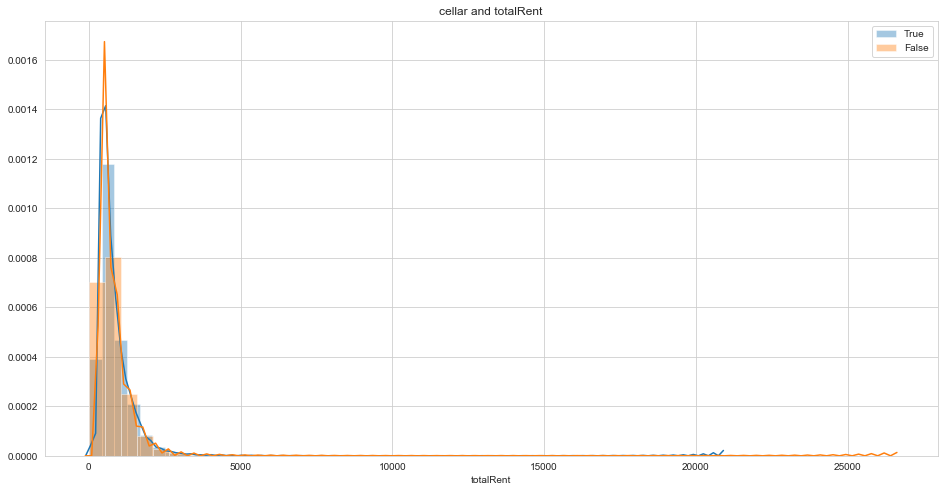

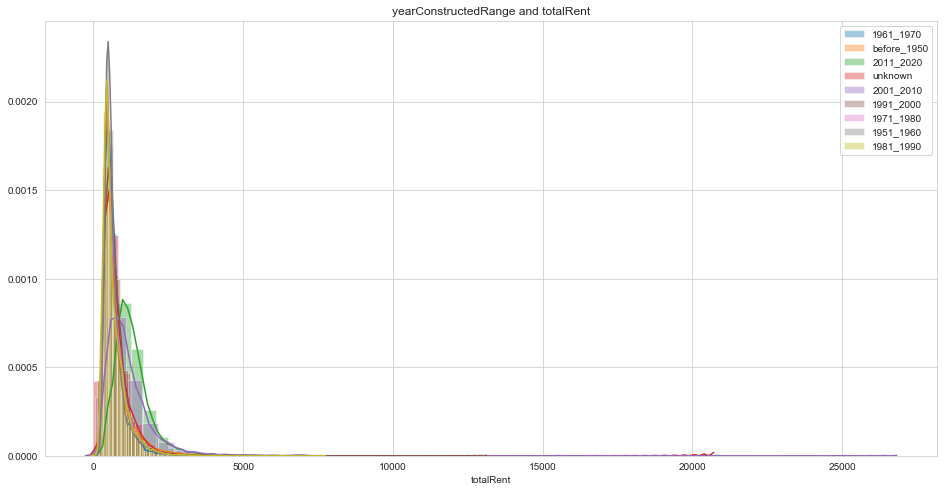

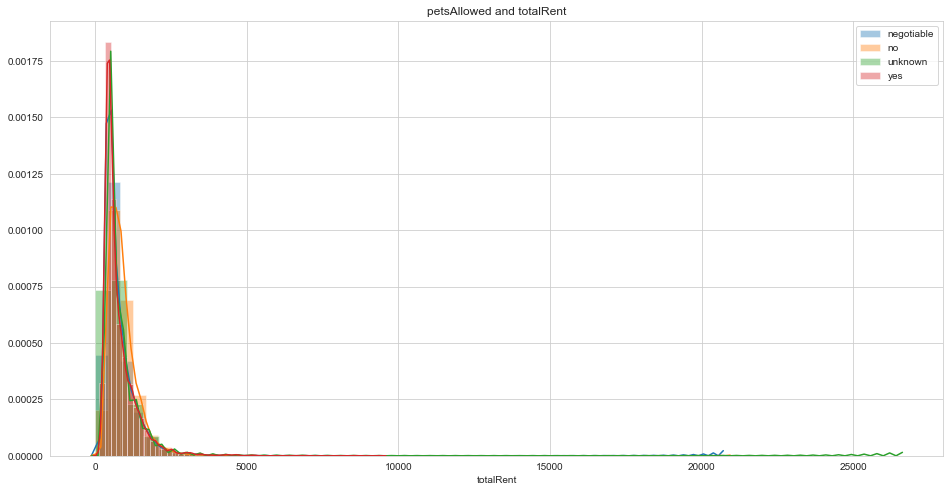

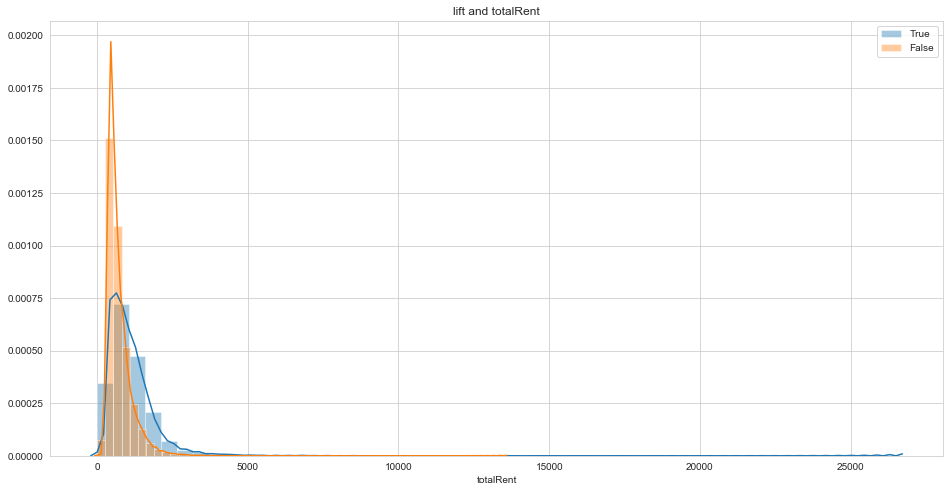

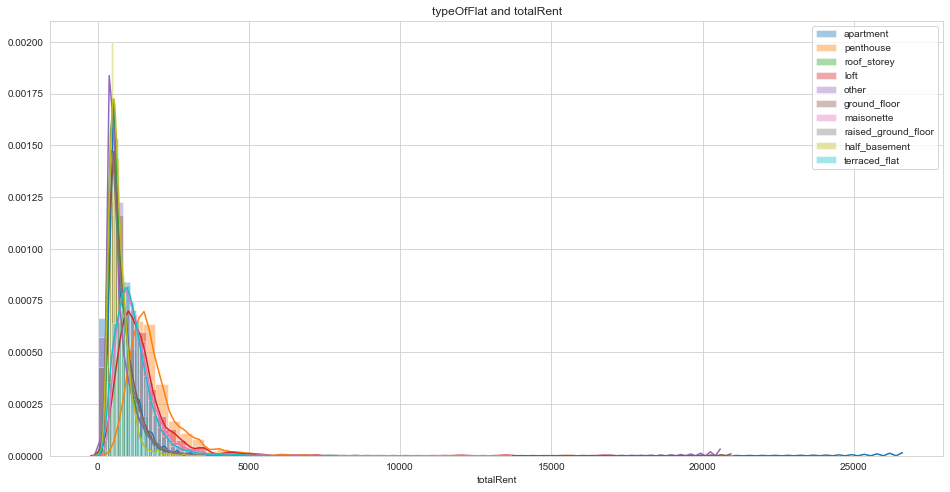

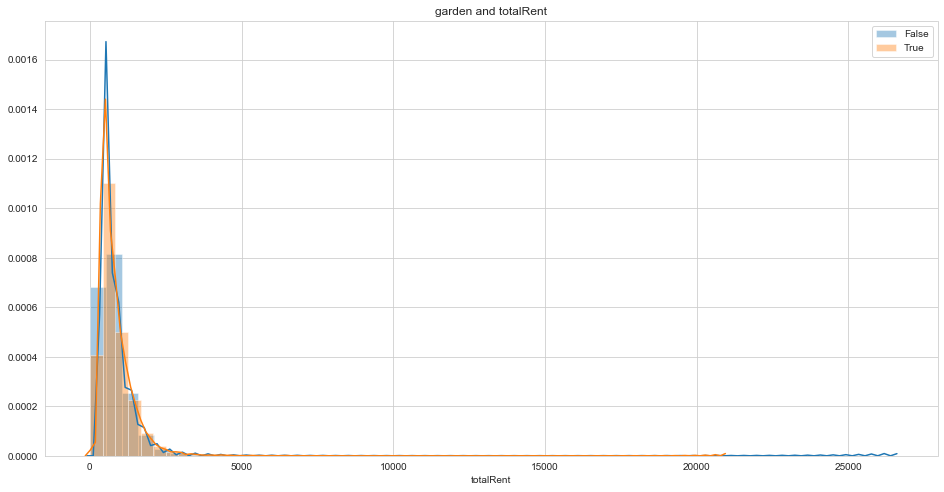

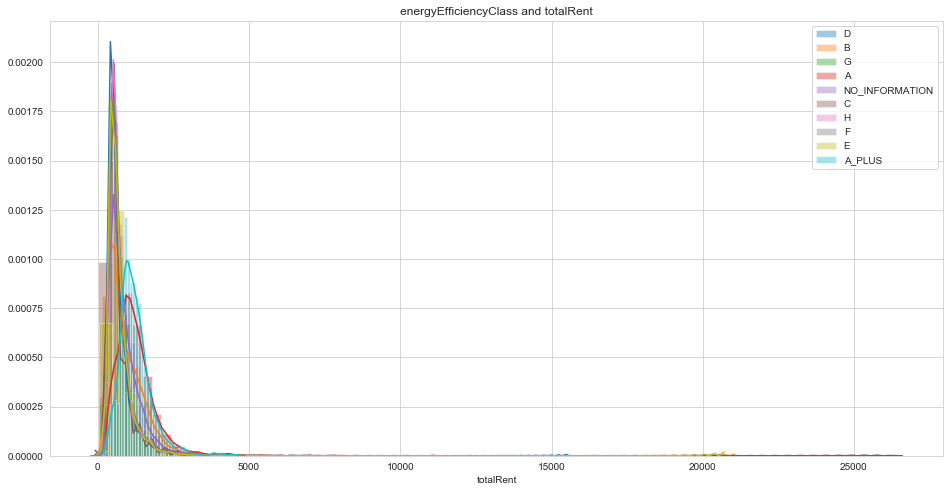

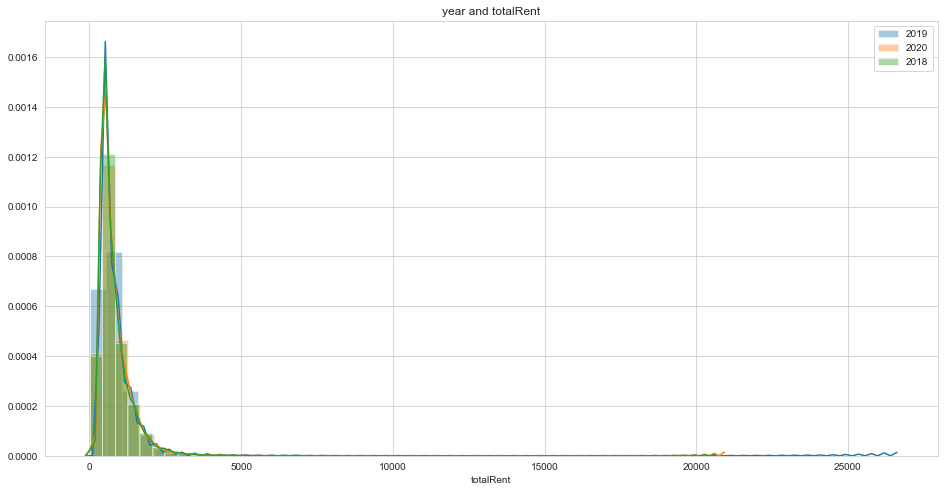

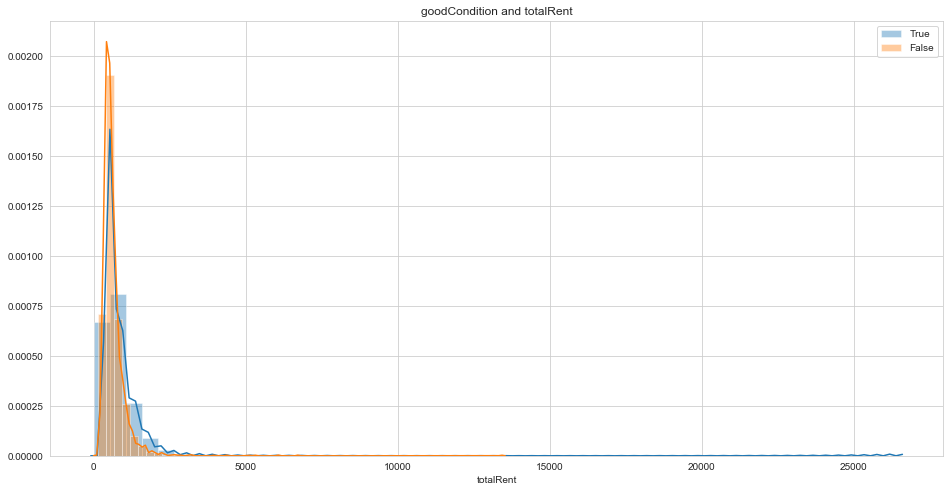

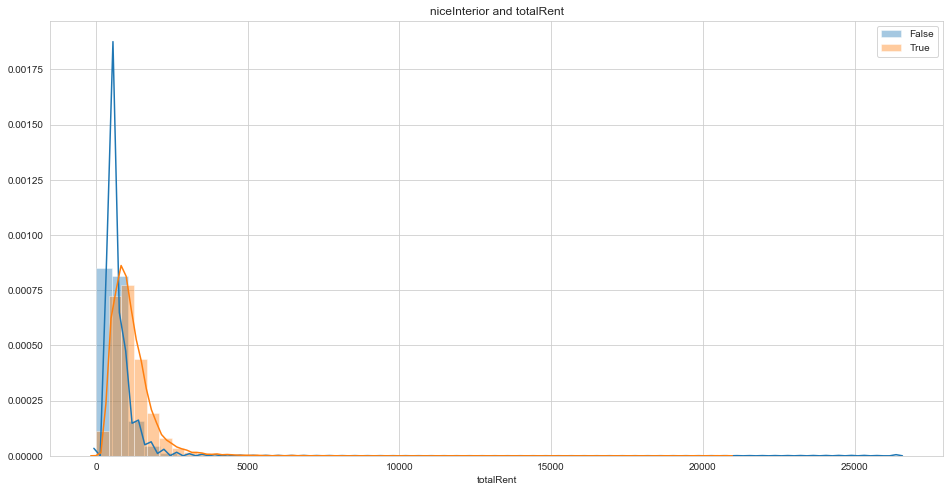

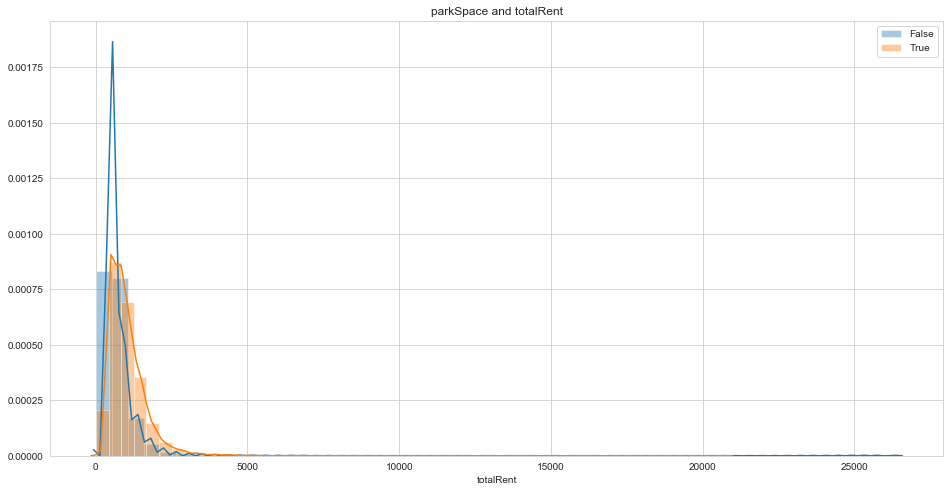

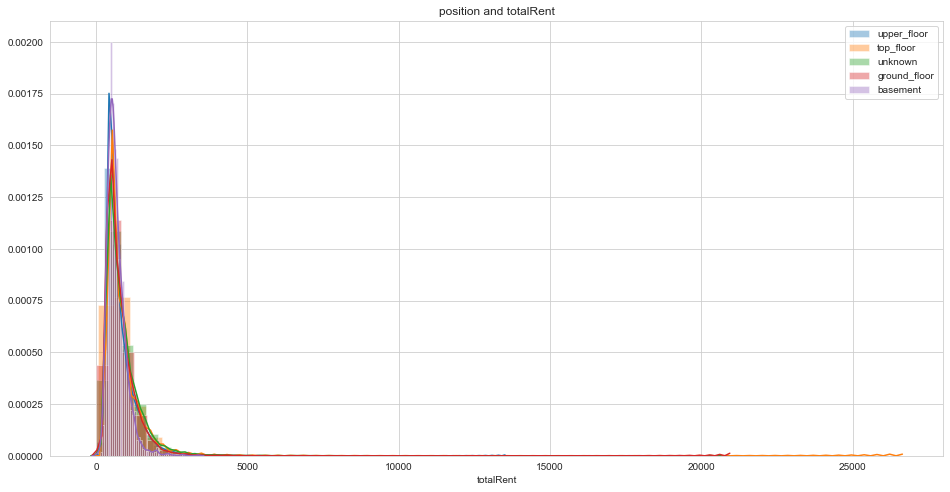

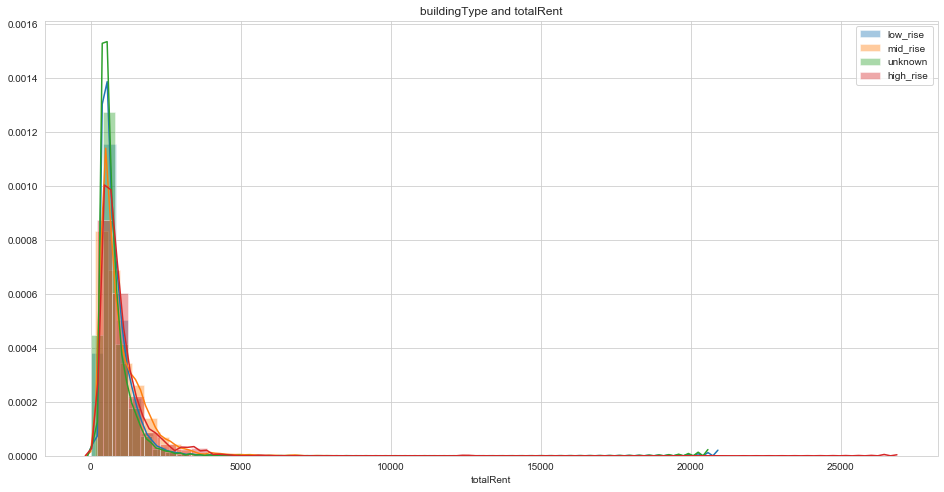

In [301]:
for i in cat_col:
    plt.figure(figsize = (16,8))
    plt.title('{} and totalRent'.format(i))
    for j in df[i].unique():
        sns.distplot(df[df[i] == j]['totalRent'], label = j)
        plt.legend()
    plt.show()

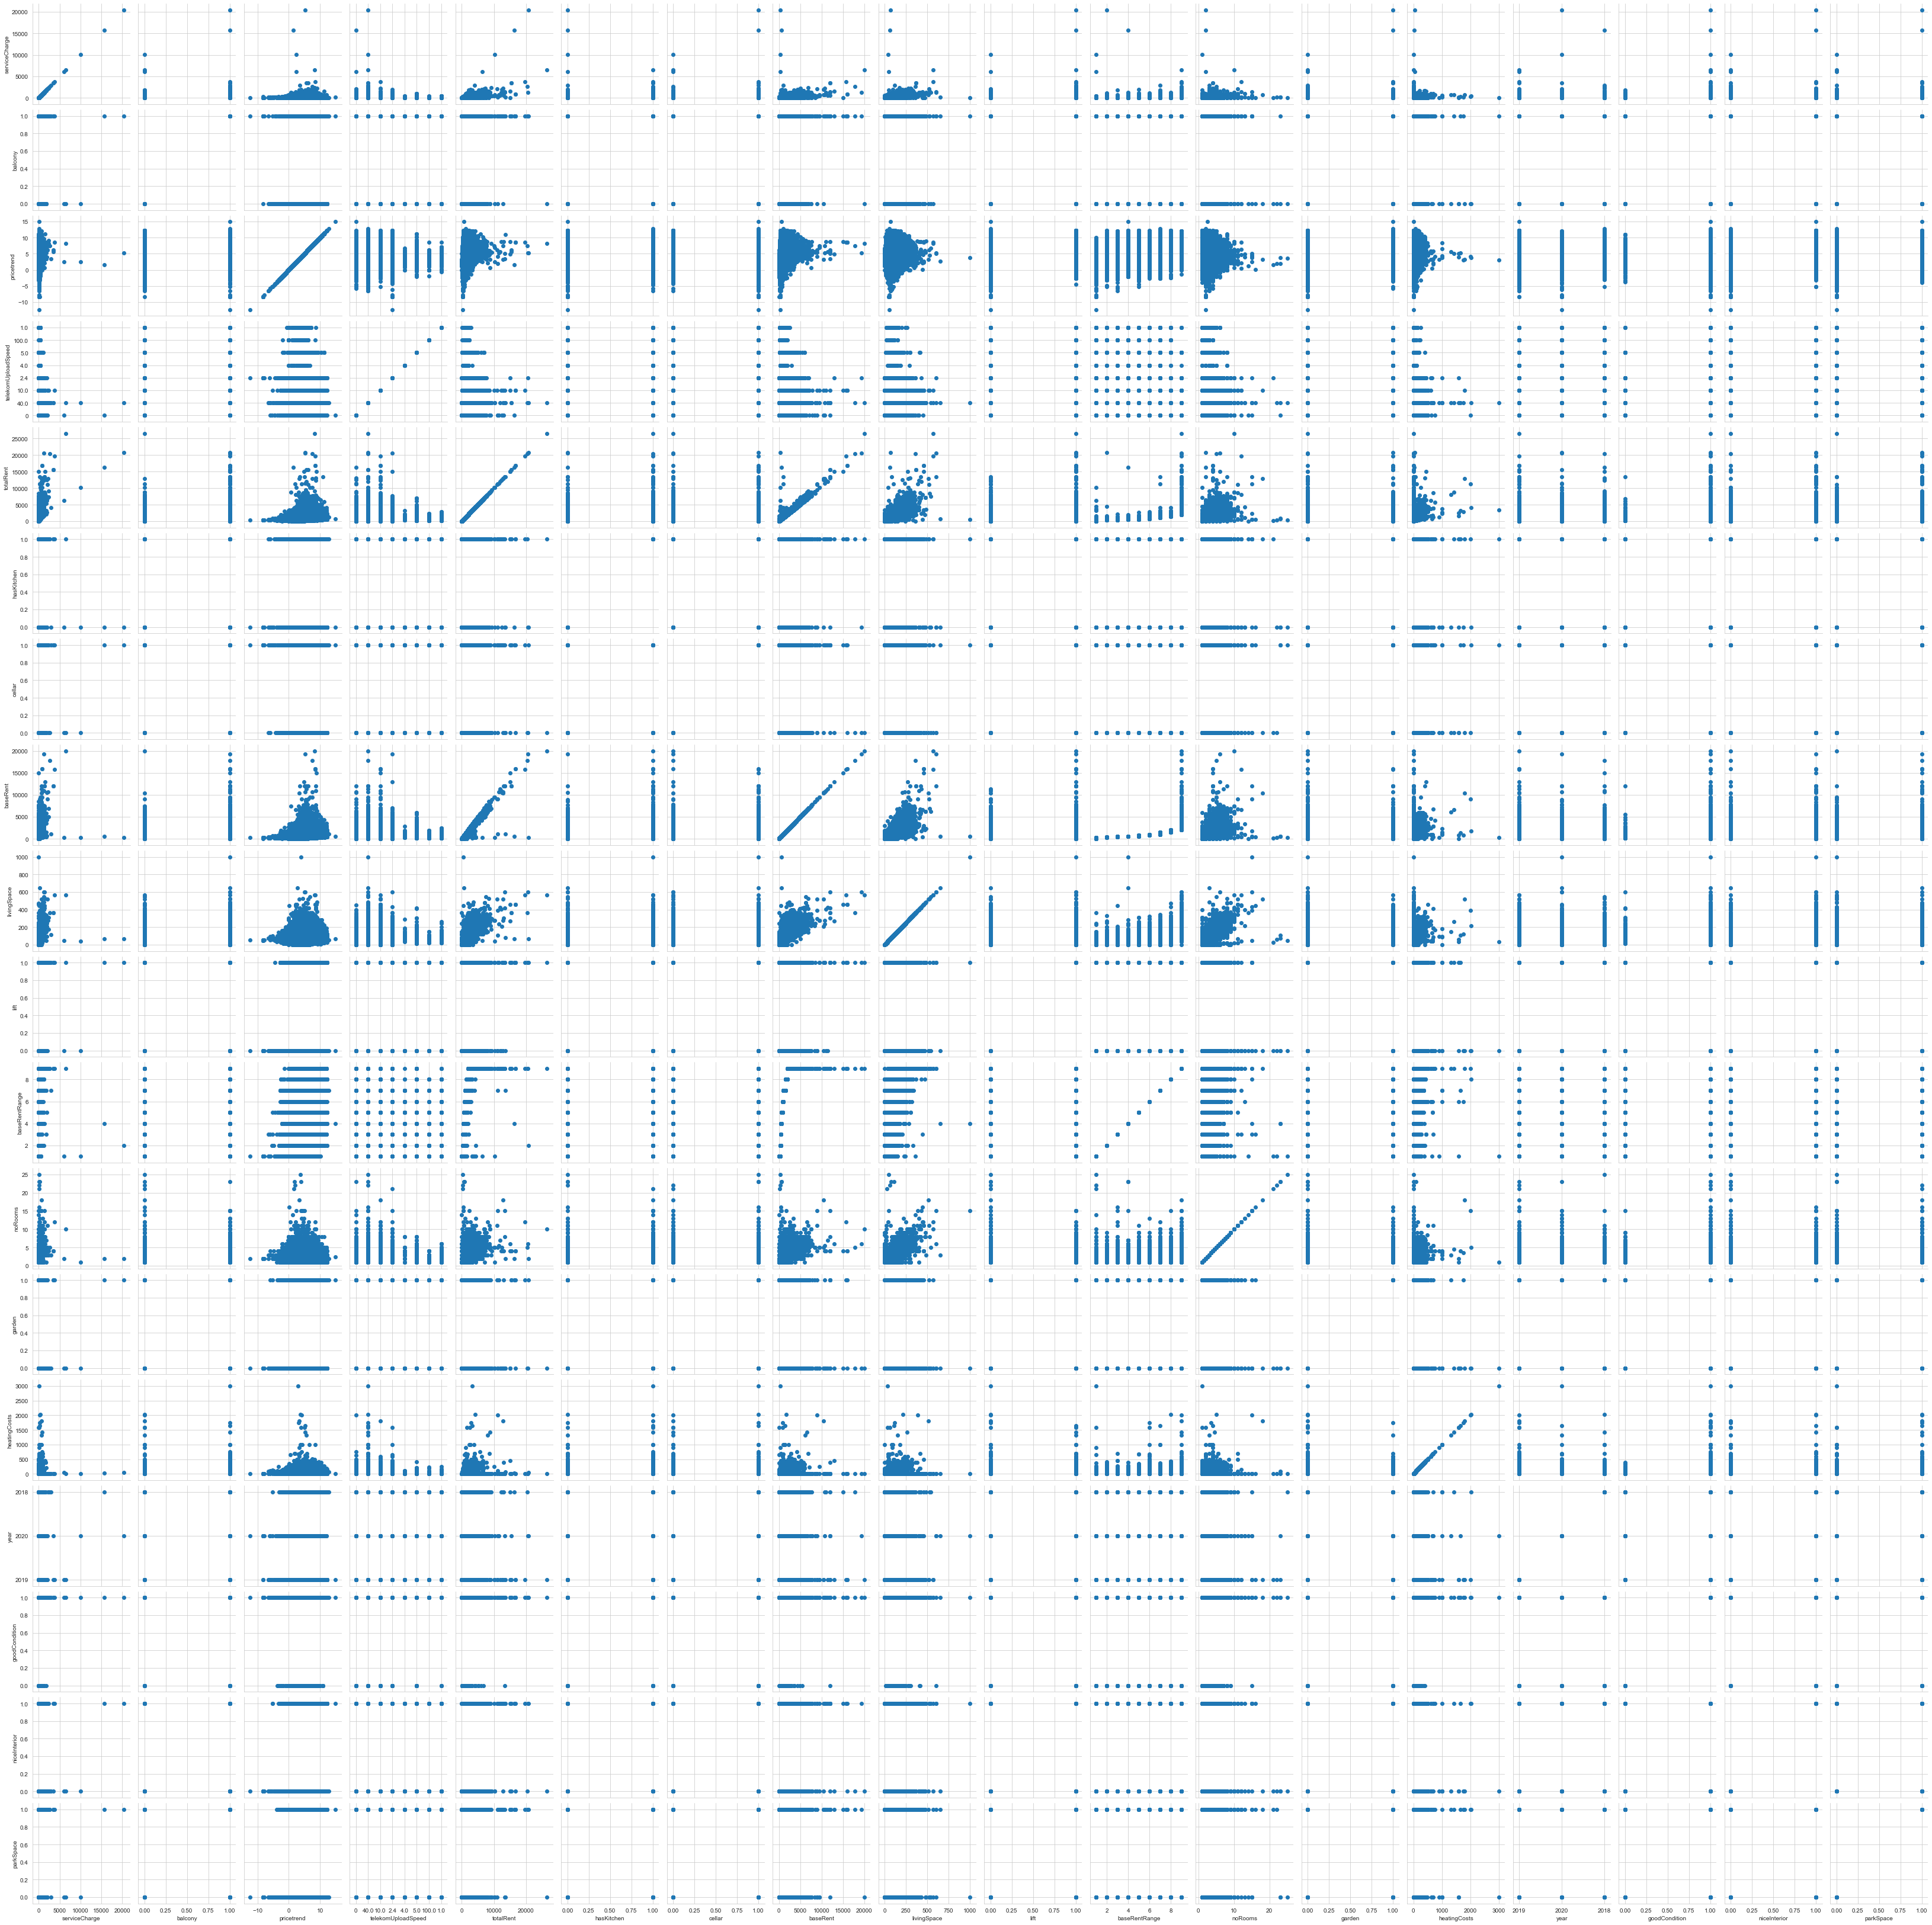

In [274]:
g = sns.PairGrid(df)
g.map(plt.scatter)

__From plots above, we'll see the categorical values affecting prices:__
- State feature is affecting prices significantly. The 5 state with highest GDP per capita in Germany are 'Hamburg', 'Bremen', 'Bayern', 'Hessen', and 'Baden_Württemberg'. The 5 state with lowest GDP per capita in Germany are 'Mecklenburg_Vorpommern', 'Sachsen_Anhalt', 'Thüringen', 'Brandenburg', and 'Sachsen'. From the distribution plot, we can see that the higher totalRent and baseRent is the property at Hamburg, Berlin, Bremen, Hessen, and Bayern. Berlin which is not part of 5 states with highest GDP per capita maybe has higher rent prices because Berlin is the capital, biggest and most populous city in Europe. States with lower rent prices was in Mecklenburg_Vorpommern, Thüringen, Sachsen_Anhalt, Sachsen, and Brandenburg. It's exactly the same states with lowest GDP per capita in Germany.
- Properties with higher rent prices has central_heating, floor_heating, combined_heat_and_power_plant, solar_heating, and wood_pellet_heating system as their heatingType. The types mentioned are considered the more comfortable type of heating for apartment in cold climate like Germany.
- The telekomTvOffers with 'NONE' value has higher rent prices. I think because the owner expect the renter to pay more for it themself as they have enough money to rent such expensive property. Properties with offers tend to have lower rent prices.
- Properties with balcony has higher rent prices than properties than don't.
- Properties with higher upload speed tends to have lower rent prices. It's a little bit weird but maybe it's targeted to students who needs internet with low rent prices.
- Properties with hydro_energy as their energy source are likely to have more expensive rents than others. Environmental_thermal_energy and solar_energy also have higher rent prices. It's maybe because mentioned energy source are environmental friendly and generally more 'modern' so that it makes sense that it refers to newer property and has higher prices.
- Properties with kitchen tends to have higher rent prices. It's because in Germany, generally aparments comes unfurnished. So when, there's existing kitchen, it really are helpful.
- There are no significant rent price difference between properties that has cellar available and without cellar. I think it's not really important to have a cellar and more like a secondary option to store the things.
- As mentioned before, newer properties have higher rent prices than older properties. Properties that are constructed within 2 decades are more desirable and would be more expensive.
- Properties with no pets allowed are more likely to have higher rent prices than properties than allows pets. But it doesn't always mean that expensive flats would never allows pets. It's just based on the owner of the property.
- Properties with lift have higher rent price due to higher serviceCharge.
- Type of flats that have higher rent prices are penthouse and loft. Penthouse are flats located on the top floor with the whole floor as one property. It usually has more expensive price for the large spaces and fancy interior with nice view, usually in high rise building. Loft is the property at the top of the building (just below the roof) and it also usually has a whole floor without any rooms.
- There's also no significant difference between properties with gardens and not. Although properties with garden has a little bit higher rent prices.
- Properties with higher energyEfficiencyClass are more likely to have higher rent price.
- The year posted also makes a little to no difference to rent prices.
- Properties in good condition and nice interior tends to price higher.
- Rent with parking space included are more likely to cost more and has higher serviceCharge.
- There's no significant difference between properties with its floor position in a building.
- More high_rise and mid_rise building has higher rent prices.

In [302]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [303]:
corr_cat = []
for i in cat_col:
    temp = []
    for j in cat_col:
        temp.append(cramers_v(x[i], x[j]))
    corr_cat.append(temp)
cat = pd.DataFrame(corr_cat, columns = cat_col, index = cat_col)

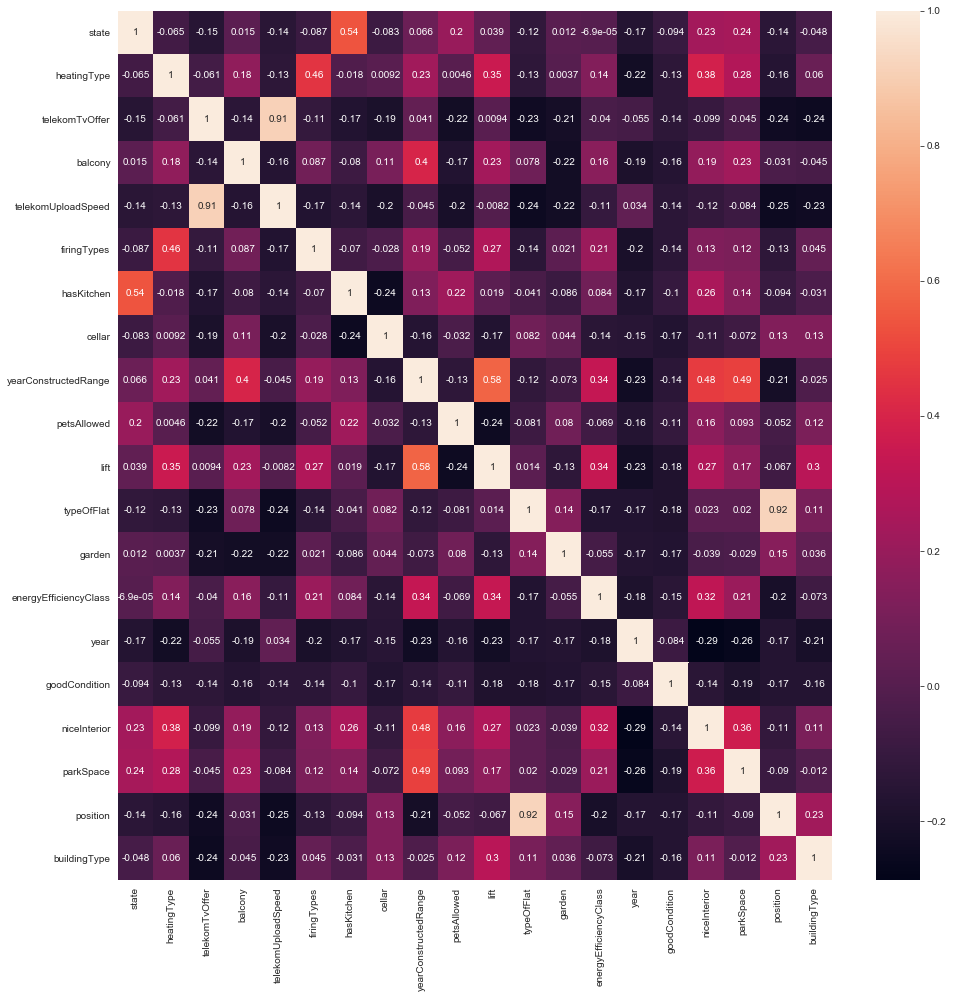

In [304]:
plt.figure(figsize = (16,16))
sns.heatmap(cat.corr(), annot = True)

__Lastly, I'll drop baseRentRange feature because it's the existing binned version of baseRent.__

In [305]:
df.drop('baseRentRange', axis = 1, inplace = True)

# Hypothesis Testing

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226476 entries, 0 to 268848
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   state                  226476 non-null  object 
 1   serviceCharge          224030 non-null  float64
 2   heatingType            226476 non-null  object 
 3   telekomTvOffer         226476 non-null  object 
 4   balcony                226476 non-null  bool   
 5   pricetrend             224890 non-null  float64
 6   telekomUploadSpeed     226476 non-null  object 
 7   totalRent              226476 non-null  float64
 8   firingTypes            226476 non-null  object 
 9   hasKitchen             226476 non-null  bool   
 10  cellar                 226476 non-null  bool   
 11  yearConstructedRange   226476 non-null  object 
 12  baseRent               226476 non-null  float64
 13  livingSpace            226476 non-null  float64
 14  petsAllowed            226476 non-nu

In [312]:
num_col = df[['livingSpace', 'noRooms']]
cat_col = df.describe(exclude = 'number').columns

In [315]:
for i in num_col:
    print(i)
    print(try_normal(df[i]))

livingSpace
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 4625.377133882954}, 'Shapiro': 0.0, 'K^2': 0.0}
noRooms
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 8058.826582594222}, 'Shapiro': 0.0, 'K^2': 0.0}


In [320]:
for i in num_col:
    print(i)
    print('---------------------------------')
    x = mannwhitneyu(df[df[i] > df.describe()[i]['50%']]['totalRent'], df[df[i] <= df.describe()[i]['50%']]['totalRent'])
    print(x)
    print('\n')

livingSpace
---------------------------------
MannwhitneyuResult(statistic=1595905315.0, pvalue=0.0)


noRooms
---------------------------------
MannwhitneyuResult(statistic=1472343578.5, pvalue=0.0)




In [323]:
for i in cat_col:
    temp = []
    for val in df[i].unique():
        temp.append(df[df[i] == val]['totalRent'])
    print(i)
    print('-----------------------')
    print(kruskal(*temp))
    print('\n')

state
-----------------------
KruskalResult(statistic=71394.05403275765, pvalue=0.0)


heatingType
-----------------------
KruskalResult(statistic=21232.46034777279, pvalue=0.0)


telekomTvOffer
-----------------------
KruskalResult(statistic=2772.3229362466777, pvalue=0.0)


balcony
-----------------------
KruskalResult(statistic=24176.827382091073, pvalue=0.0)


telekomUploadSpeed
-----------------------
KruskalResult(statistic=6467.127999012427, pvalue=0.0)


firingTypes
-----------------------
KruskalResult(statistic=5953.276459161609, pvalue=0.0)


hasKitchen
-----------------------
KruskalResult(statistic=17028.77133700138, pvalue=0.0)


cellar
-----------------------
KruskalResult(statistic=219.30074043929463, pvalue=1.285023325656215e-49)


yearConstructedRange
-----------------------
KruskalResult(statistic=37862.128186957634, pvalue=0.0)


petsAllowed
-----------------------
KruskalResult(statistic=6122.815920272691, pvalue=0.0)


lift
-----------------------
KruskalResult(st

__There are difference in the totalRent between the difference of position in numerical columns, and between values in categorical columns. We could say that the feature affect the totalRent significantly.__

In [324]:
df.to_csv('cleaned_final.csv', index = False, header = True)

In [7]:
data.head()

regio1  serviceCharge                     heatingType  \
0      Sachsen_Anhalt          210.0                 central_heating   
1              Bayern          160.0                 central_heating   
2              Bayern           80.0                 central_heating   
3      Sachsen_Anhalt           75.0                 central_heating   
4  Schleswig_Holstein          190.0  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0            NaN                       NaN       False     True            20   
1  ONE_YEAR_FREE                       NaN       False     True            26   
2            NaN                       NaN       False     True            10   
3            NaN                       NaN       False     True            14   
4  ONE_YEAR_FREE                       NaN        True     True            16   

   pricetrend  telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0        0.83                 NaN      744.0           1970.0  111888745   
1        5.13                 5.0        NaN           2005.0   90392140   
2         NaN                 NaN      530.0           1967.0   66246933   
3        2.54                 NaN      568.0           1900.0  110222551   
4        3.79                40.0     1185.0           2020.0  114808175   

   noParkSpaces        firingTypes  hasKitchen             geo_bln  cellar  \
0           NaN                oil       False      Sachsen_Anhalt    True   
1           1.0                gas       False              Bayern    True   
2           NaN                oil        True              Bayern    True   
3           NaN  natural_gas_heavy       False      Sachsen_Anhalt   False   
4           1.0         geothermal        True  Schleswig_Holstein    True   

   yearConstructedRange  baseRent houseNumber  livingSpace  \
0                   2.0     534.0        8-10         97.0   
1                   6.0     890.0         NaN        100.0   
2                   2.0     450.0          14         43.0   
3                   1.0     396.0         180         72.0   
4                   9.0     995.0          62         91.0   

                         geo_krs                           condition  \
0        Anhalt_Bitterfeld_Kreis                           well_kept   
1  Pfaffenhofen_an_der_Ilm_Kreis                      mint_condition   
2                       Erlangen  first_time_use_after_refurbishment   
3                      Magdeburg                     fully_renovated   
4                 Segeberg_Kreis                      first_time_use   

    interiorQual petsAllowed                           street  \
0            NaN  negotiable    Stra&szlig;e der Freundschaft   
1  sophisticated  negotiable                   no_information   
2         normal  negotiable                    Karl-May-Str.   
3            NaN  negotiable  Halberst&auml;dter Stra&szlig;e   
4  sophisticated          no                   Hamburger Str.   

               streetPlain   lift  baseRentRange  typeOfFlat  geo_plz  \
0  Straße_der_Freundschaft   True              4   apartment     6792   
1                      NaN  False              6  maisonette    85126   
2            Karl-May-Str.   True              3   apartment    91056   
3     Halberstädter_Straße  False              2   apartment    39112   
4           Hamburger_Str.   True              6   penthouse    24576   

   noRooms  thermalChar  floor  numberOfFloors  noRoomsRange  garden  \
0      3.0        120.0    3.0             5.0             3   False   
1      4.0         88.0    1.0             2.0             4    True   
2      1.0         74.3    7.0             7.0             1   False   
3      2.0        203.0    2.0             4.0             2   False   
4      3.0         29.5    2.0             2.0             3   False   

   livingSpaceRange                         regio2         regio3  \
0                 4        Anha

In [ ]:
SELECT regio1, AVG(serviceCharge) FROM data GROUP BY regio1